In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from scipy.optimize import brentq
import matplotlib.ticker as ticker
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  C    0.0000000    1.3990430    0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(benzene_molecule))
print(coordinates)
coordinates = np.vstack((coordinates[-1], coordinates[[0, 1, 2, 3, 4]]))
print(coordinates)

[[ 1.2116068  0.6995215]
 [ 1.2116068 -0.6995215]
 [-0.        -1.399043 ]
 [-1.2116068 -0.6995215]
 [-1.2116068  0.6995215]
 [ 0.         1.399043 ]]
[[ 0.         1.399043 ]
 [ 1.2116068  0.6995215]
 [ 1.2116068 -0.6995215]
 [-0.        -1.399043 ]
 [-1.2116068 -0.6995215]
 [-1.2116068  0.6995215]]


In [2]:
benzene = huckel(6, 0, -3)
benzene.create_matrix()

H = benzene.huckel_matrix
print(H)

beta_operator_1_2_and_3_4 = np.zeros((6, 6))
beta_operator_1_2_and_3_4[0,1] = 1
beta_operator_1_2_and_3_4[1,0] = 1
beta_operator_1_2_and_3_4[2,3] = 1
beta_operator_1_2_and_3_4[3,2] = 1

one_electron_operator_1 = np.zeros((6, 6))
one_electron_operator_1[0,0] = 1
print(one_electron_operator_1)
print(beta_operator_1_2_and_3_4)

[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [3]:
def bereken_elektronenpopulatie(mu_alfa, mu_beta):
    # Hier voer je de berekeningen uit om de elektronenpopulatie op de gewenste site te bepalen
    # Veronderstel dat benzene, H, one_electron_operator, pts, enz. eerder zijn gedefinieerd
    benzene.huckel_matrix = H + mu_alfa * one_electron_operator_1 + mu_beta*beta_operator_1_2_and_3_4
    benzene.solve_huckel_matrix()
    eigenvectors = benzene.eigenvectors
    D_huckel = pts.making_D(eigenvectors, 6)
    return np.diag(D_huckel)[0]  # Hier krijgen we bijvoorbeeld de elektronenpopulatie op de zesde site

def doel_populatie(mu_alfa, mu_beta, gewenste_populatie):
    # Deze functie geeft het verschil tussen de berekende populatie en de gewenste populatie terug
    berekende_populatie = bereken_elektronenpopulatie(mu_alfa, mu_beta)
    verschil = berekende_populatie**2 - gewenste_populatie**2
    return verschil

def vind_optimale_mu(mu_beta, gewenste_populatie, mu_lower, mu_upper):
    # Bepaal de optimale waarde van mu binnen de opgegeven grenzen
    
    # Pas Brent's methode toe om de optimale waarde van mu te vinden
    optimale_mu = brentq(lambda mu_alfa: doel_populatie(mu_alfa, mu_beta, gewenste_populatie), mu_lower, mu_upper)
    
    return optimale_mu

# Voorbeeldgebruik:
gewenste_populatie = 1.25
mu_lower = -100.0  # Ondergrens voor mu
mu_upper = 100.0  # Bovengrens voor mu

optimale_mu = vind_optimale_mu(0,gewenste_populatie, mu_lower, mu_upper)
print("Optimale waarde van mu:", optimale_mu)

Optimale waarde van mu: -1.946131233986098


In [4]:
electronpopulation_1 = np.linspace(0.005, 1.995, 199)
print(electronpopulation_1)
mu_betas = np.linspace(0, 3, 3).round(2)
print(mu_betas)

[0.005      0.01505051 0.02510101 0.03515152 0.04520202 0.05525253
 0.06530303 0.07535354 0.08540404 0.09545455 0.10550505 0.11555556
 0.12560606 0.13565657 0.14570707 0.15575758 0.16580808 0.17585859
 0.18590909 0.1959596  0.2060101  0.21606061 0.22611111 0.23616162
 0.24621212 0.25626263 0.26631313 0.27636364 0.28641414 0.29646465
 0.30651515 0.31656566 0.32661616 0.33666667 0.34671717 0.35676768
 0.36681818 0.37686869 0.38691919 0.3969697  0.4070202  0.41707071
 0.42712121 0.43717172 0.44722222 0.45727273 0.46732323 0.47737374
 0.48742424 0.49747475 0.50752525 0.51757576 0.52762626 0.53767677
 0.54772727 0.55777778 0.56782828 0.57787879 0.58792929 0.5979798
 0.6080303  0.61808081 0.62813131 0.63818182 0.64823232 0.65828283
 0.66833333 0.67838384 0.68843434 0.69848485 0.70853535 0.71858586
 0.72863636 0.73868687 0.74873737 0.75878788 0.76883838 0.77888889
 0.78893939 0.7989899  0.8090404  0.81909091 0.82914141 0.83919192
 0.84924242 0.85929293 0.86934343 0.87939394 0.88944444 0.89949

In [5]:
electron_population_betas = []
S_1_atom_betas = []
S_2_atoms_betas = []
energies_betas = []
potentials_betas = []
for mu_beta in mu_betas:
    electron_population = [[],[],[],[],[],[]]
    S_1_atom = []
    S_2_atoms = []
    energies = []
    potentials = [vind_optimale_mu(mu_beta,gewenste_populatie, mu_lower, mu_upper) for gewenste_populatie in electronpopulation_1]
    potentials_betas.append(potentials)
    for potential in potentials:
        benzene.huckel_matrix = H + potential* one_electron_operator_1 + mu_beta*beta_operator_1_2_and_3_4
        benzene.solve_huckel_matrix()
        eigenvalues = benzene.eigenvalues
        eigenvectors = benzene.eigenvectors
        D_huckel = pts.making_D(eigenvectors, 6)
        for index, density in enumerate(np.diag(D_huckel)):
            electron_population[index].append(density)

        elec_to_place = 6
        i = 0
        energy = 0
        while elec_to_place >0:
            if elec_to_place > 1:
                elec_in_orbital = 2
            elif elec_to_place == 1:
                elec_in_orbital = 1
            else:
                elec_in_orbital = 0

            energy += elec_in_orbital*(eigenvalues[i]-potential*(eigenvectors.T[i] @ one_electron_operator_1 @ eigenvectors.T[i].T) - mu_beta*(eigenvectors.T[i] @ beta_operator_1_2_and_3_4 @ eigenvectors.T[i].T))
            elec_to_place -= elec_in_orbital
            i+=1
            
        energies.append(energy)

        occ_orbitals = eigenvectors.T[:3].round(6)
        S_ohm_1_atom= []
        S_ohm_2_atoms = []
        for i in range(6):
            atom_i = np.zeros((6,6))
            atom_i[i][i] = 1
            eigvals_i = np.linalg.eigvalsh(occ_orbitals @ atom_i @ occ_orbitals.T).round(6)
            S_ohm_i = 0
            for eigenvalue in eigvals_i:
                if (eigenvalue != 0): 
                    S_ohm_i -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
            S_ohm_1_atom.append(2*S_ohm_i)
            for j in range(i+1,6):
                atom_j = np.zeros((6,6))
                atom_j[j][j] = 1    
                atom_i_j = atom_i + atom_j
                eigvals_i_j = np.linalg.eigvalsh(occ_orbitals @ atom_i_j @ occ_orbitals.T).round(6)
                S_ohm_i_j = 0
                for eigenvalue in eigvals_i_j:
                    if (eigenvalue.round(2) != 0 and eigenvalue.round(2) != 1): 
                        S_ohm_i_j -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
                S_ohm_2_atoms.append(2*S_ohm_i_j)
        S_1_atom.append(S_ohm_1_atom)
        S_2_atoms.append(S_ohm_2_atoms)
    electron_population_betas.append(electron_population)
    S_1_atom_betas.append(S_1_atom)
    S_2_atoms_betas.append(S_2_atoms)
    energies_betas.append(energies)


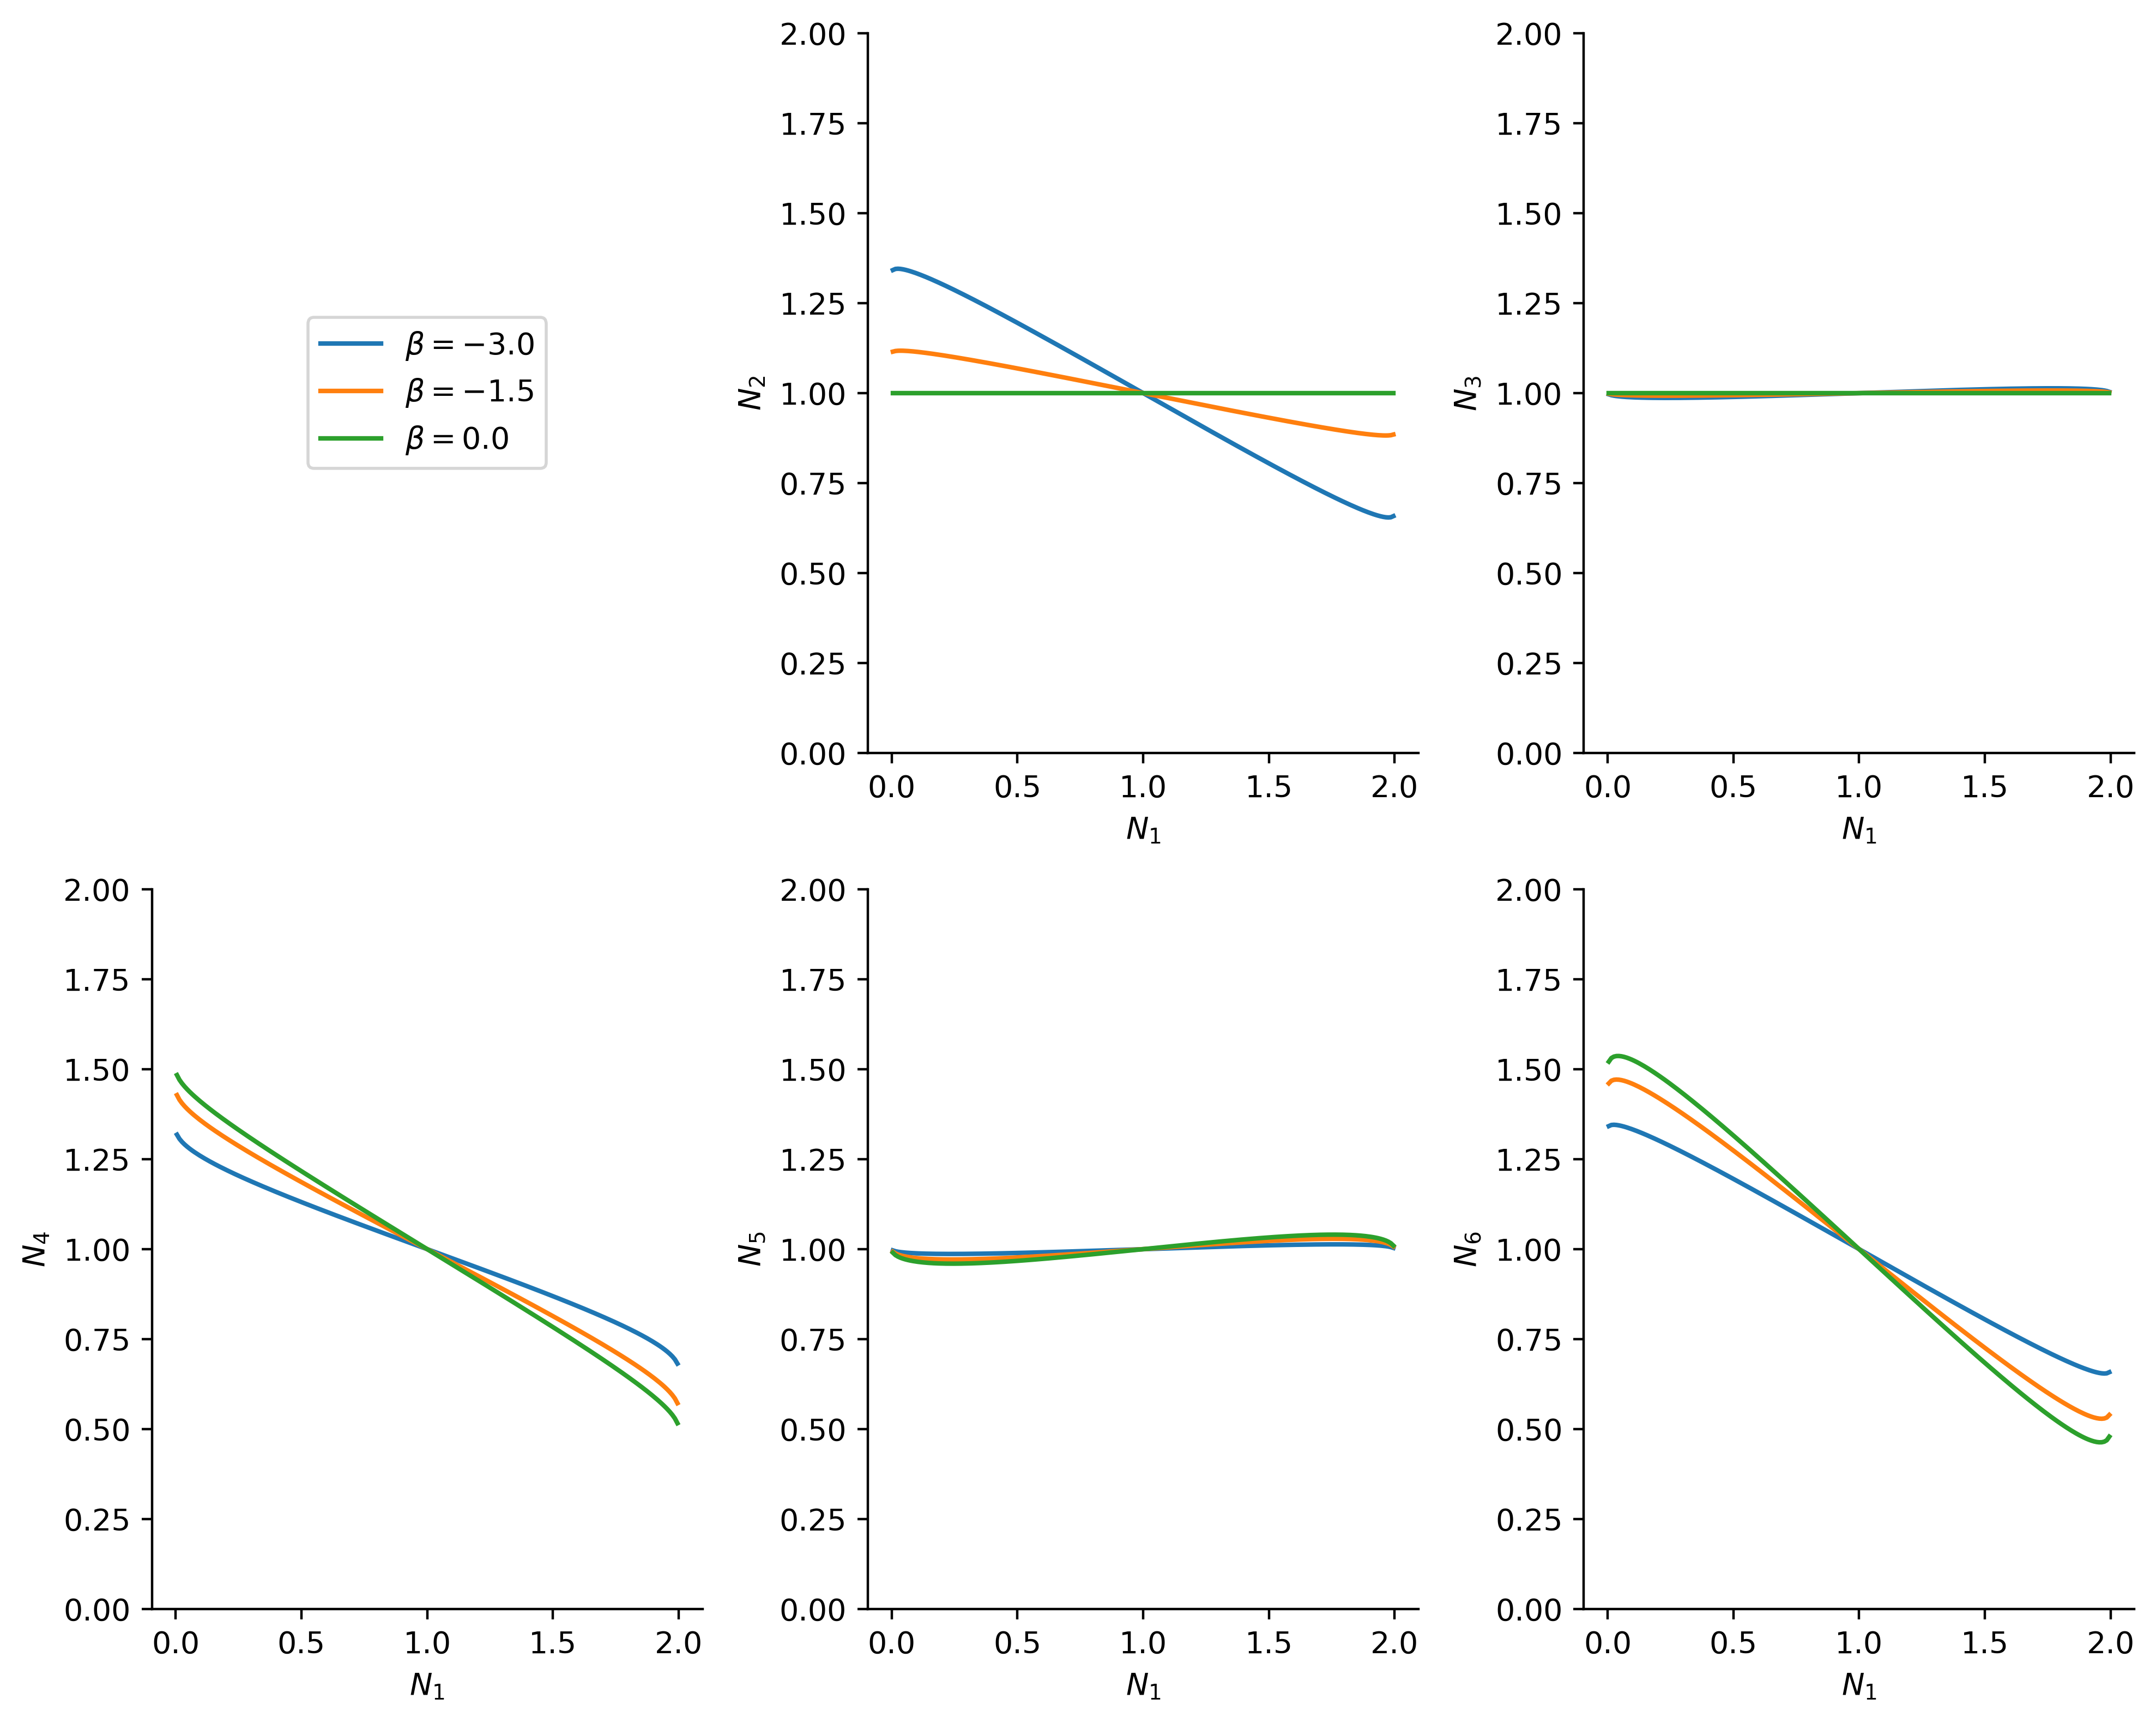

In [6]:
fig = plt.figure(figsize=(10, 8), dpi=400)
plt.axis('off')
for i in range(1,6):
    atom = i+1
    # Maak een nieuwe subplot
    ax = fig.add_subplot(2, 3, atom)

    # Verplaats de spines (assenlijnen) naar de oorsprong
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Plot de gegevens
    for index, beta in enumerate(mu_betas):
        beta -=3
        ax.plot(electronpopulation_1, electron_population_betas[index][atom-1], label=r'$\beta = {%s} $' % beta)

    # Benoem de assen en titel 
    ax.set_xlabel('$N_1$')
    ax.set_ylabel(r'$N_{%s}$' % atom)
    ax.set_ylim(0, 2)

handles, labels = ax.get_legend_handles_labels()
# Voeg een extra subplot toe voor de legende
ax = fig.add_subplot(2, 3, 1)
ax.axis('off')
# Voeg de legende toe aan de subplots
ax.legend(handles, labels, loc='center')
# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout()

# Toon de plot
plt.show()

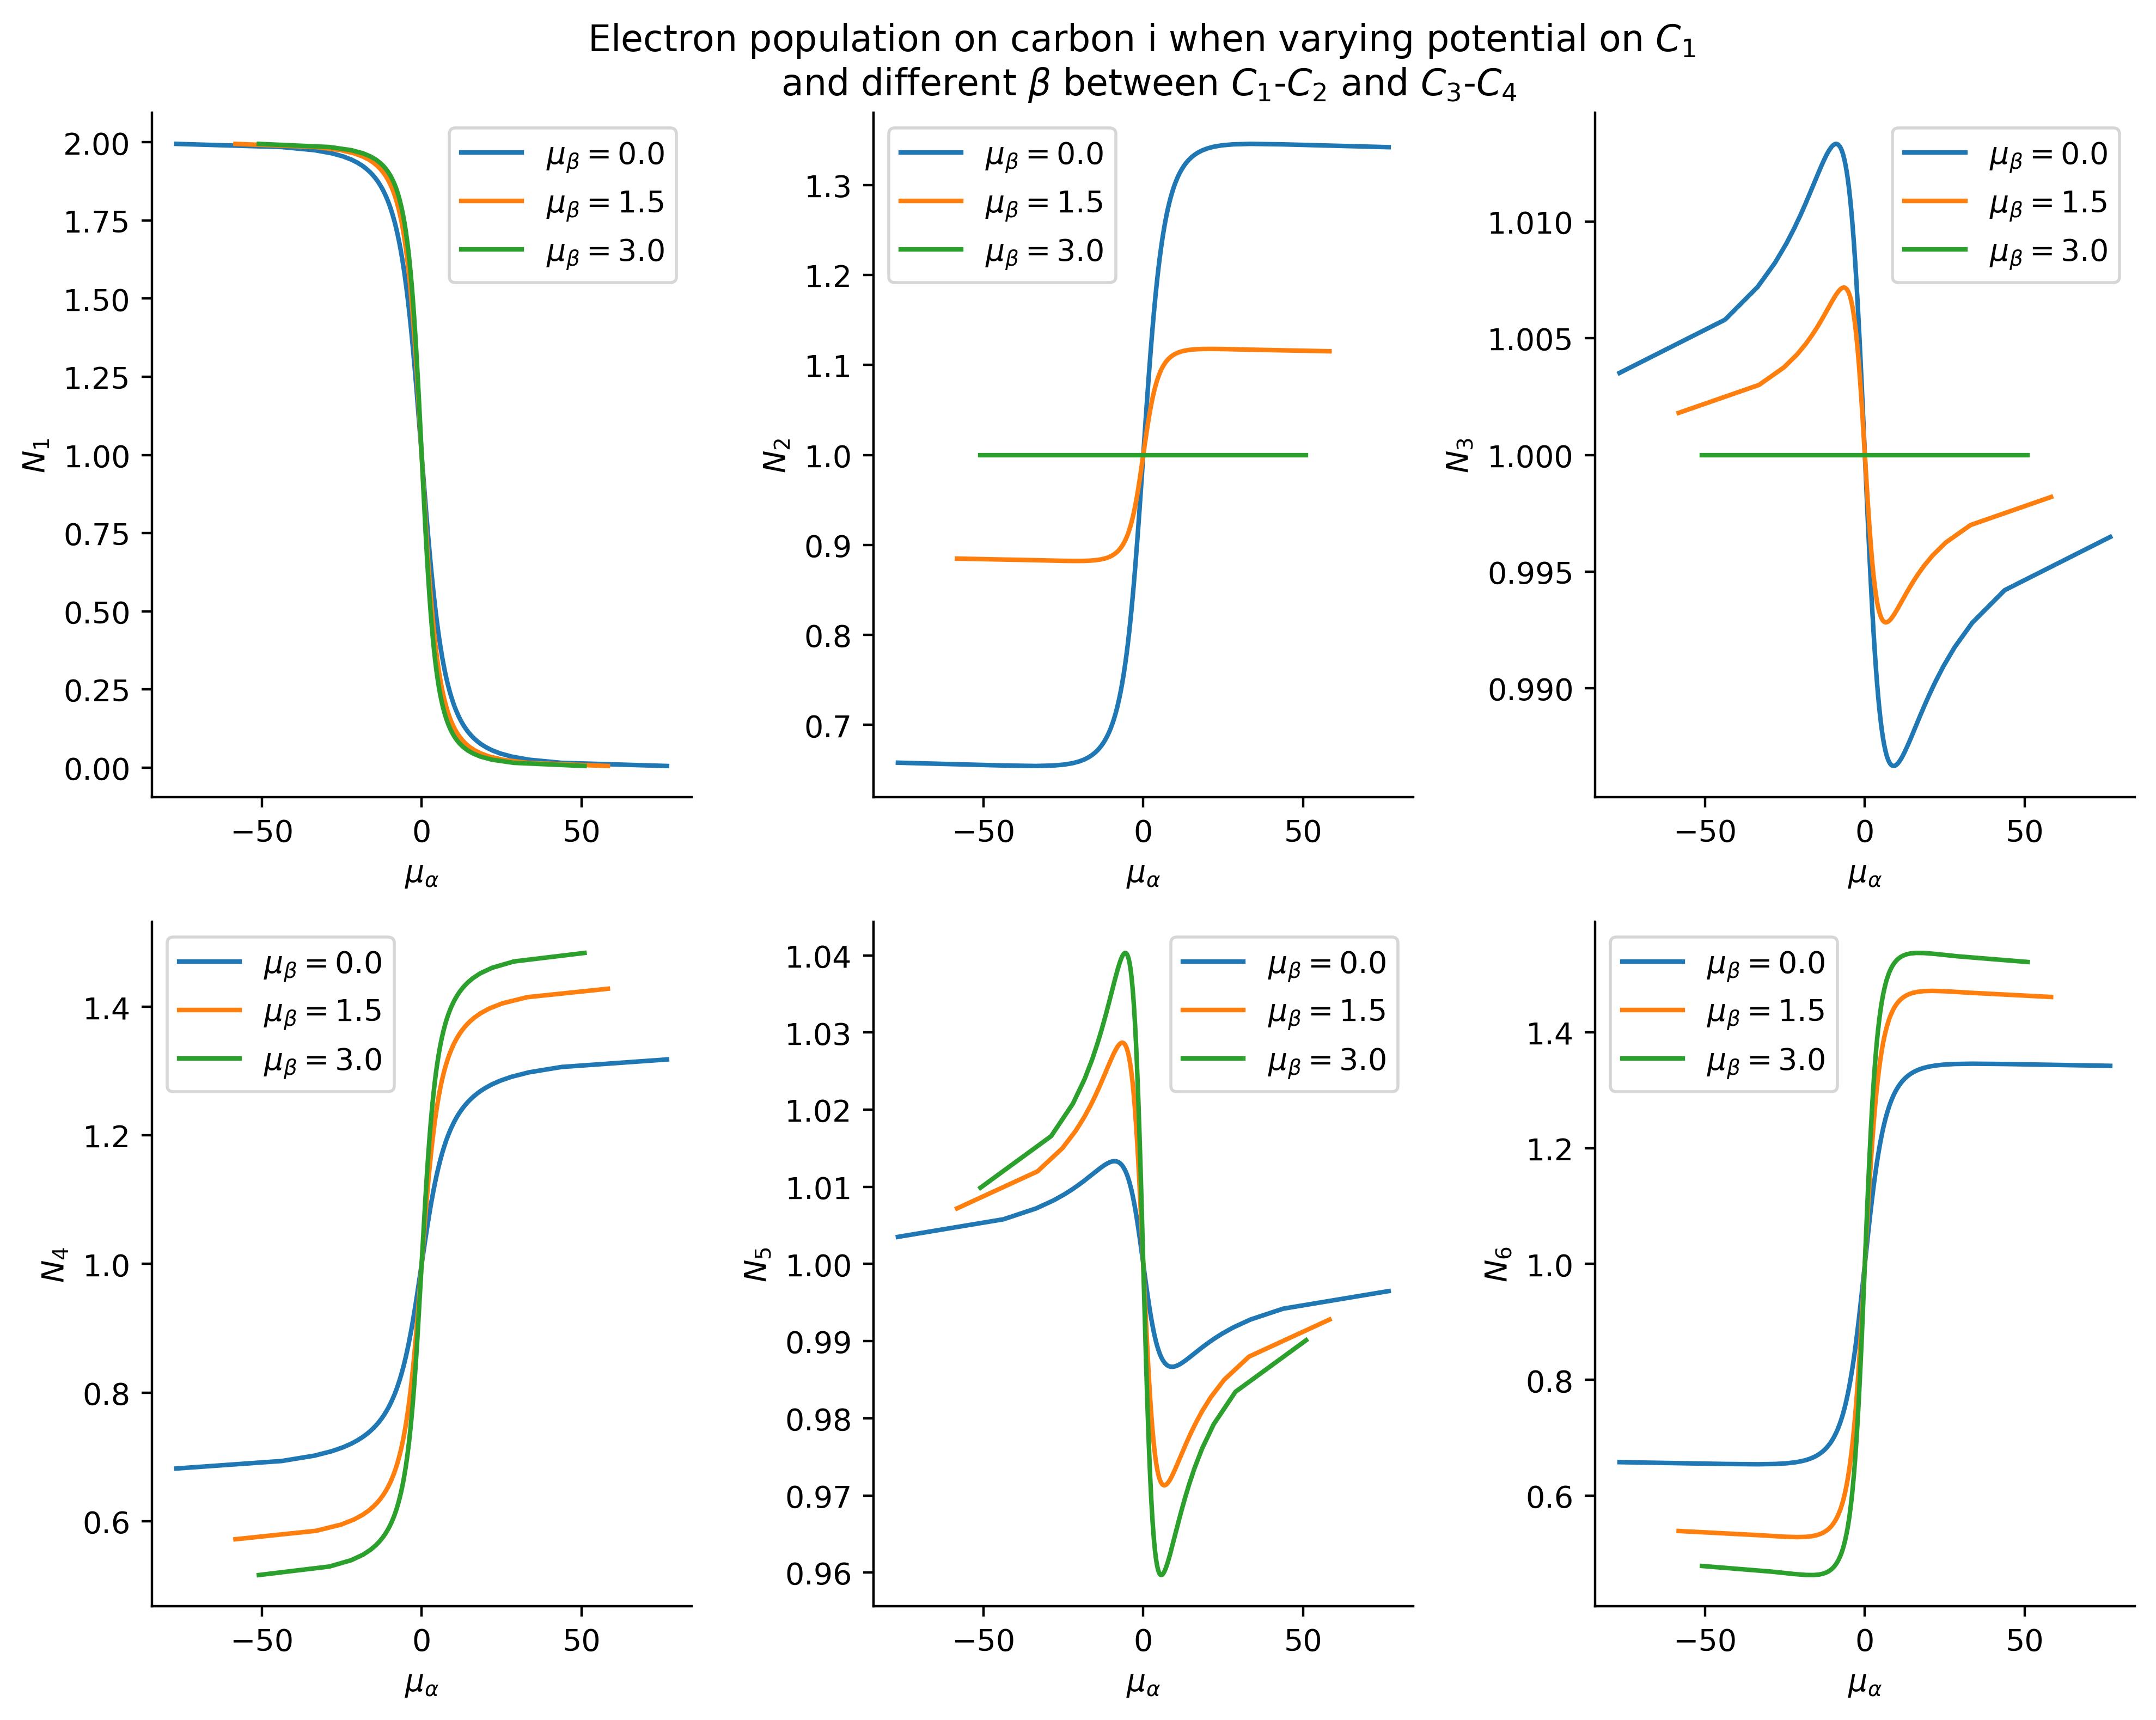

In [7]:
fig = plt.figure(figsize=(10, 8), dpi=400)
plt.title('Electron population on carbon i when varying potential on $C_1$ \n and different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
plt.axis('off')
for i in range(6):
    atom = i+1
    # Maak een nieuwe subplot
    ax = fig.add_subplot(2, 3, atom)

    # Verplaats de spines (assenlijnen) naar de oorsprong
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Plot de gegevens
    for index, beta in enumerate(mu_betas):
        ax.plot(potentials_betas[index], electron_population_betas[index][atom-1], label=r'$\mu_\beta = {%s} $' % beta)

    # Benoem de assen en titel 
    ax.set_xlabel(r'$\mu_\alpha$')
    ax.set_ylabel(r'$N_{%s}$' % atom)

    # Legenda
    ax.legend()

# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout()

# Toon de plot
plt.show()

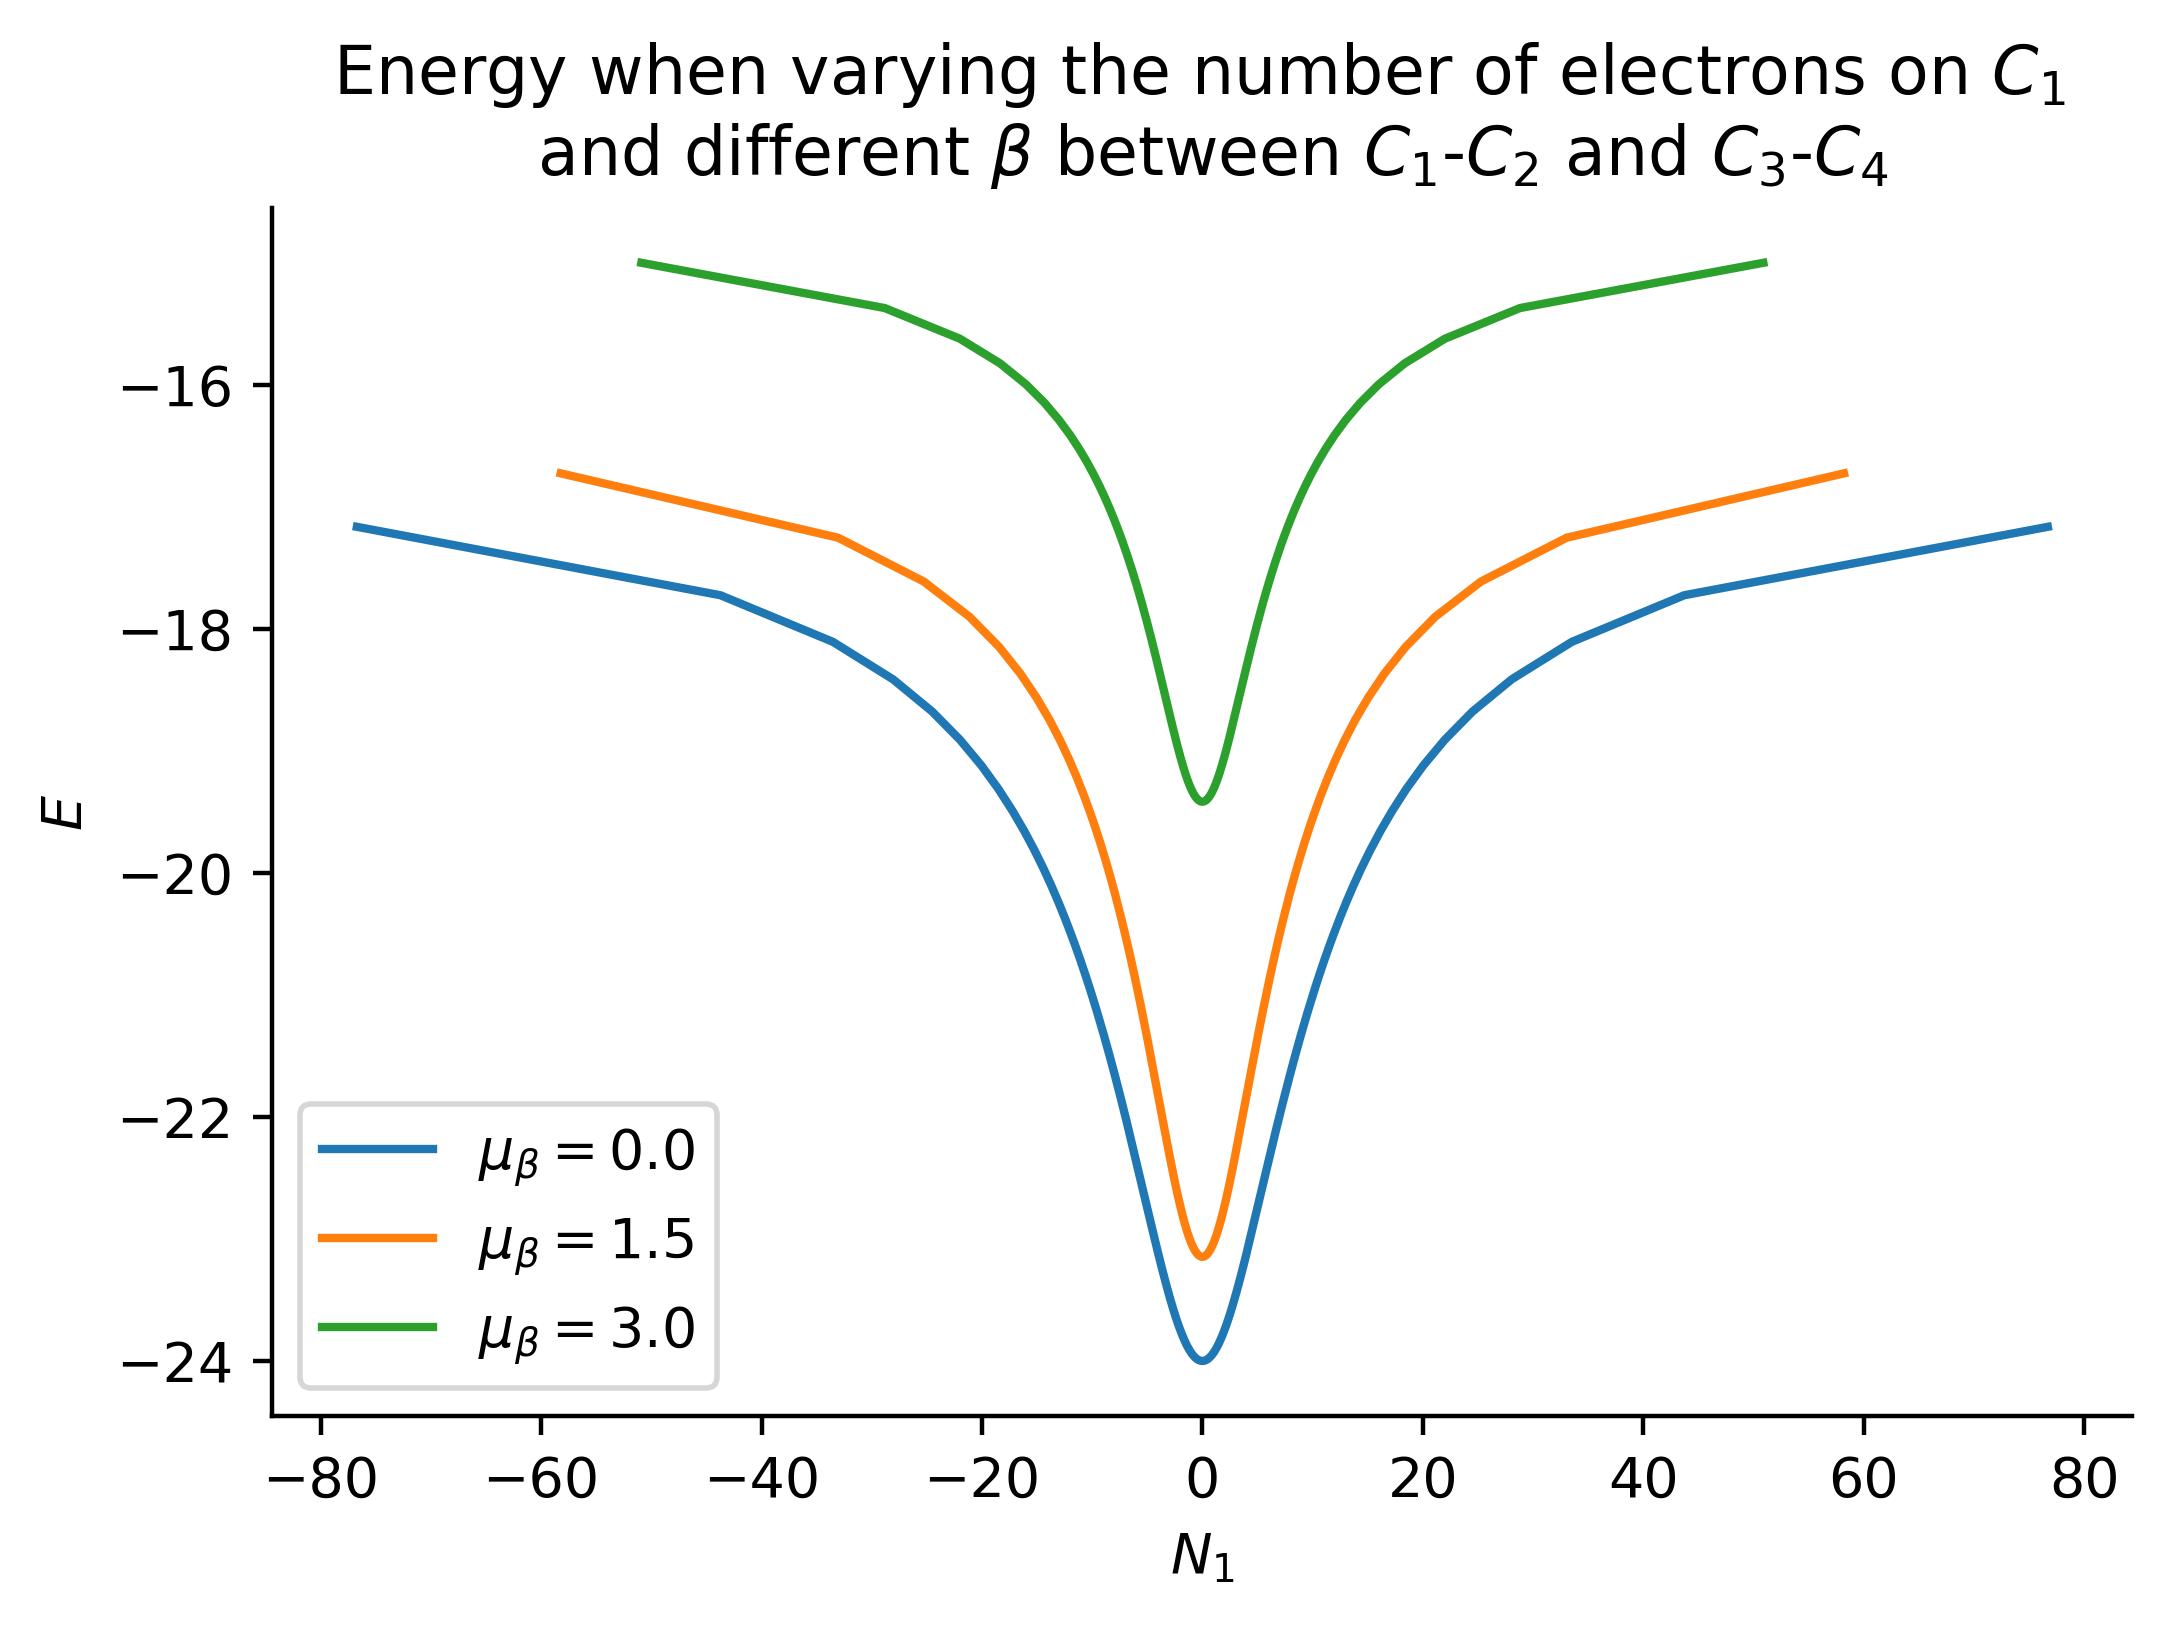

In [8]:

fig, ax = plt.subplots(dpi=400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Plot de gegevens
for index, beta in enumerate(mu_betas):
    ax.plot(potentials_betas[index], energies_betas[index], label=r'$\mu_\beta = {%s} $' % beta)

# Benoem de assen en titel 
plt.title('Energy when varying the number of electrons on $C_1$ \n and different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
ax.set_xlabel('$N_1$')
ax.set_ylabel(r'$E$')

# Legenda
ax.legend()

# Toon de plot
plt.show()


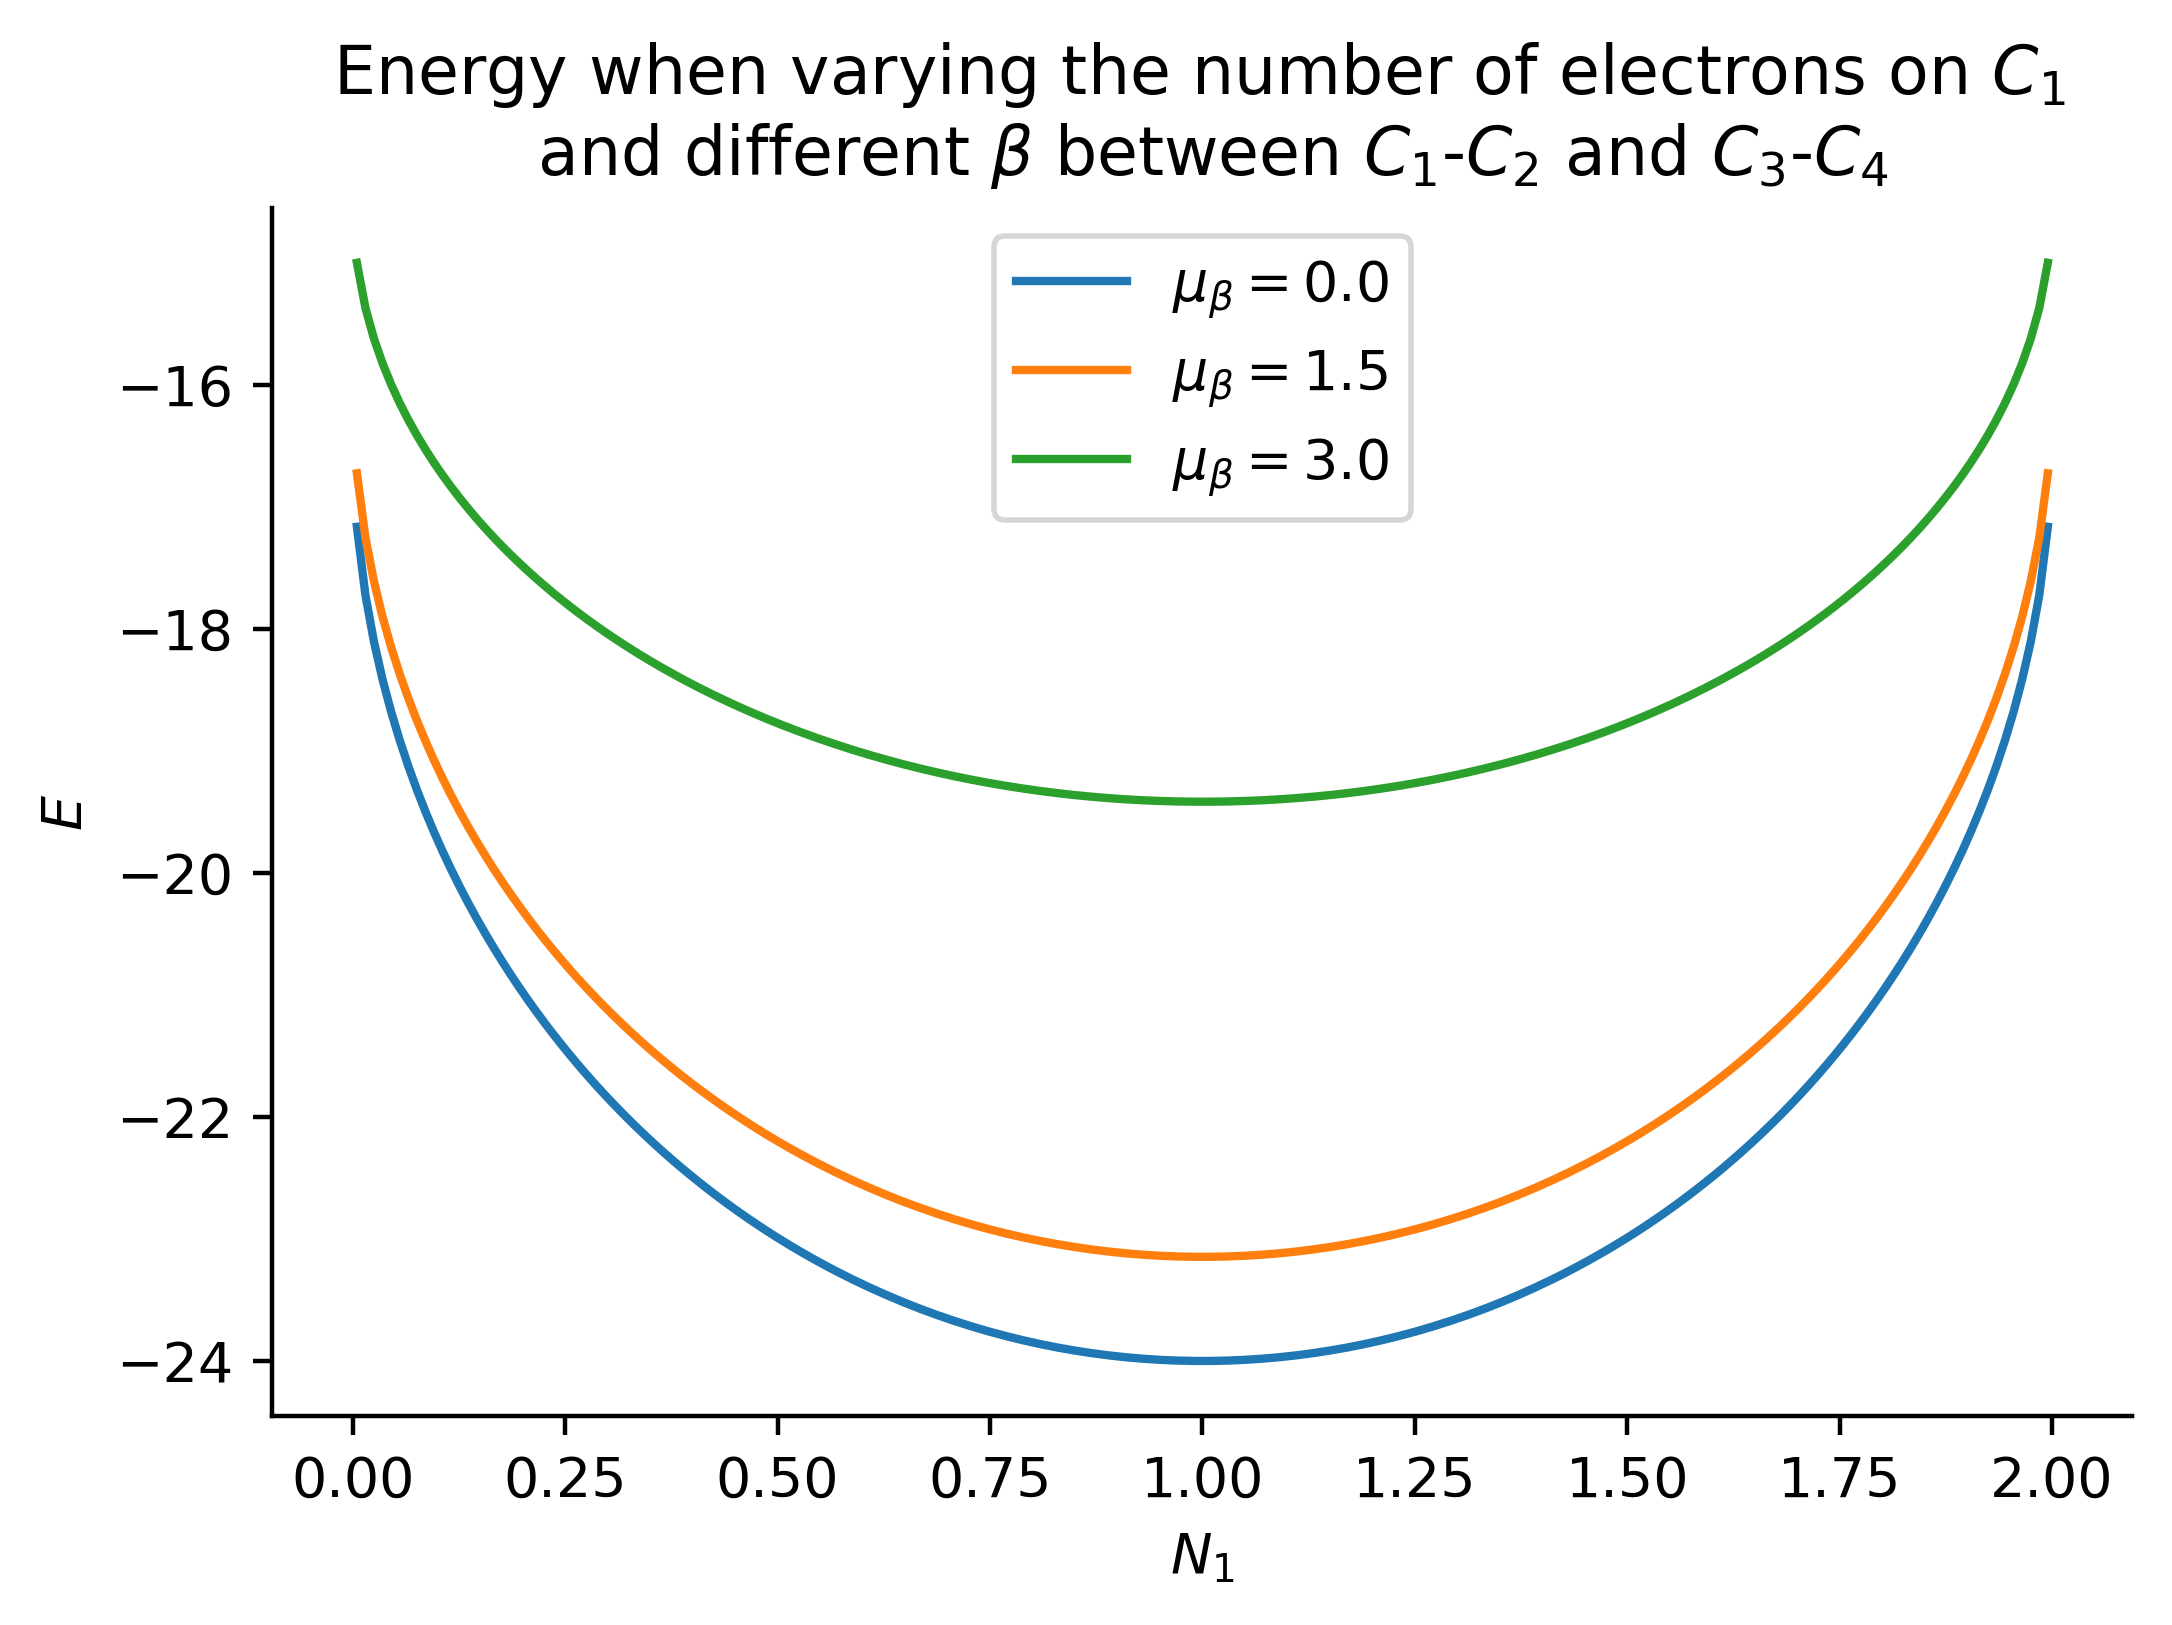

In [9]:

fig, ax = plt.subplots(dpi=400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Plot de gegevens
for index, beta in enumerate(mu_betas):
    ax.plot(electronpopulation_1, energies_betas[index], label=r'$\mu_\beta = {%s} $' % beta)

# Benoem de assen en titel 
plt.title('Energy when varying the number of electrons on $C_1$ \n and different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
ax.set_xlabel('$N_1$')
ax.set_ylabel(r'$E$')

# Legenda
ax.legend()


# Toon de plot
plt.show()


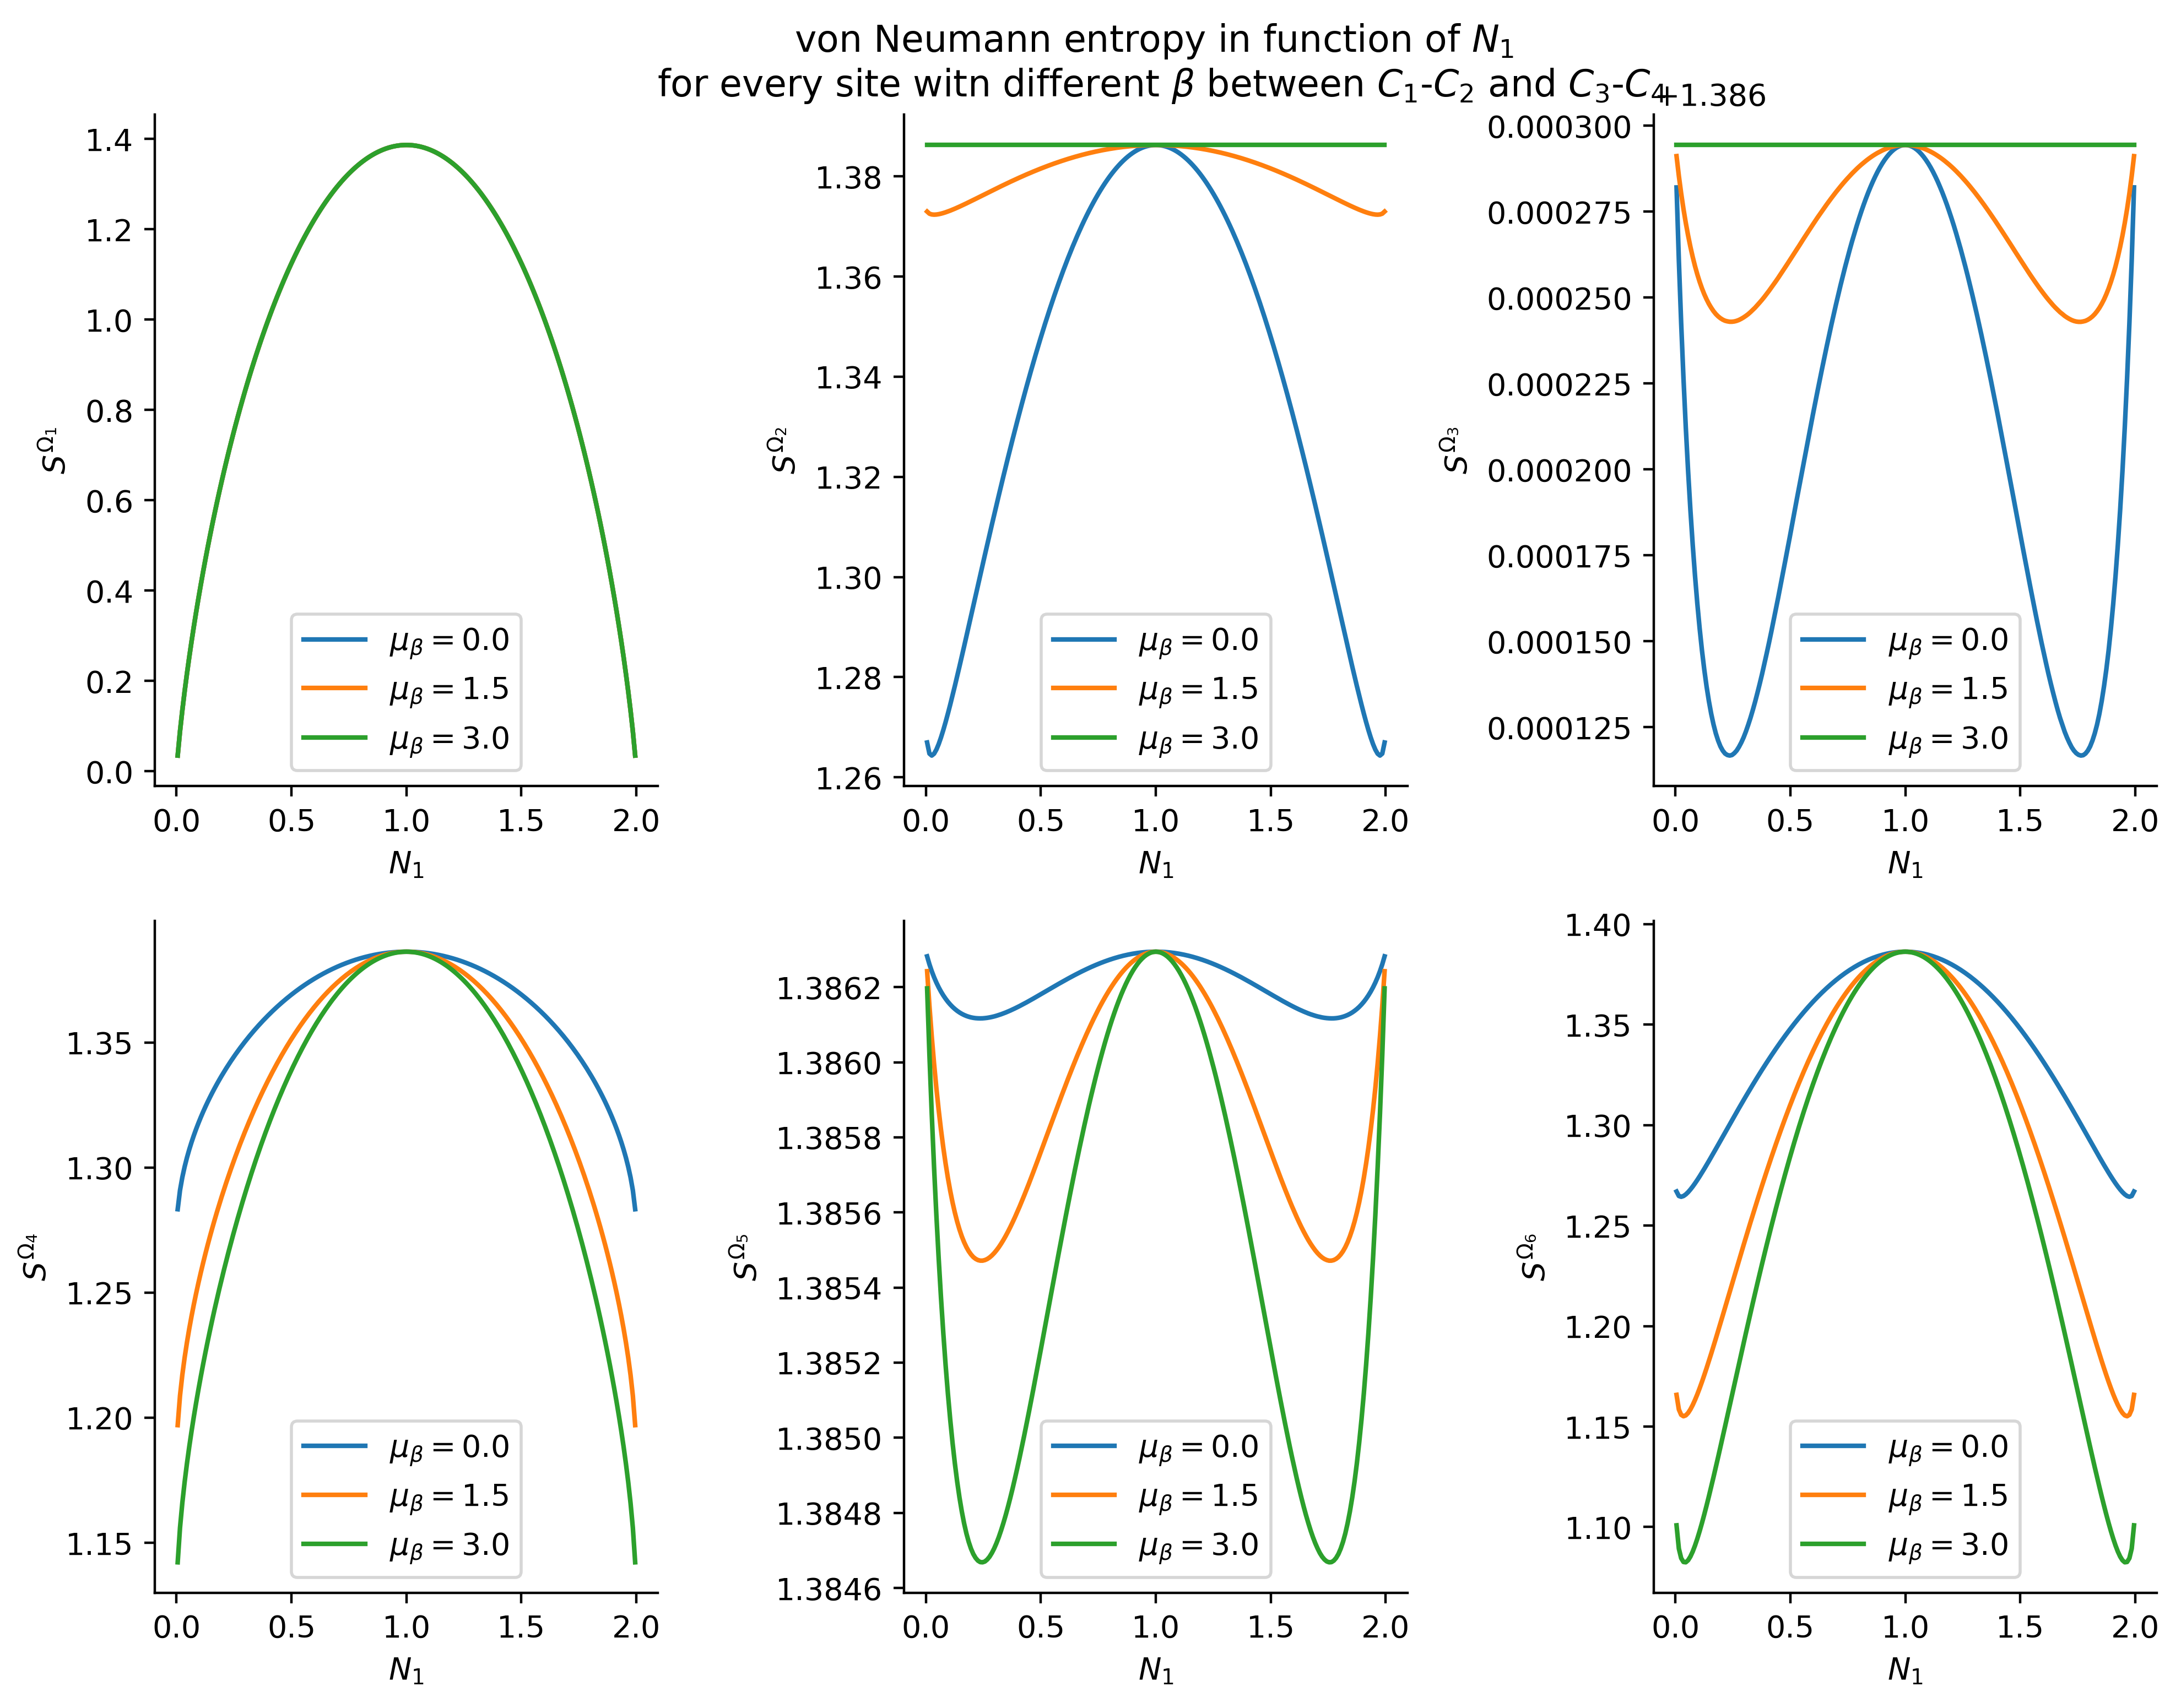

In [10]:
fig = plt.figure(figsize=(10, 8), dpi=400)
plt.title('von Neumann entropy in function of $N_1$ \n for every site witn different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
plt.axis('off')
for i in range(6):
    atom = i+1
    # Maak een nieuwe subplot
    ax = fig.add_subplot(2, 3, atom)

    # Verplaats de spines (assenlijnen) naar de oorsprong
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Plot de gegevens
    for index, beta in enumerate(mu_betas):
        ax.plot(electronpopulation_1, [sublijst[i] for sublijst in S_1_atom_betas[index]], label=r'$\mu_\beta = {%s} $' % beta)

    # Benoem de assen en titel 
    ax.set_xlabel(r'$N_1$')
    ax.set_ylabel(r'$S^{Ω_{%s}}$' % atom)

    # Legenda
    ax.legend()

# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout()

# Toon de plot
plt.show()

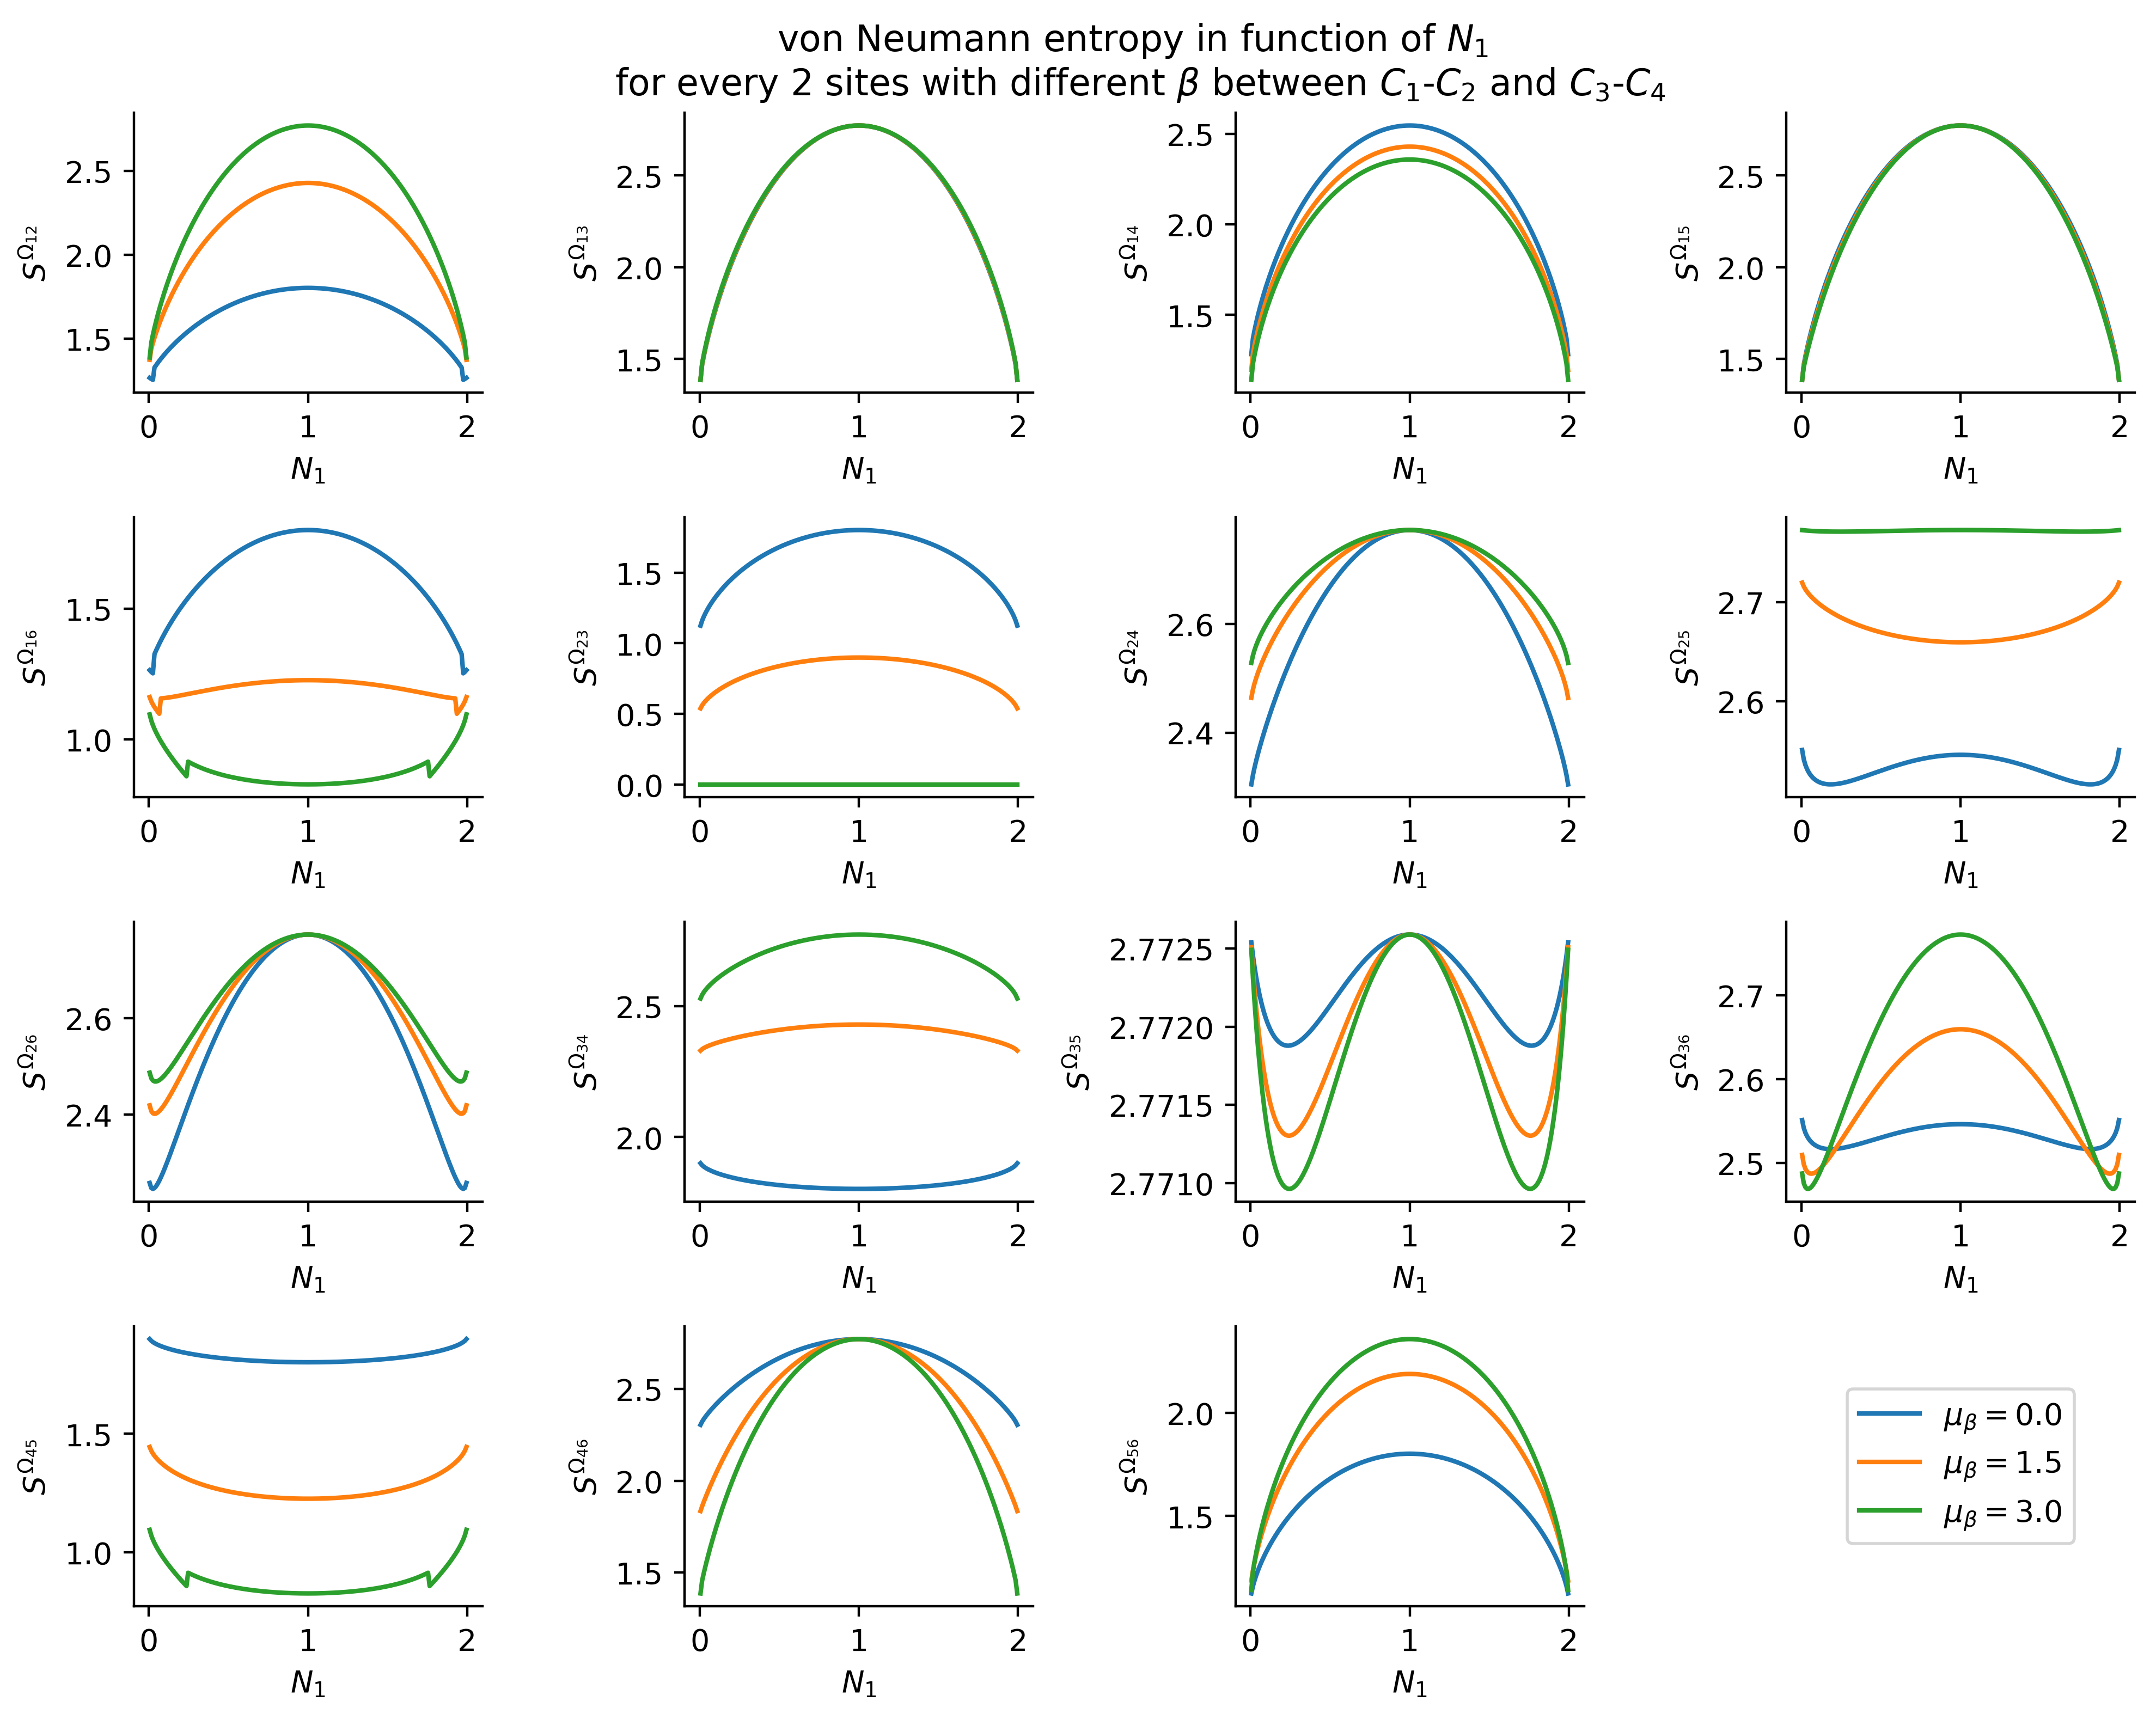

In [11]:
fig = plt.figure(figsize=(10, 8), dpi=400)
plt.title('von Neumann entropy in function of $N_1$ \n for every 2 sites with different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
plt.axis('off')
k = 0
for i in range(6):
    for j in range(i+1, 6):
        atoms = str(i+1)+str(j+1)
        # Maak een nieuwe subplot
        ax = fig.add_subplot(4, 4, k+1)

        # Verplaats de spines (assenlijnen) naar de oorsprong
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Plot de gegevens
        for index, beta in enumerate(mu_betas):
            ax.plot(electronpopulation_1, [sublijst[k] for sublijst in S_2_atoms_betas[index]], label=r'$\mu_\beta = {%s} $' % beta)
            
        # Benoem de assen en titel 
        ax.set_xlabel(r'$N_1$')
        ax.set_ylabel(r'$S^{Ω_{%s}}$' % atoms)
        k+=1

handles, labels = ax.get_legend_handles_labels()
# Voeg een extra subplot toe voor de legende
ax = fig.add_subplot(4, 4, 16)
ax.axis('off')

# Voeg de legende toe aan de subplots

ax.legend(handles, labels, loc='center')
# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout()

# Toon de plot
plt.show()

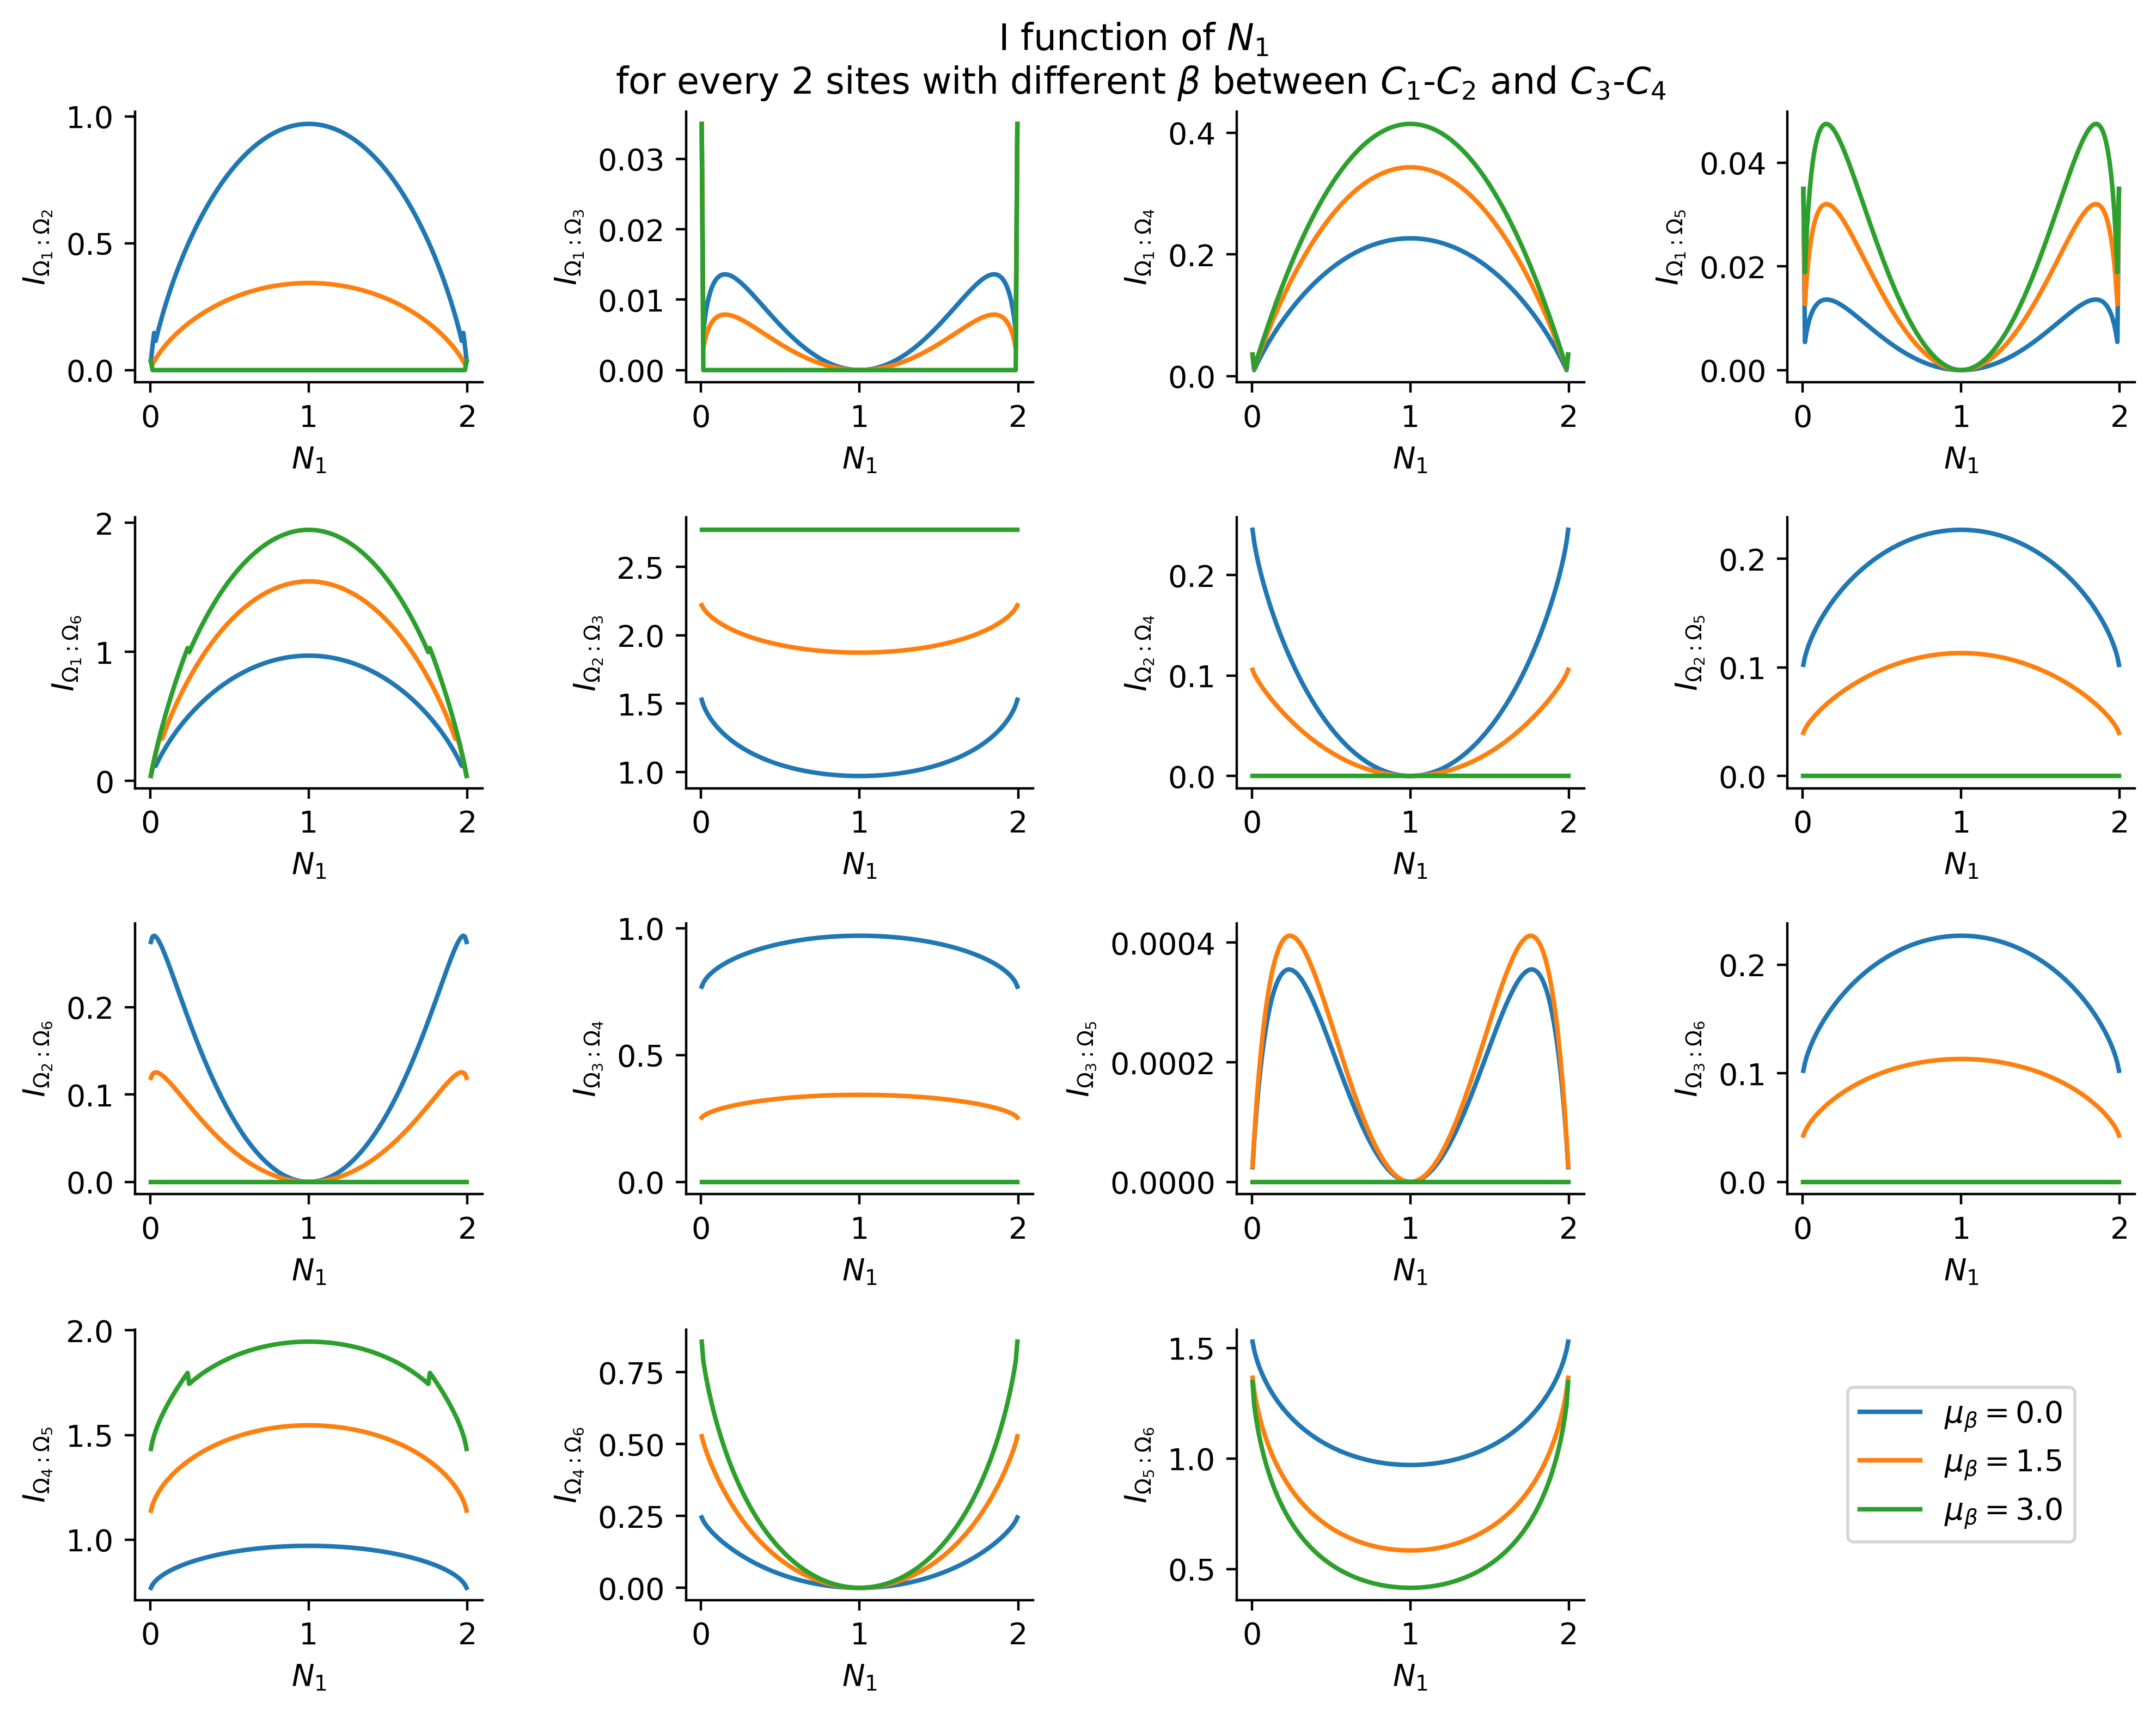

In [12]:
fig = plt.figure(figsize=(10, 8), dpi=400)
plt.title('I function of $N_1$ \n for every 2 sites with different $\\beta$ between $C_1$-$C_2$ and $C_3$-$C_4$')
plt.axis('off')
k = 0
for i in range(6):
    for j in range(i+1, 6):
        atoms = (str(i+1),str(j+1))
        # Maak een nieuwe subplot
        ax = fig.add_subplot(4, 4, k+1)

        # Verplaats de spines (assenlijnen) naar de oorsprong
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Plot de gegevens
        for index, beta in enumerate(mu_betas):
            ax.plot(electronpopulation_1, [S_1_atom_betas[index][r][i] + S_1_atom_betas[index][r][j] - sublijst[k] for r, sublijst in enumerate(S_2_atoms_betas[index])], label=r'$\mu_\beta = {%s} $' % beta)
        # Benoem de assen en titel 
        ax.set_xlabel(r'$N_1$')
        ax.set_ylabel(r'$I_{Ω_{%s}: Ω_{%s}}$' %atoms)
        k+=1
        
handles, labels = ax.get_legend_handles_labels()
# Voeg een extra subplot toe voor de legende
ax = fig.add_subplot(4, 4, 16)
ax.axis('off')

# Voeg de legende toe aan de subplots

ax.legend(handles, labels, loc='center')
# Zorg ervoor dat de subplots niet overlappen
plt.tight_layout()

# Toon de plot
plt.show()

[0.004, 0.5, 1]
[0.  1.5 3. ]


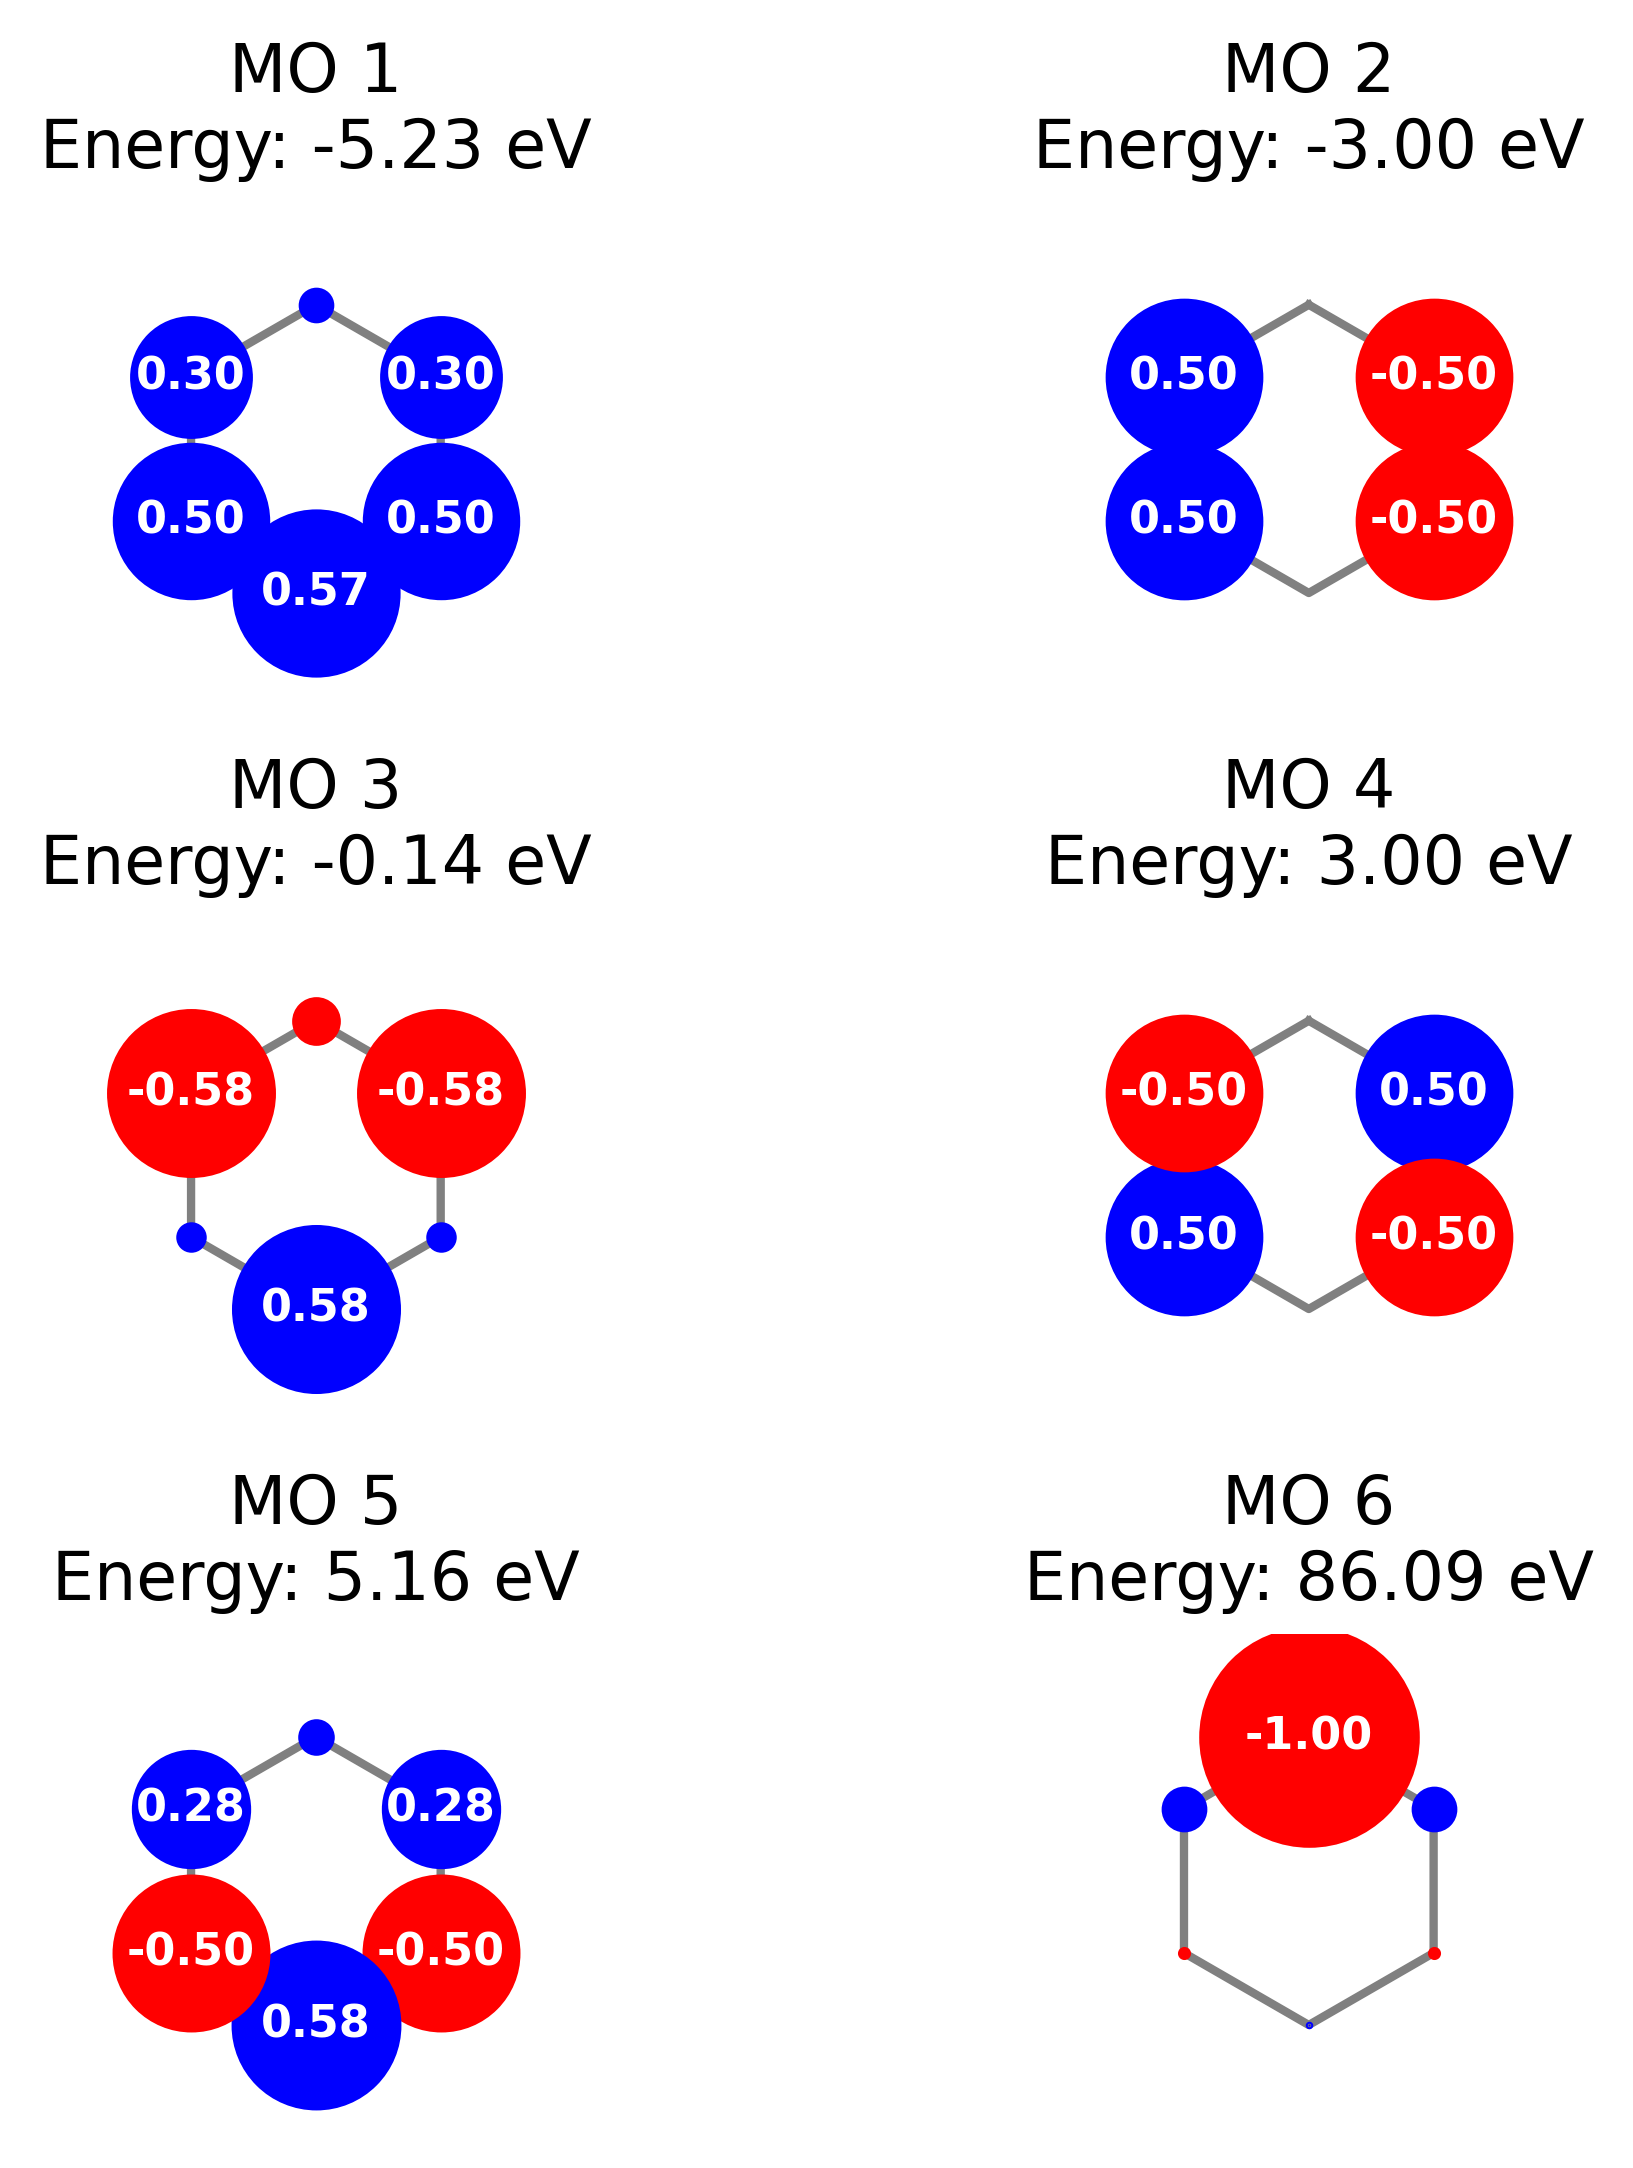

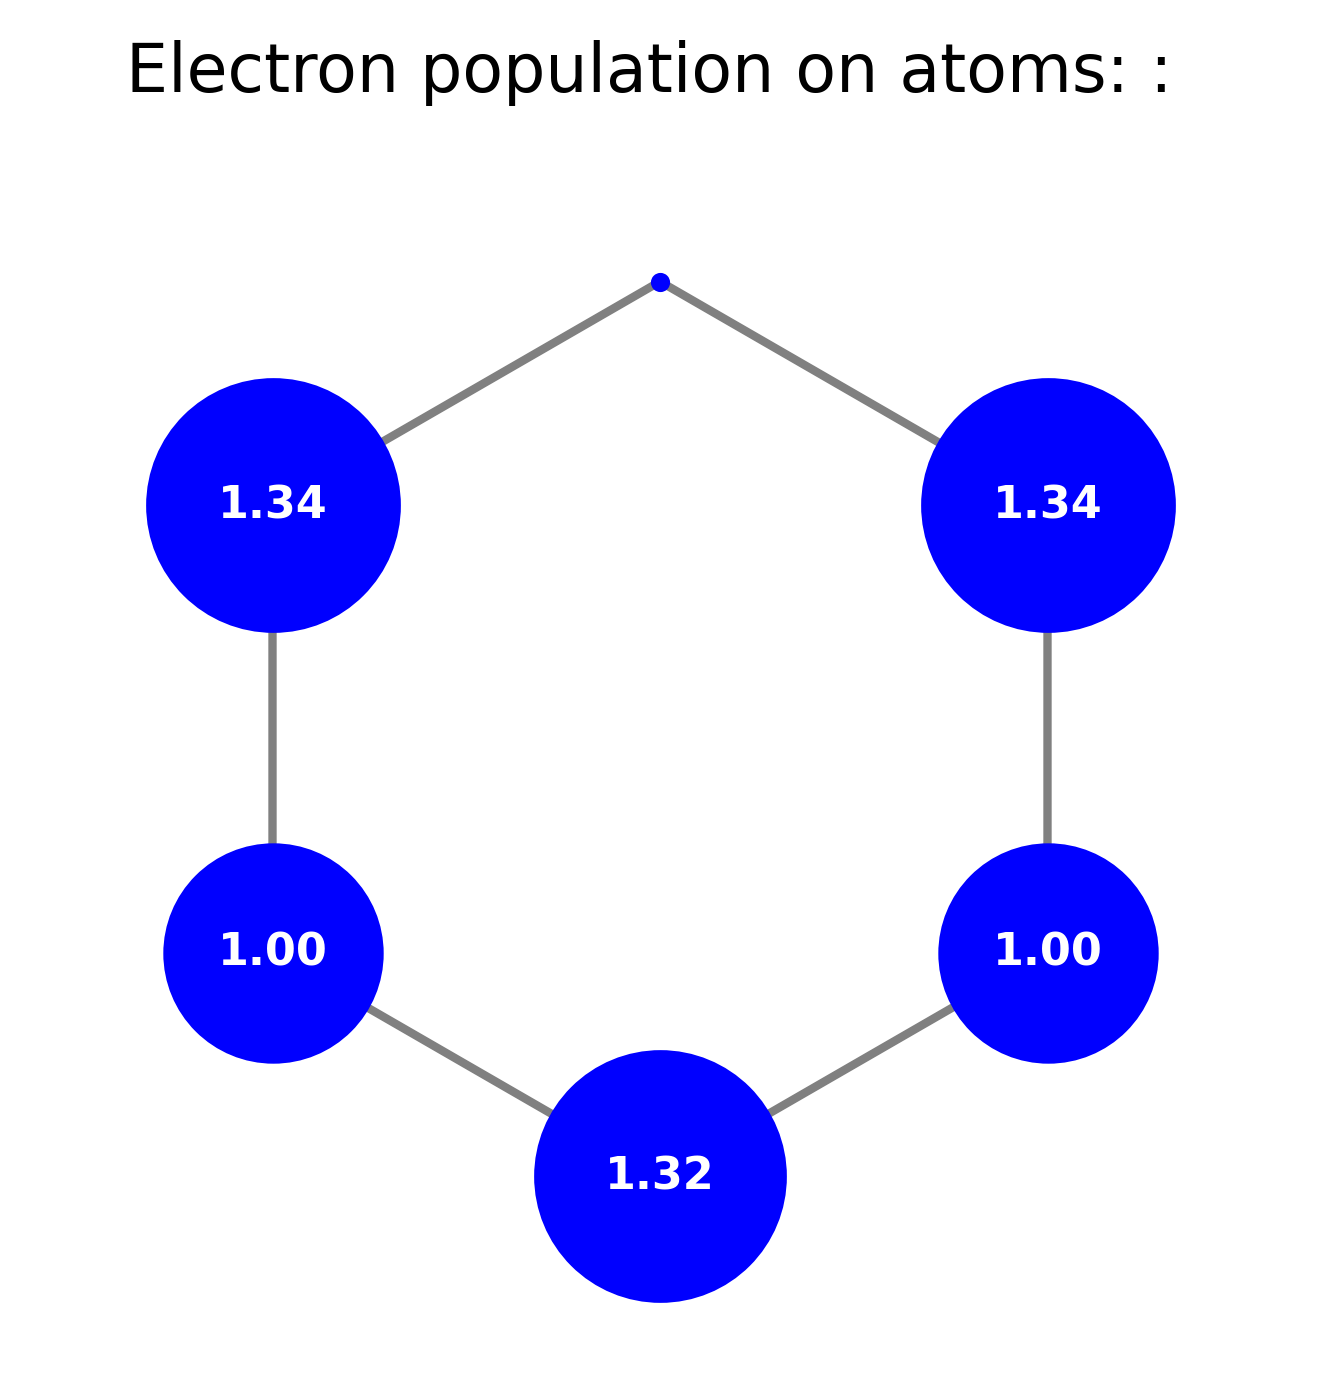

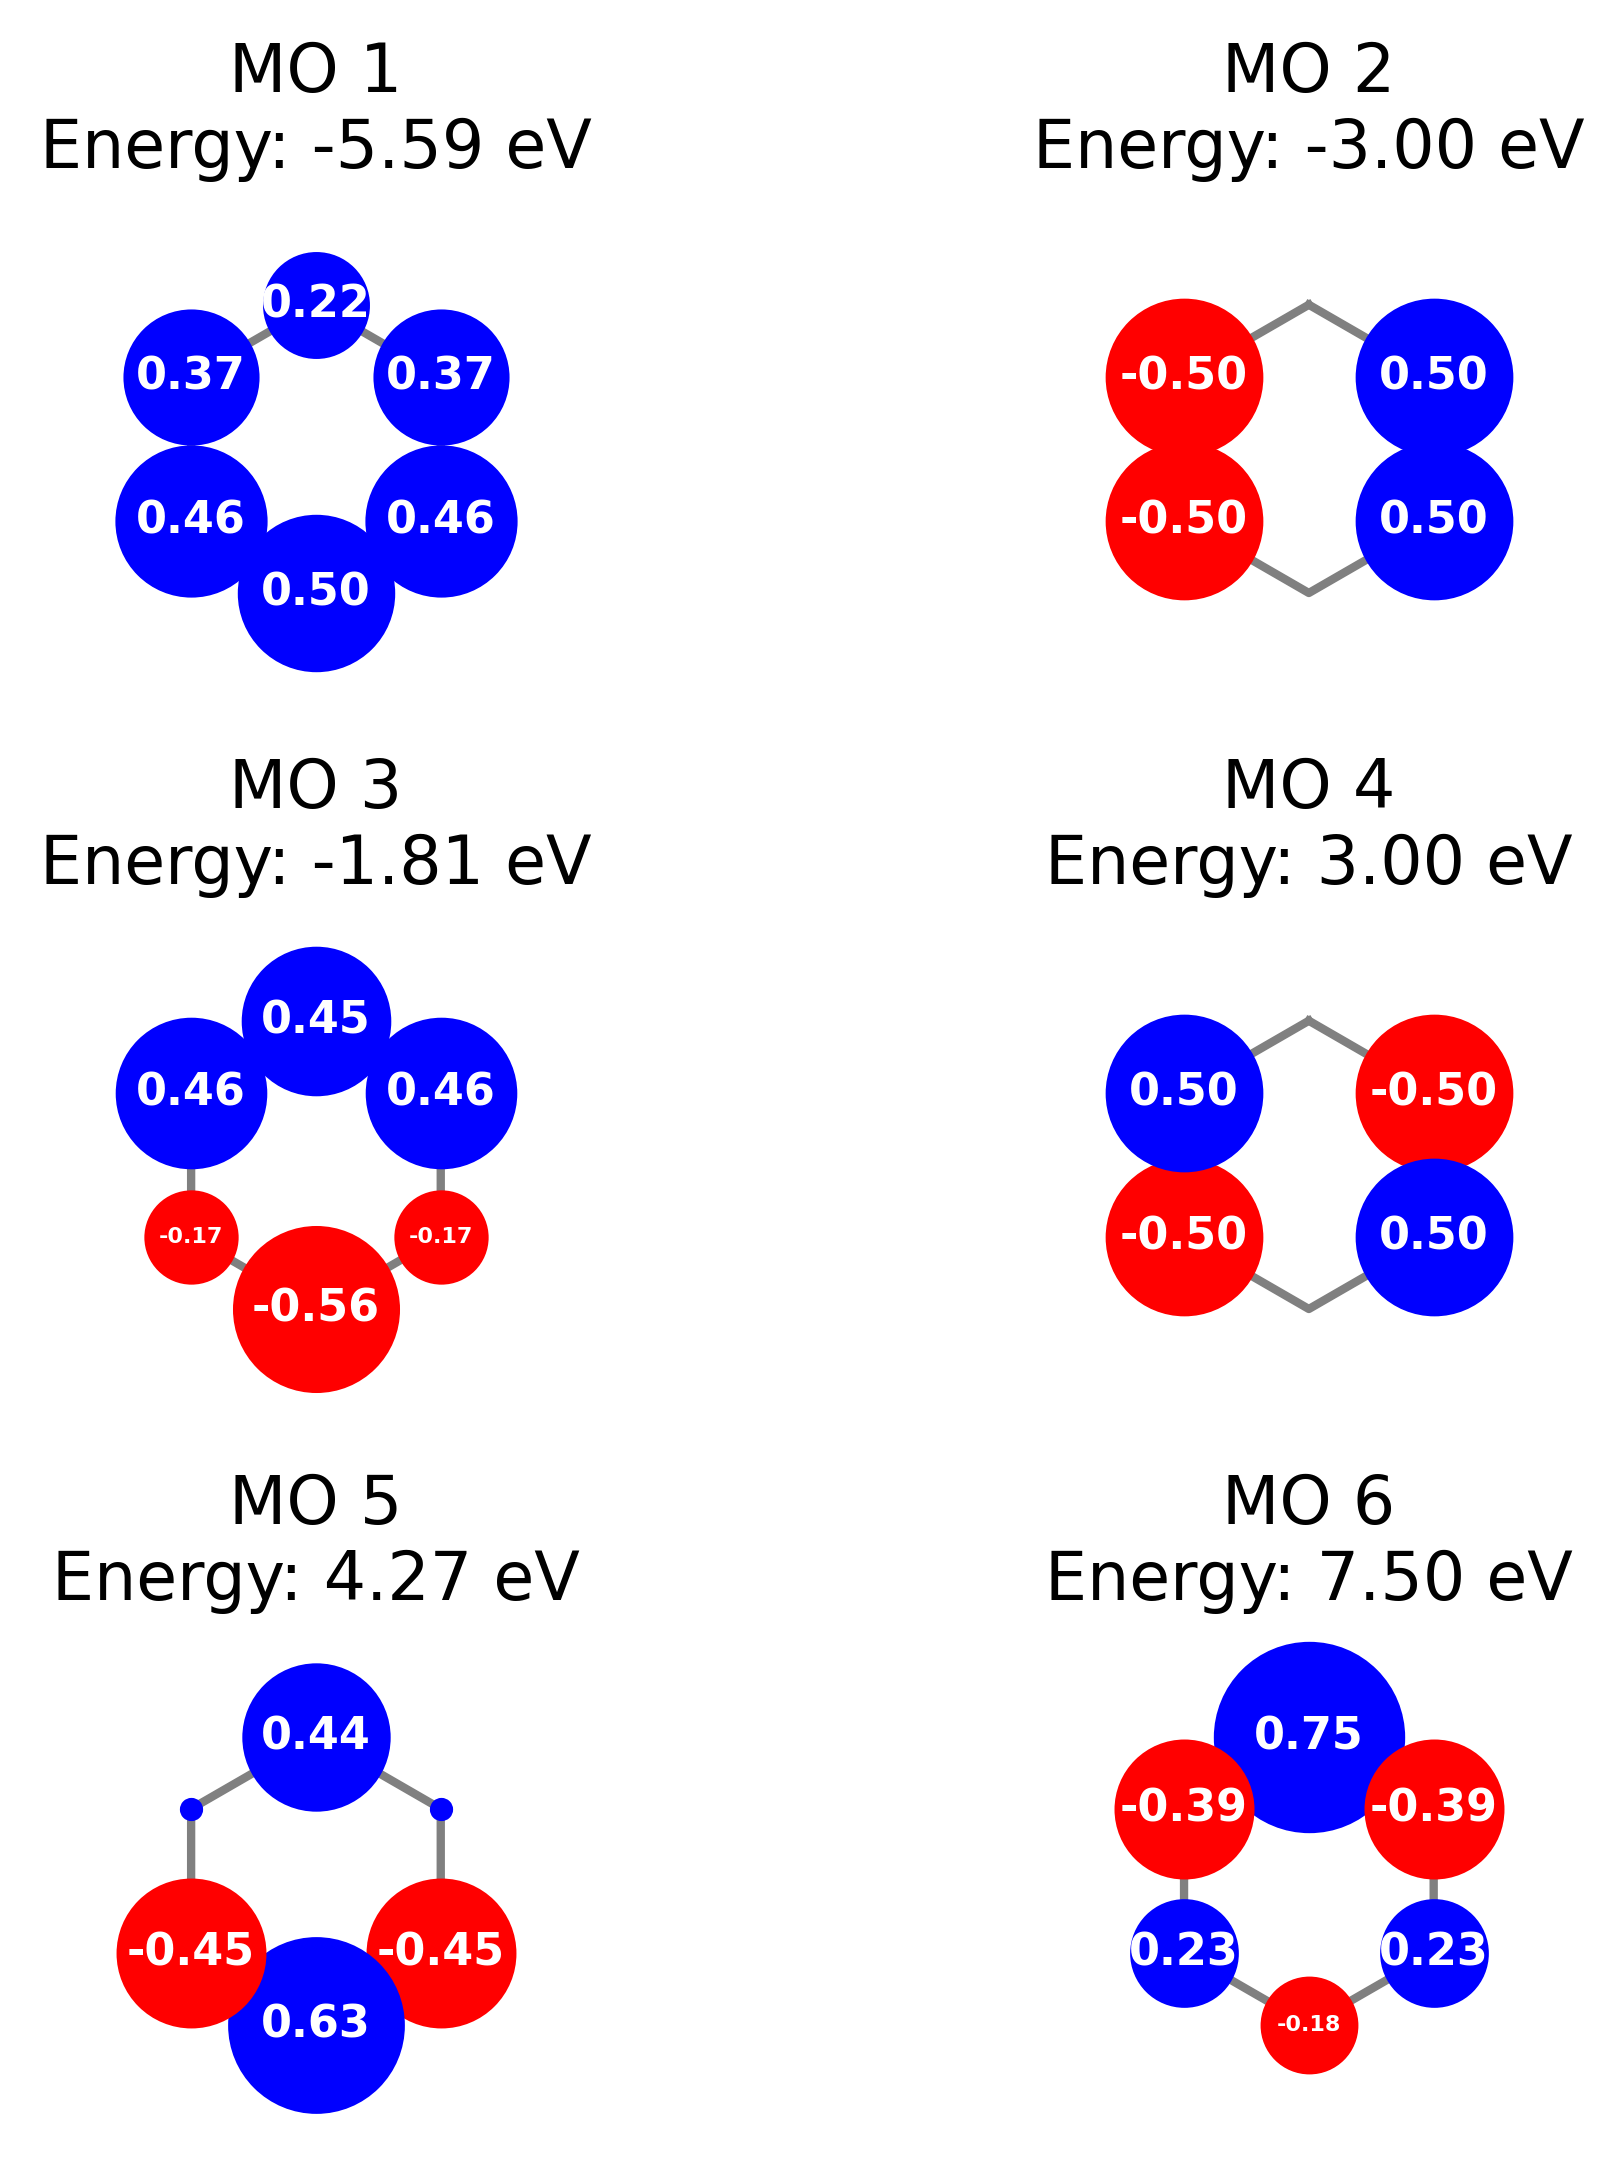

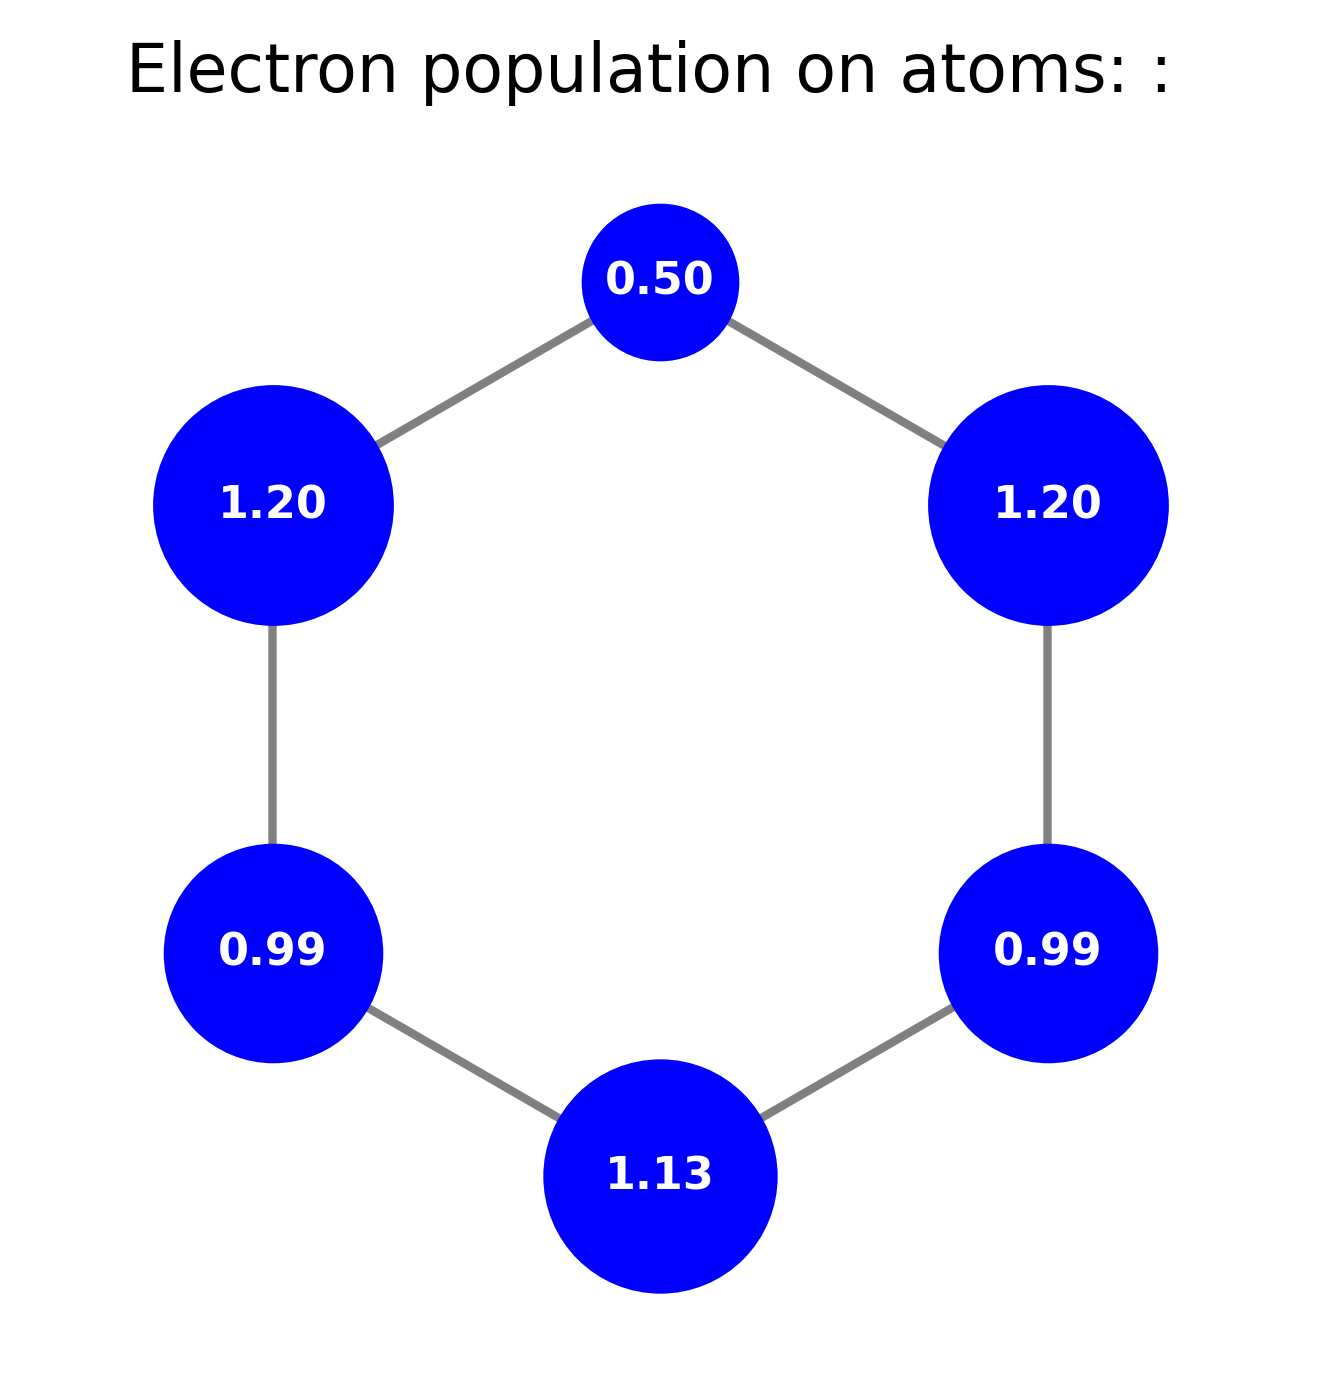

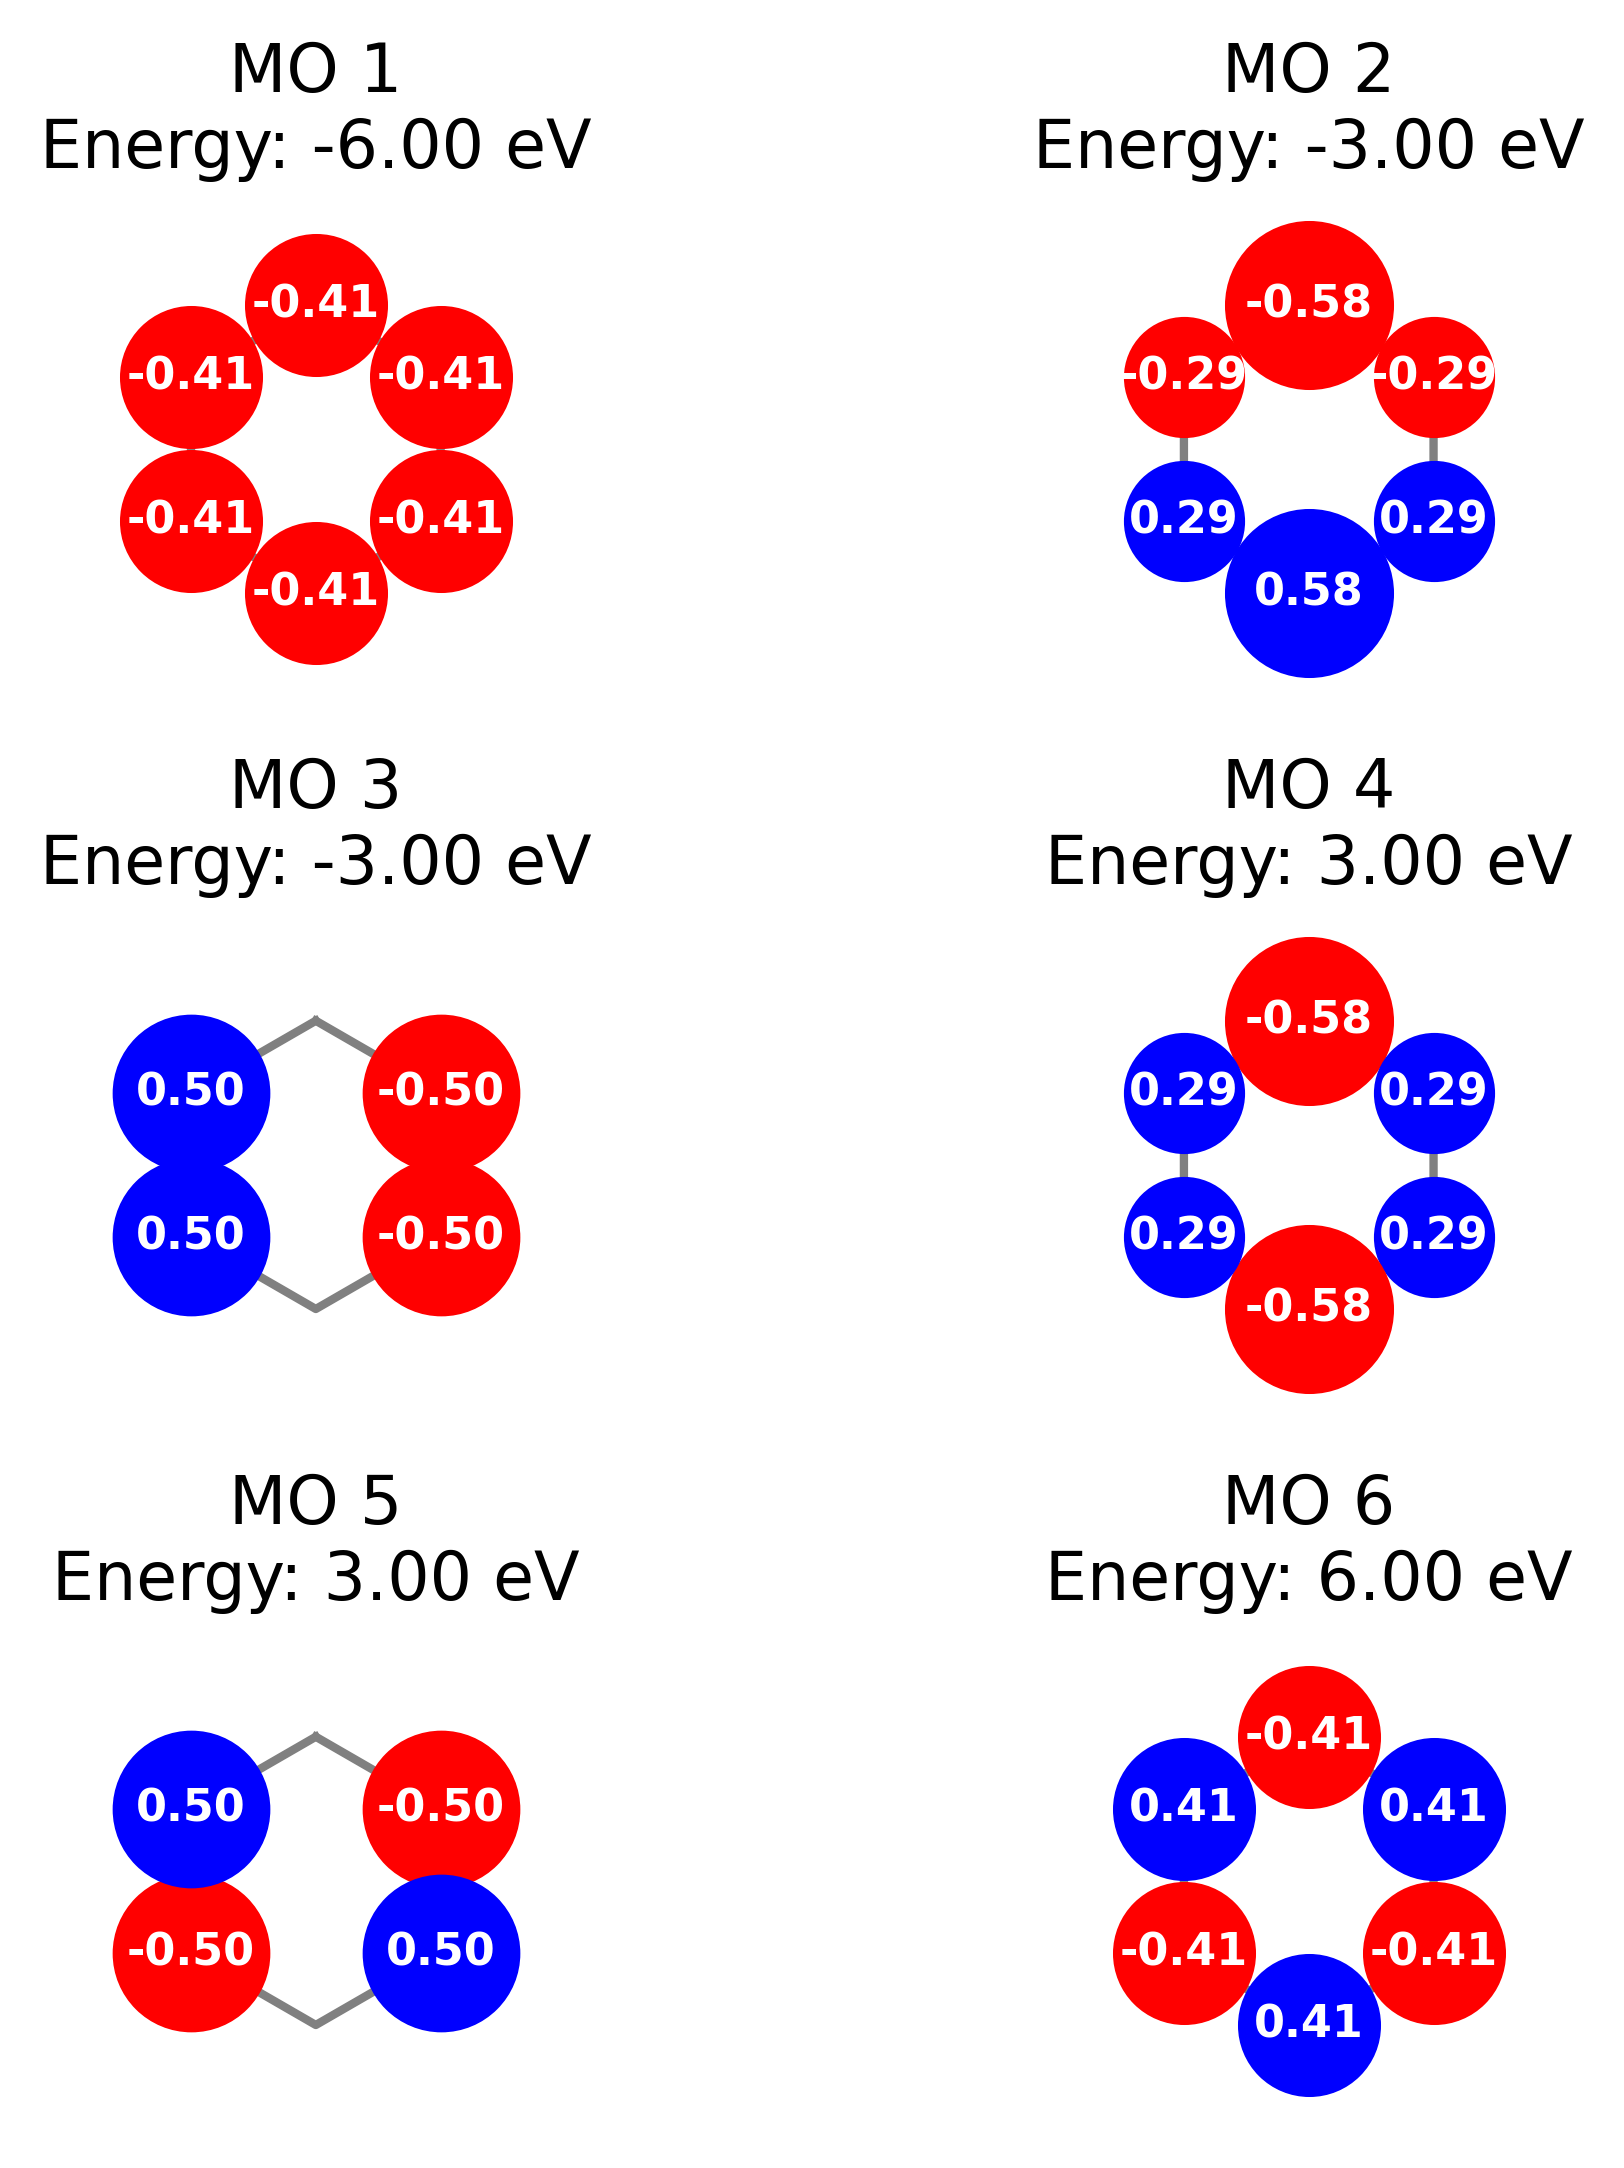

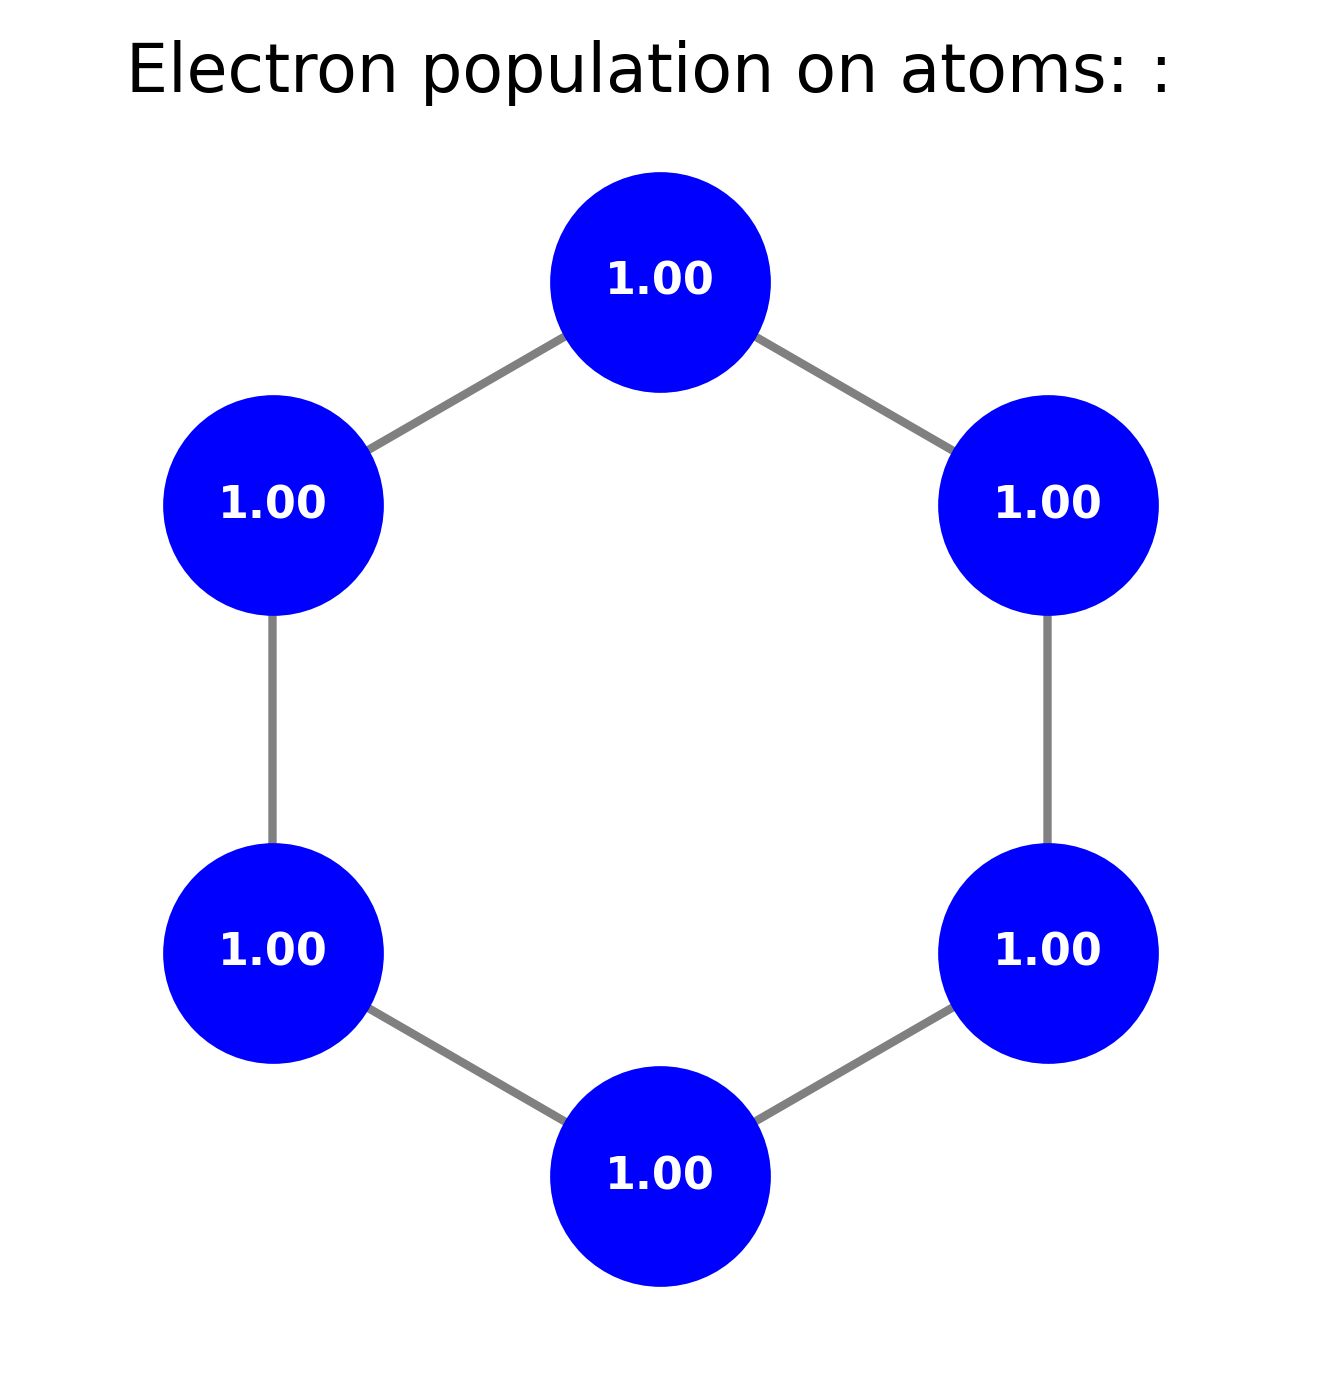

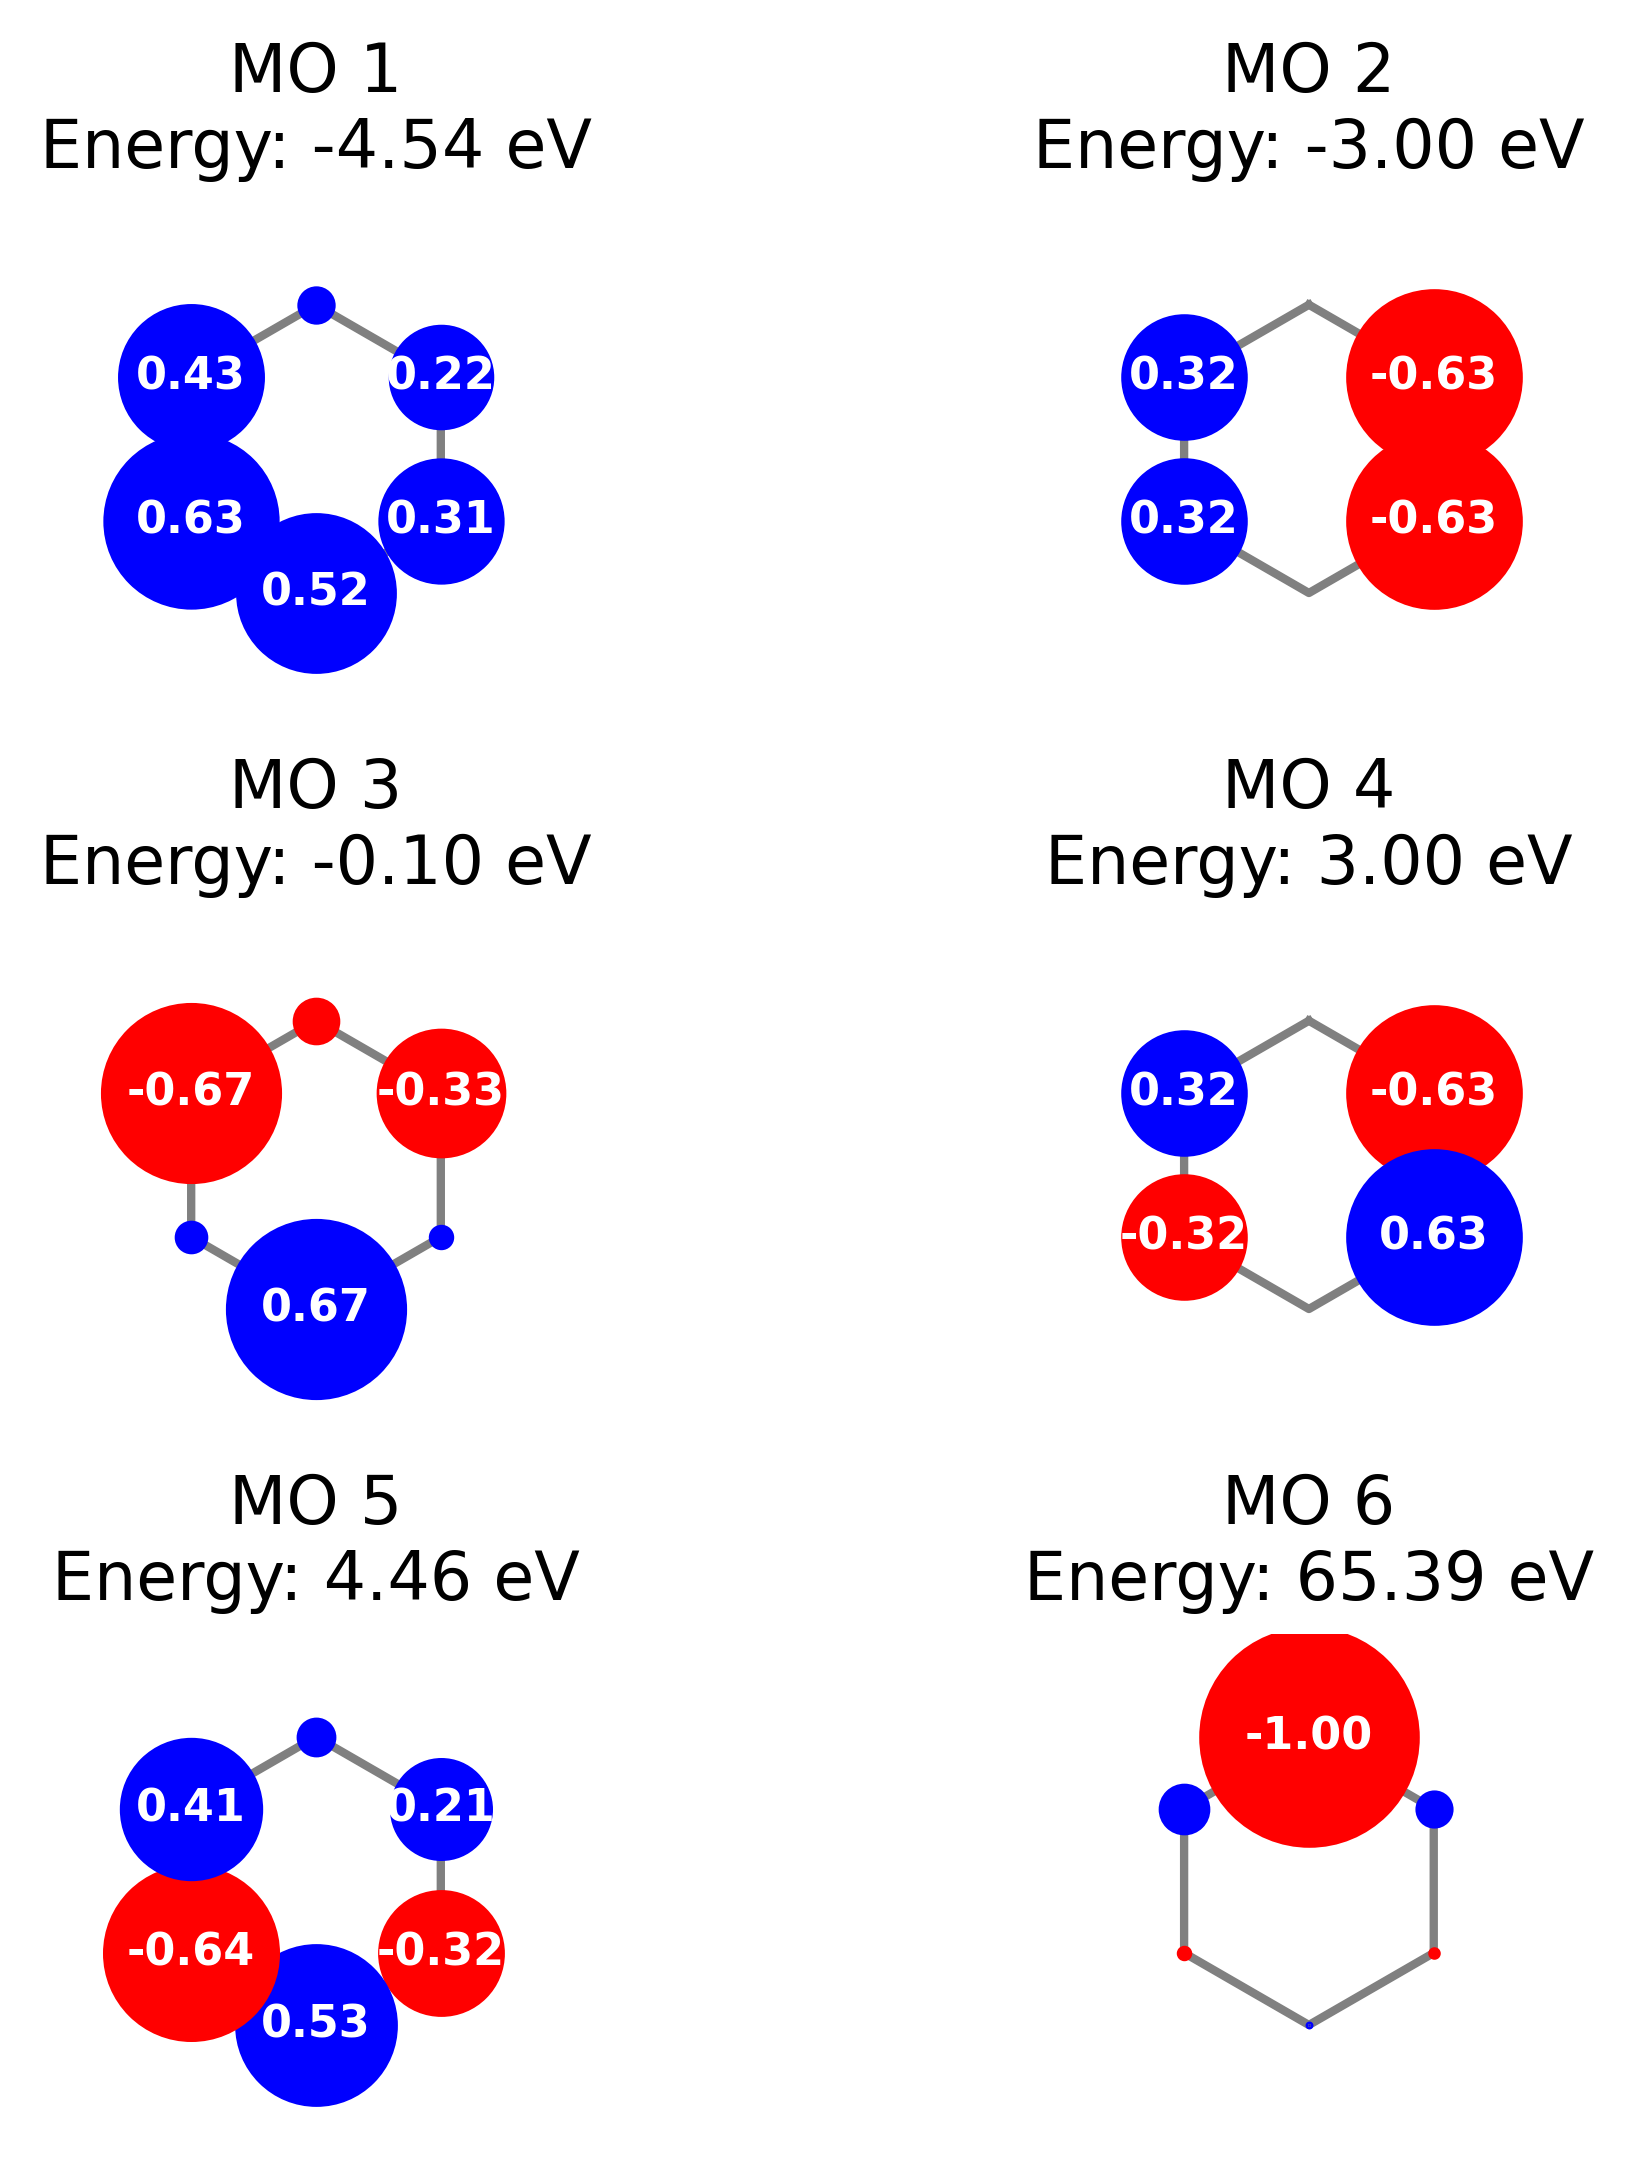

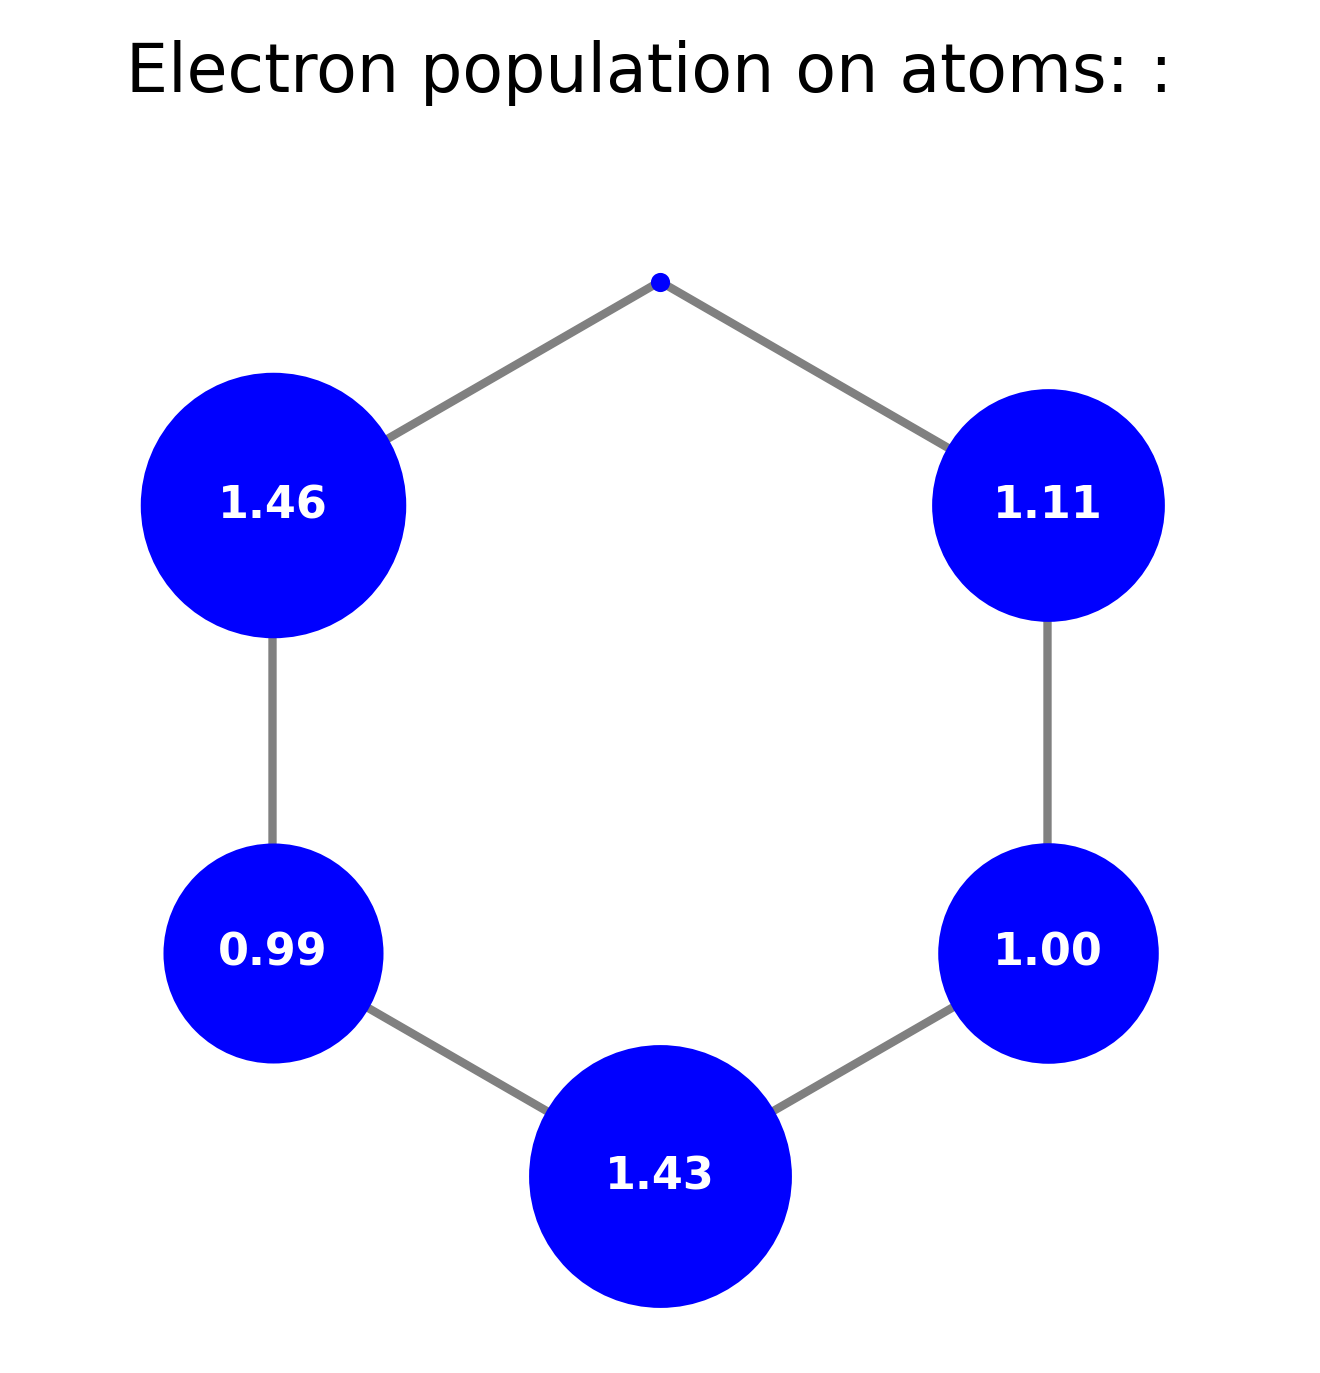

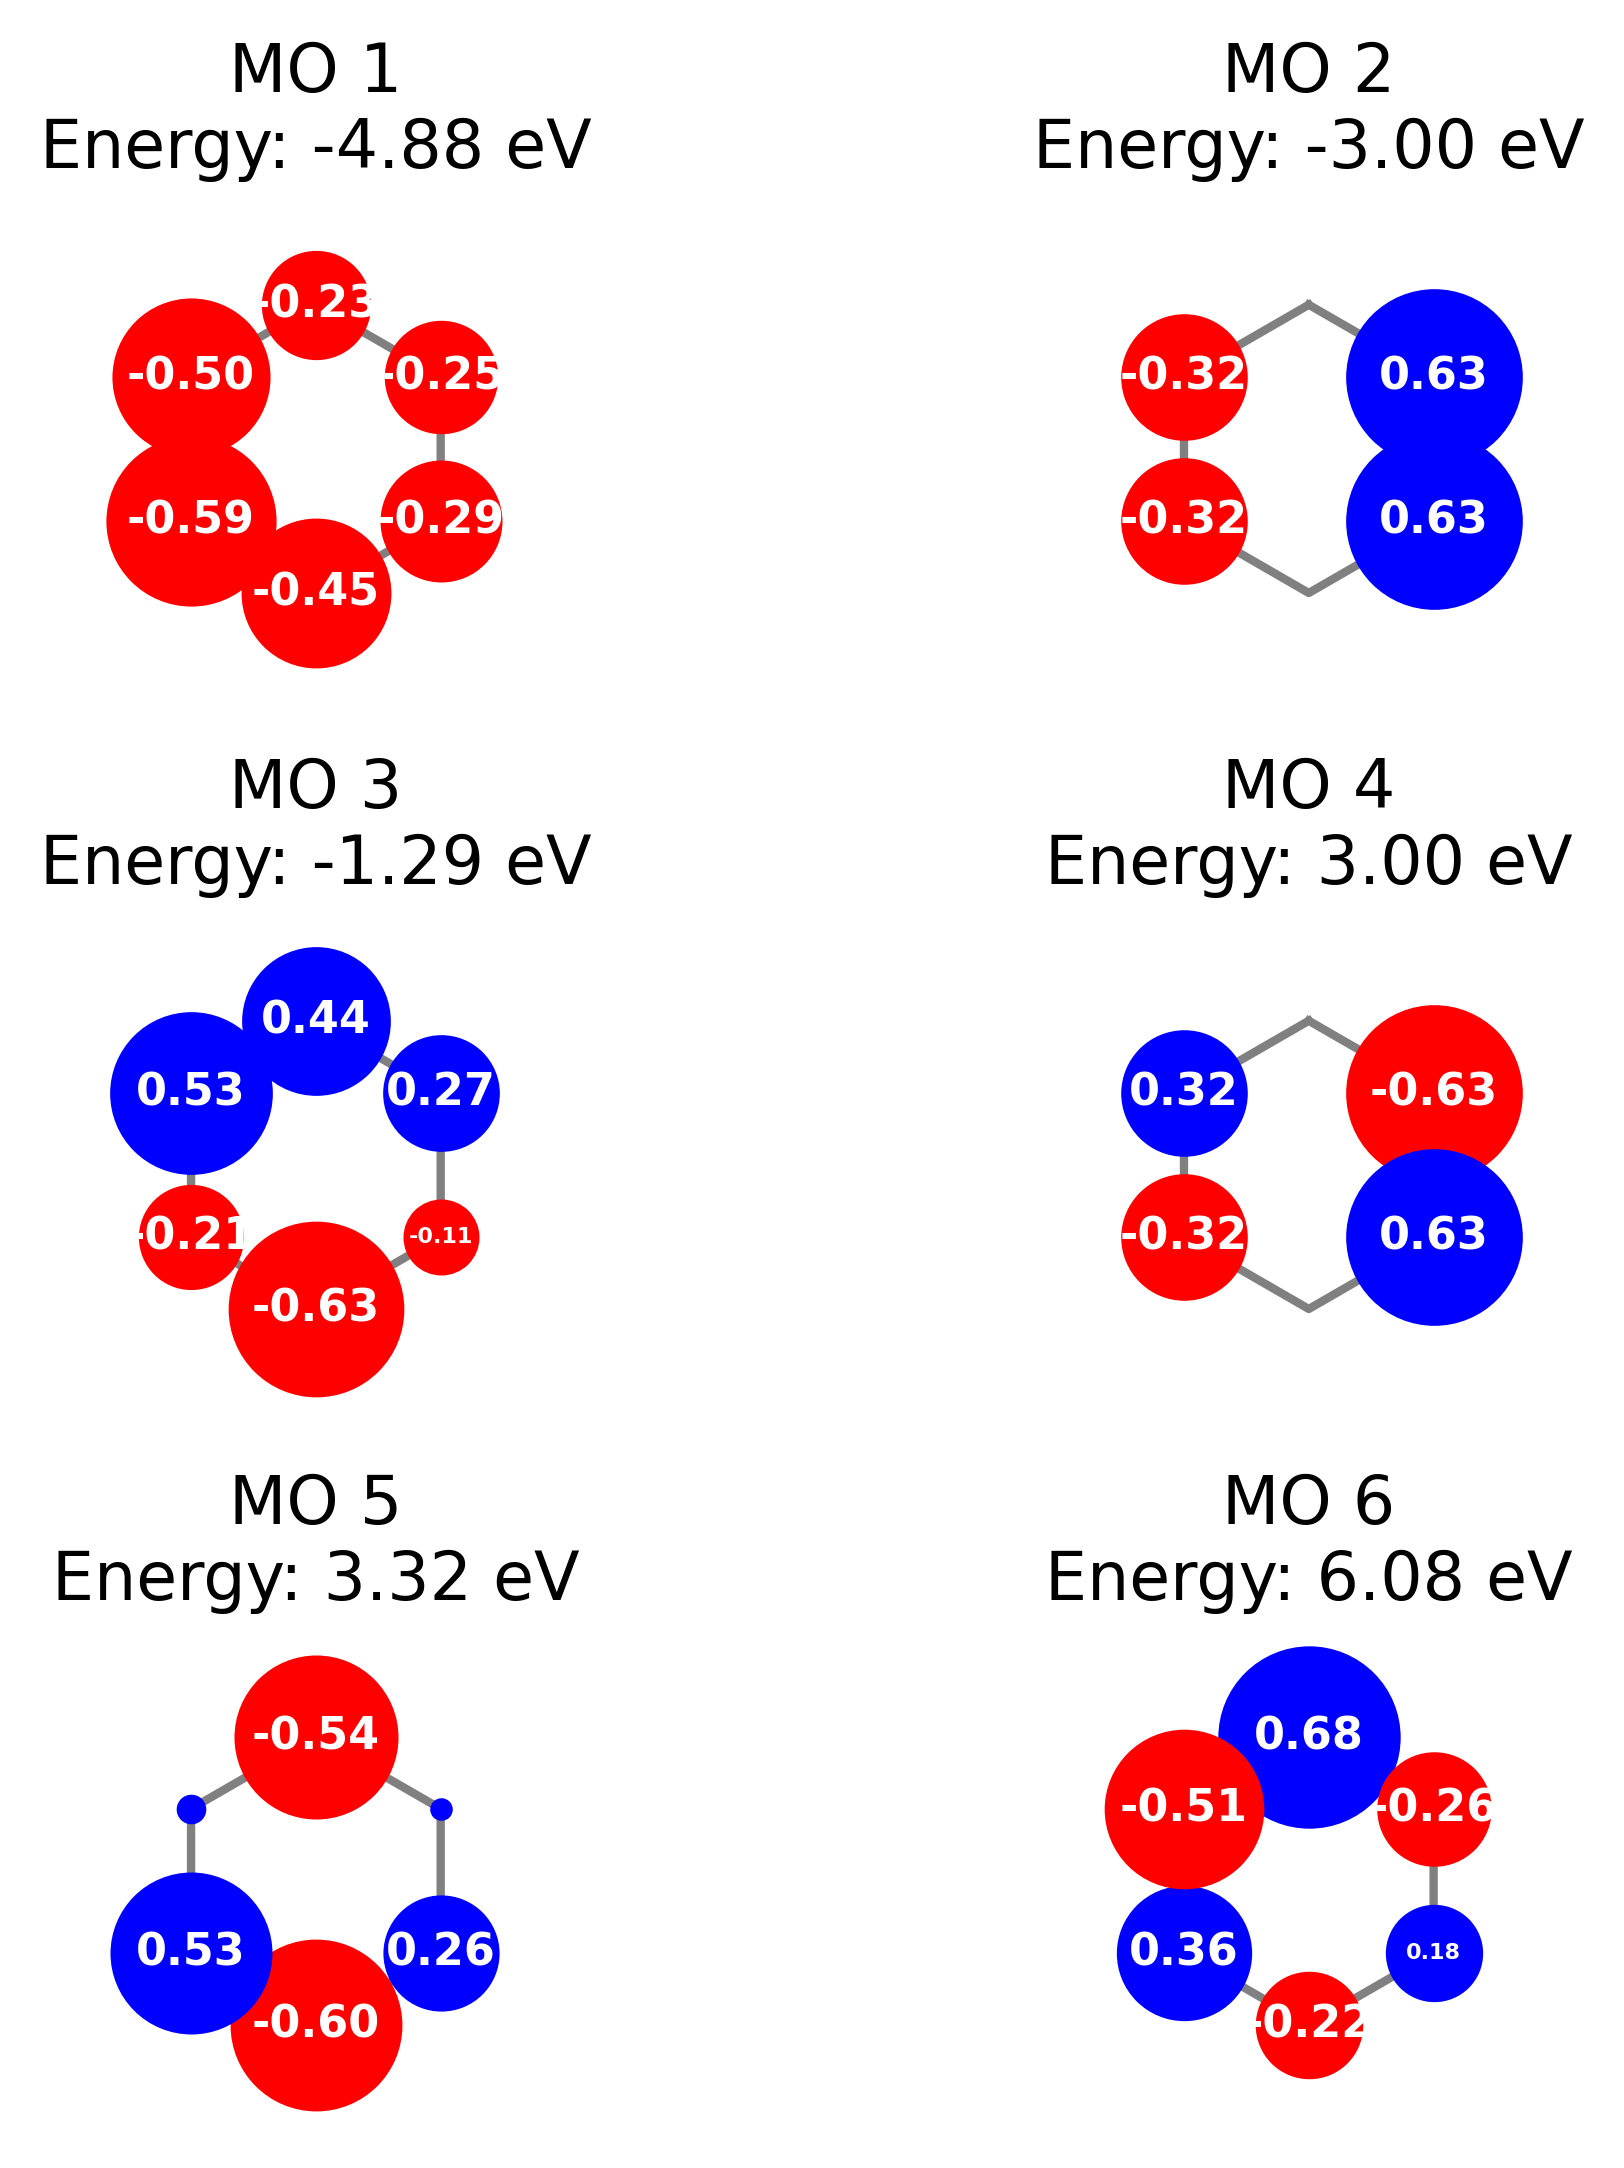

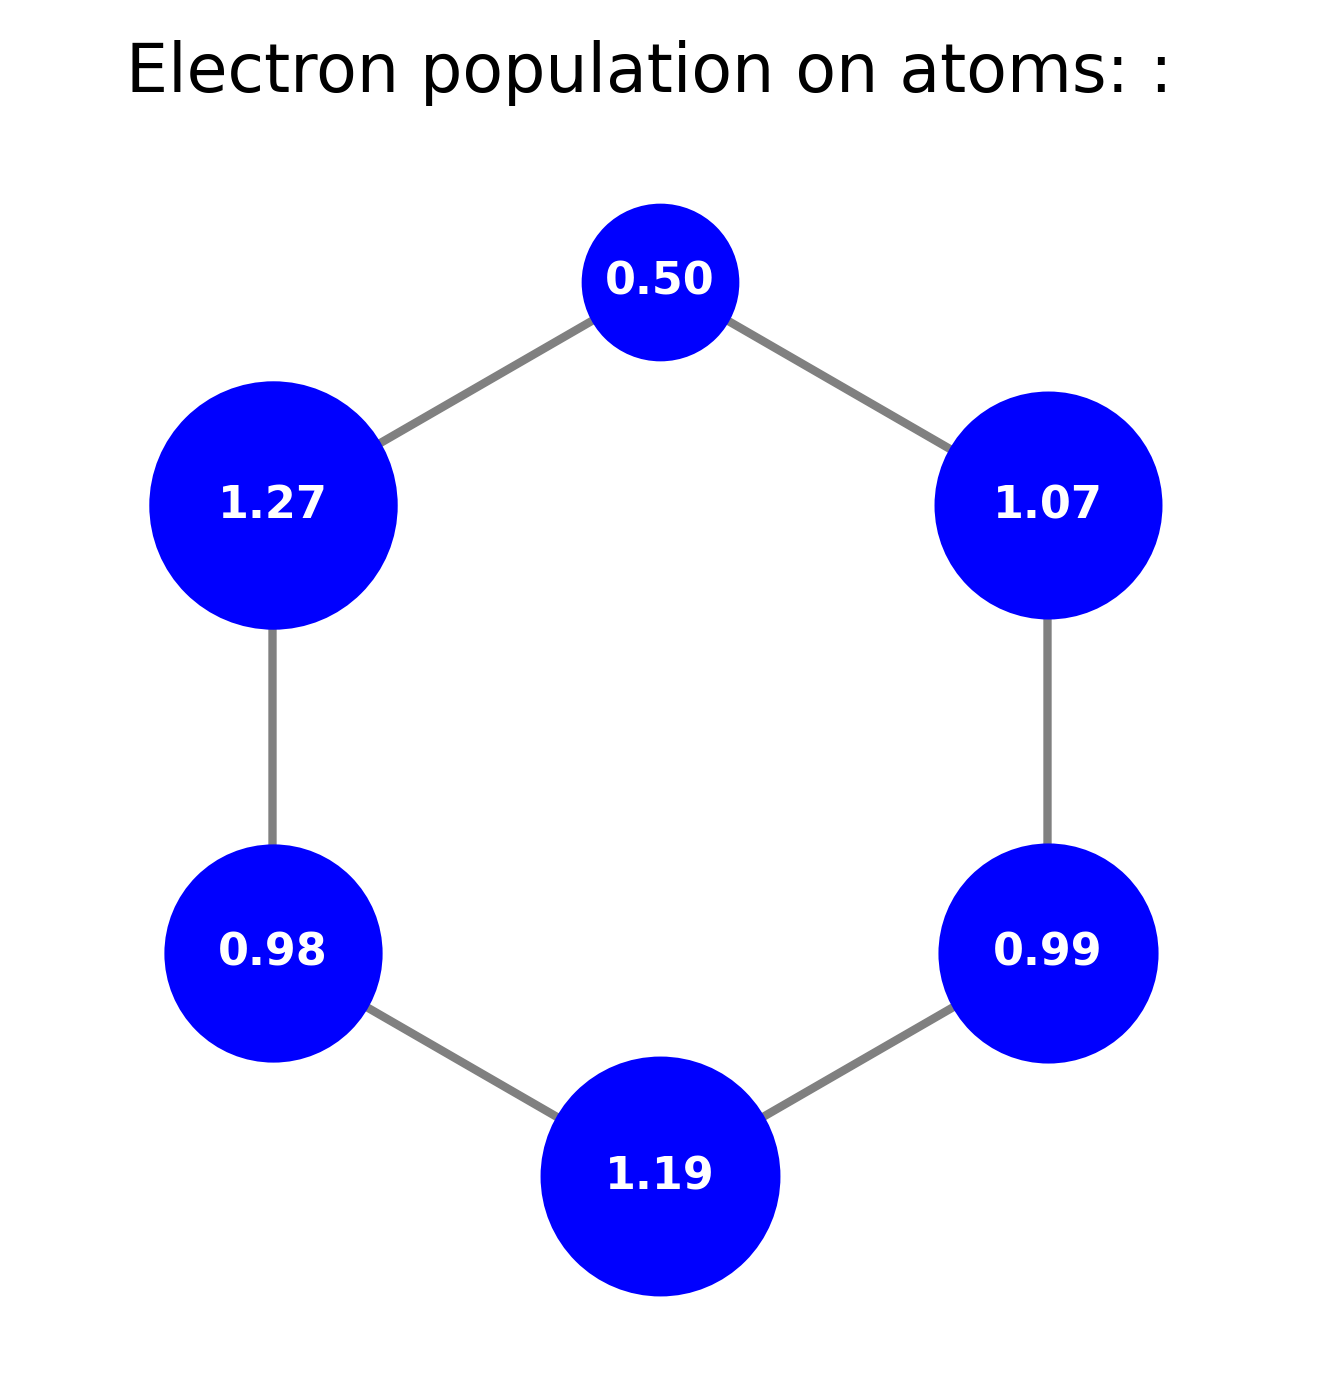

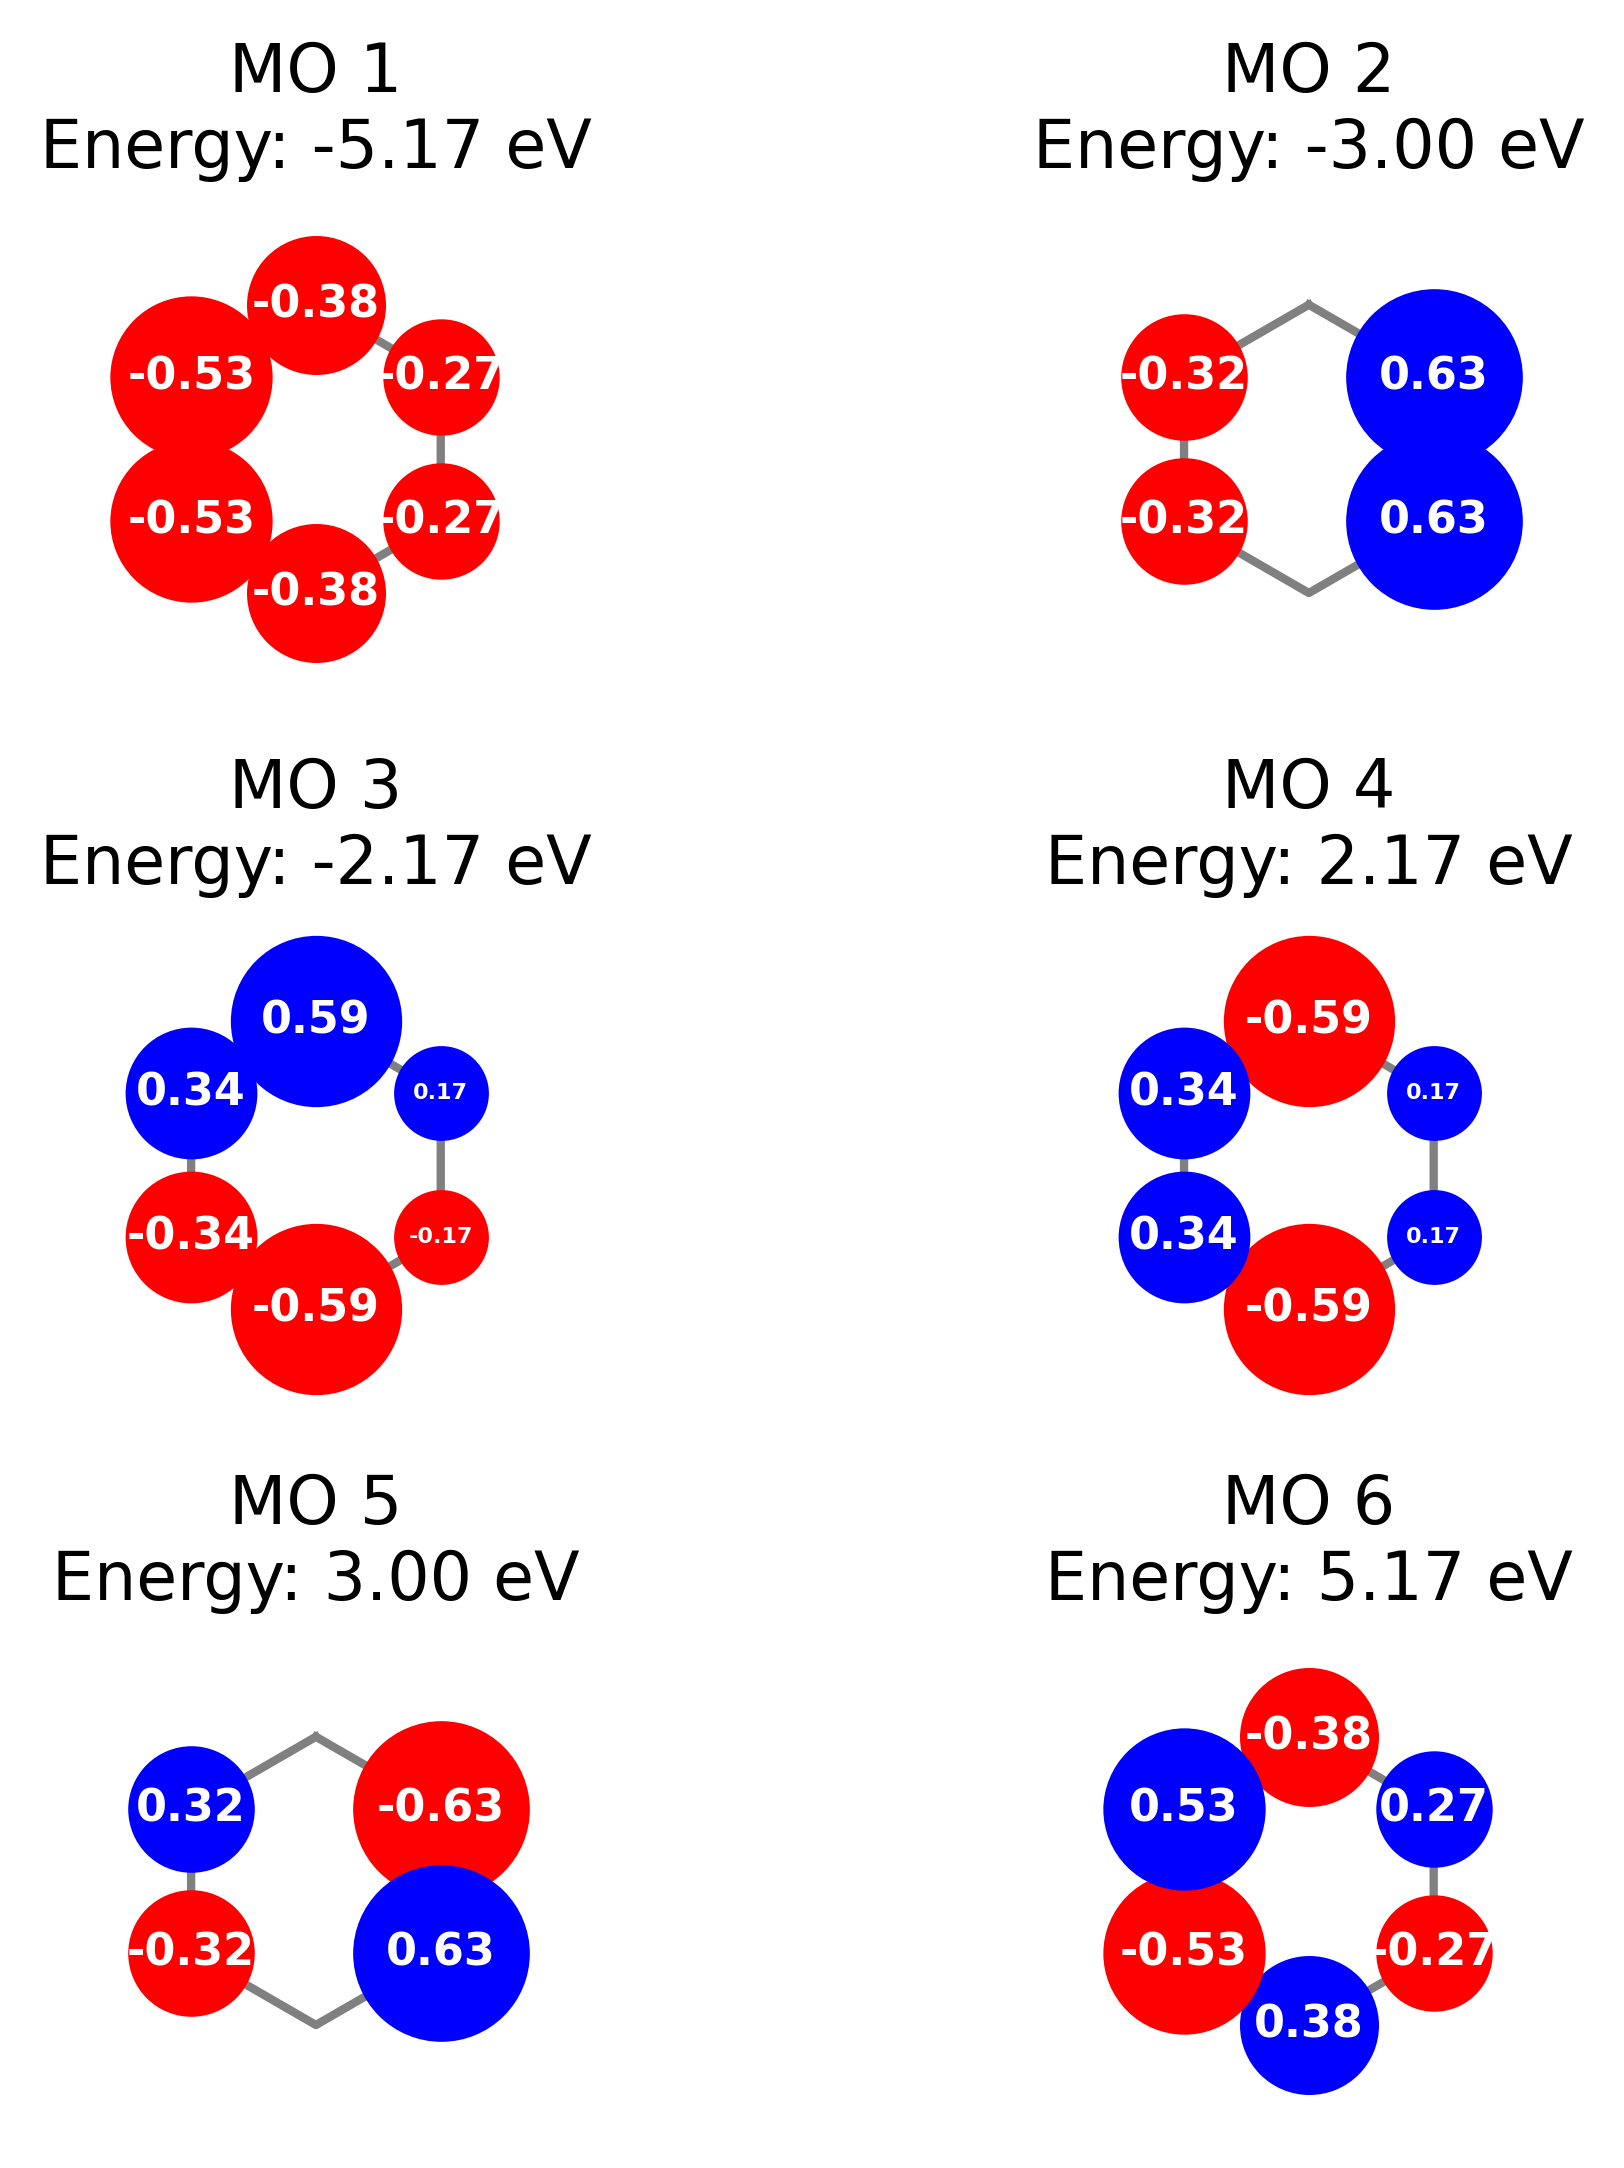

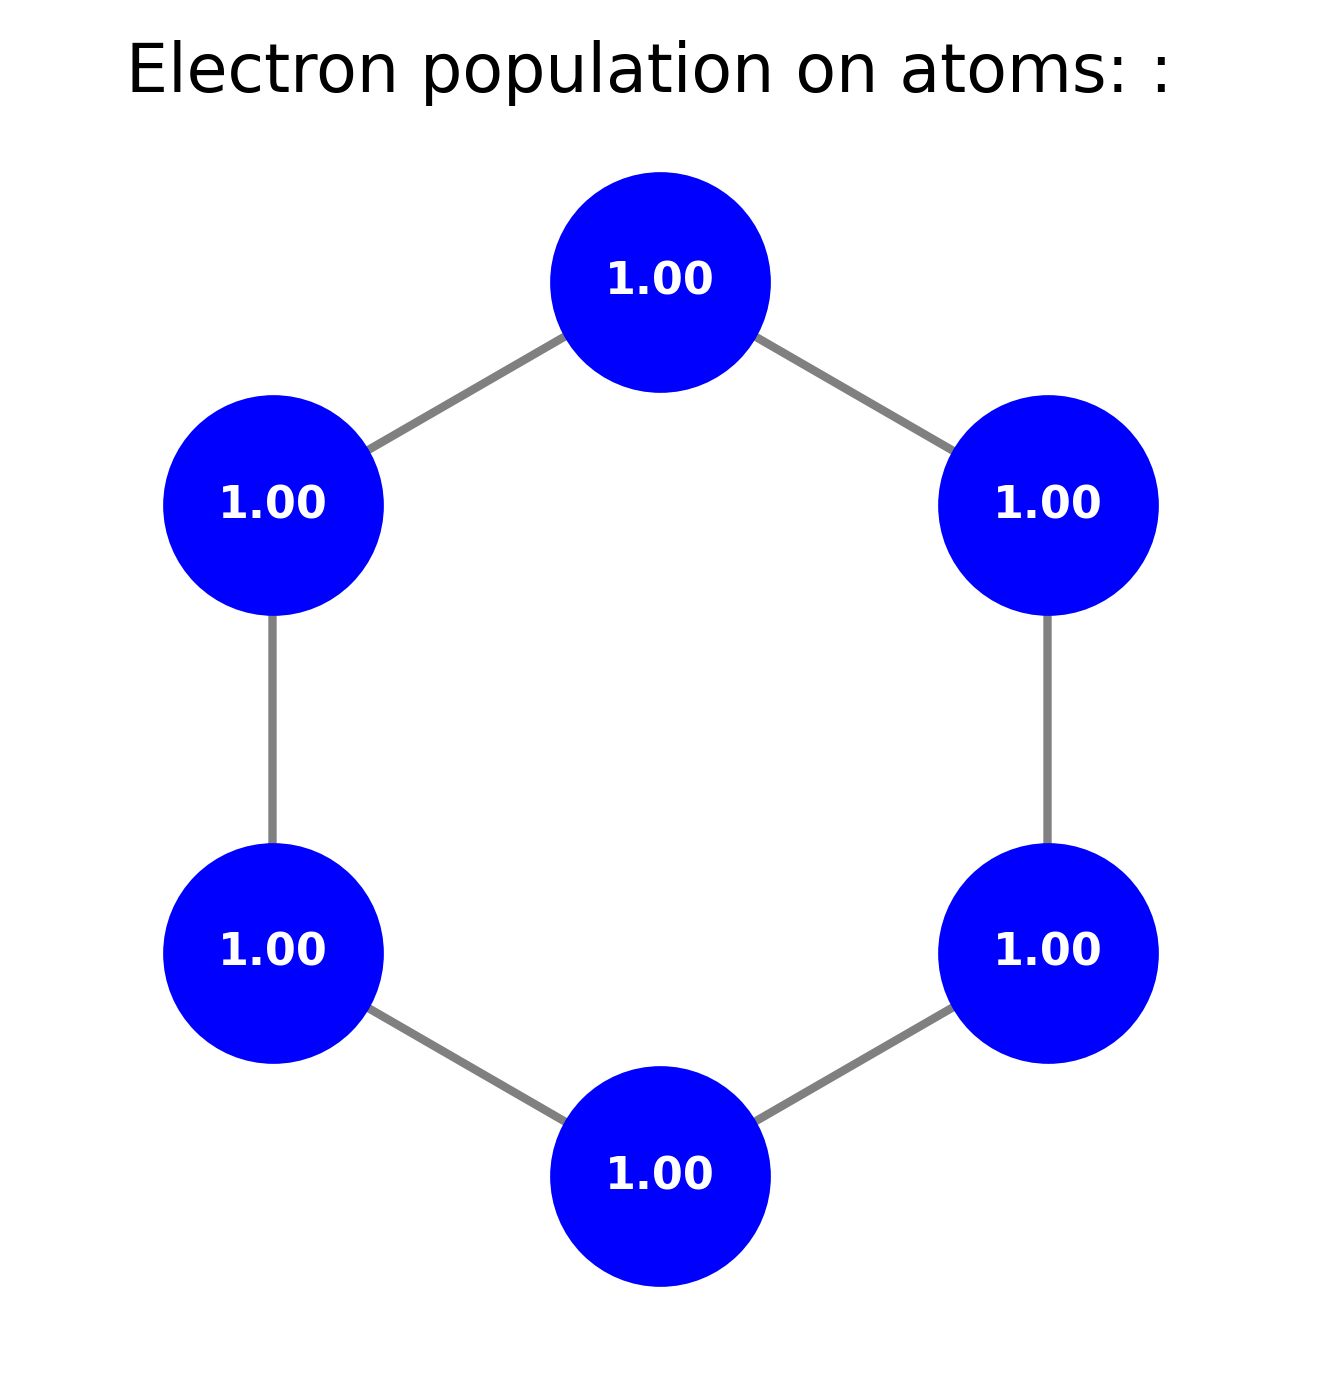

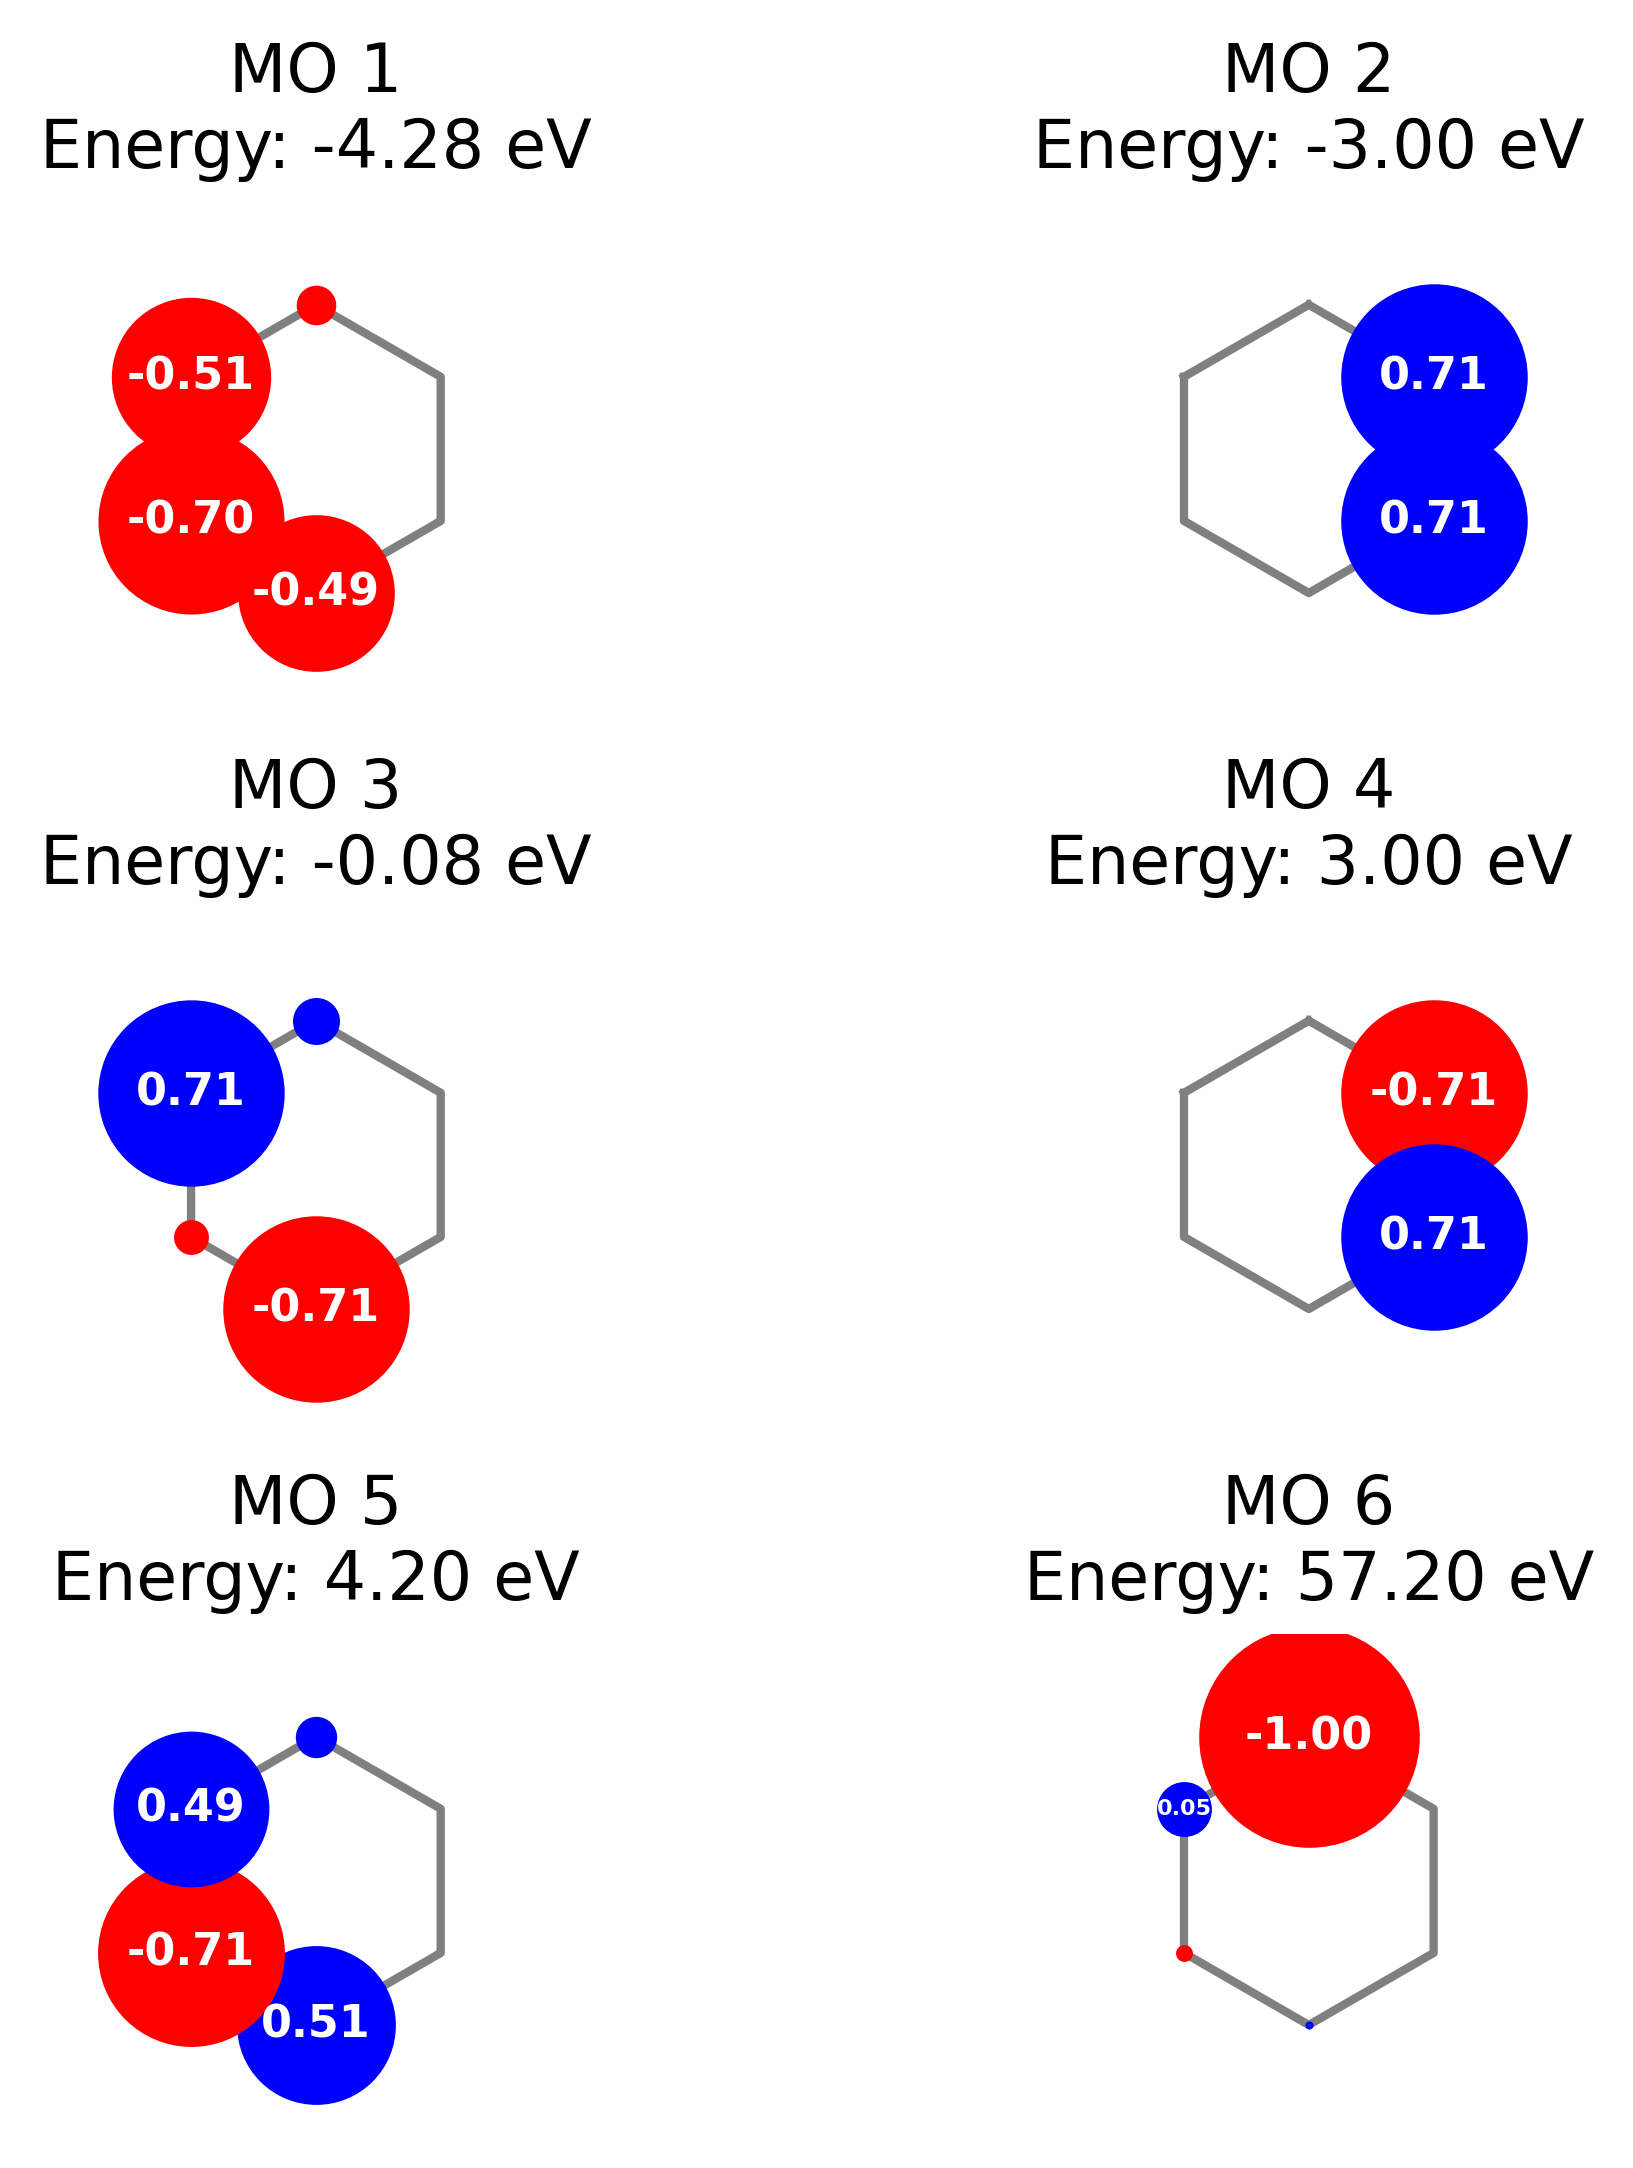

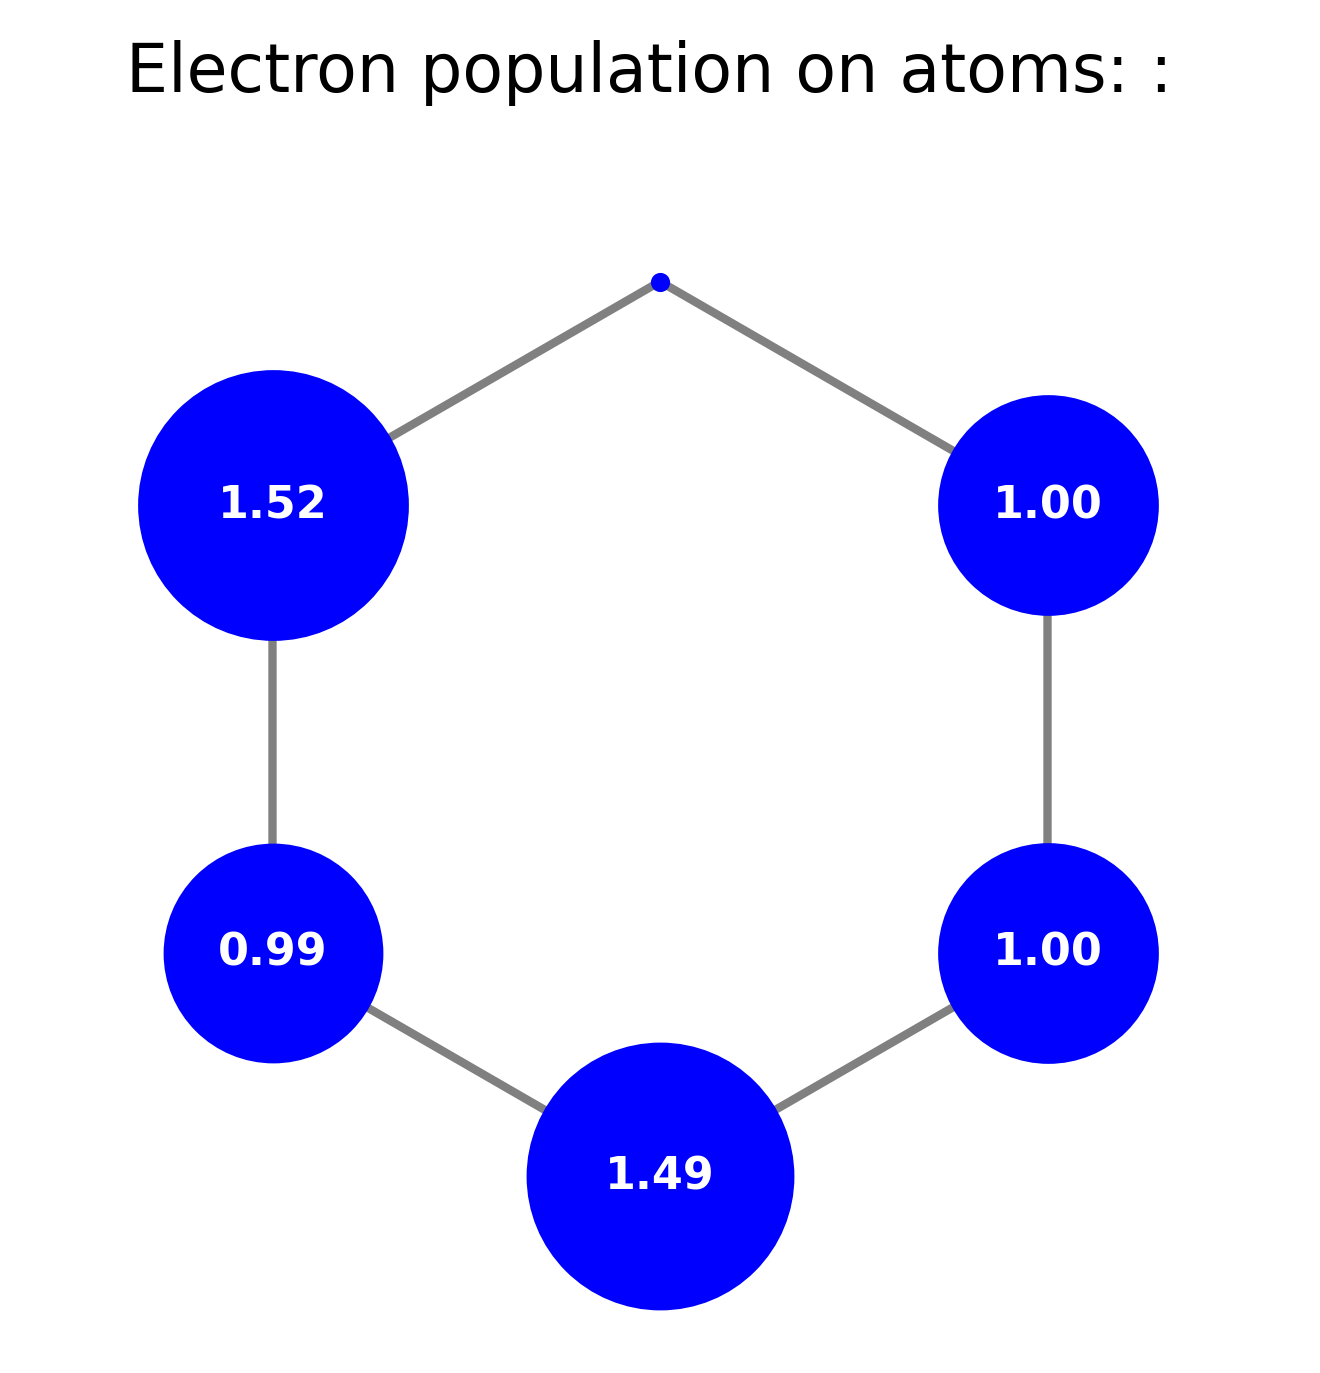

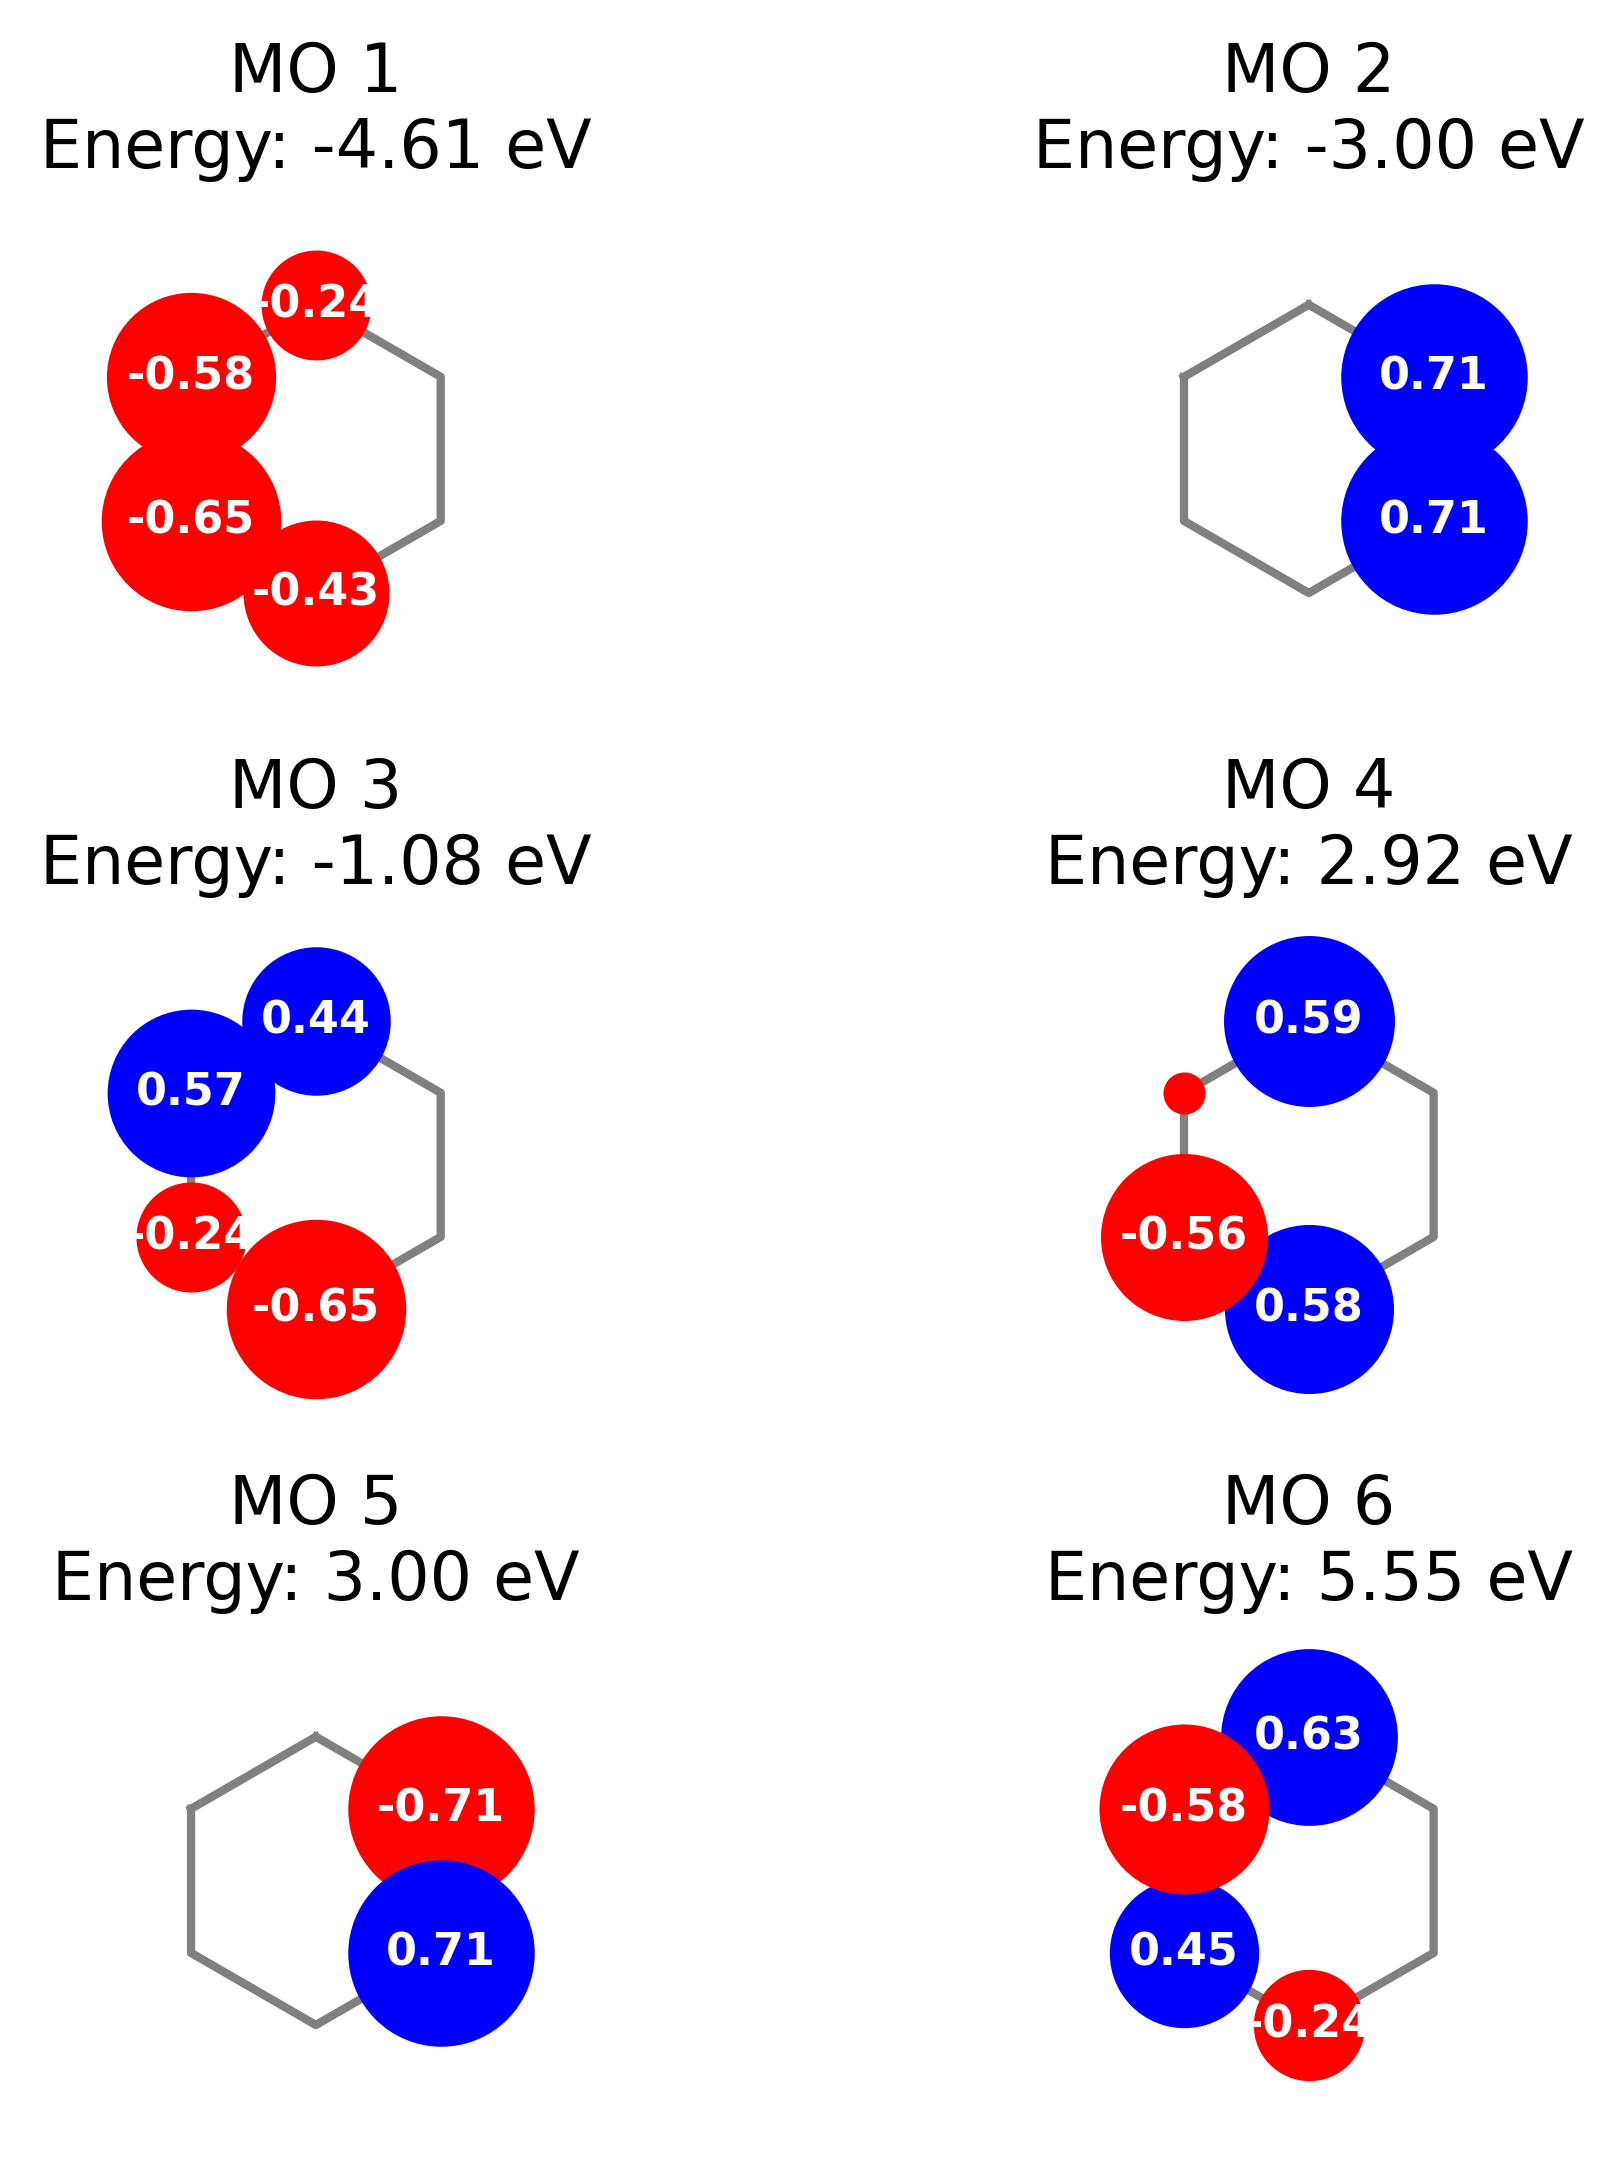

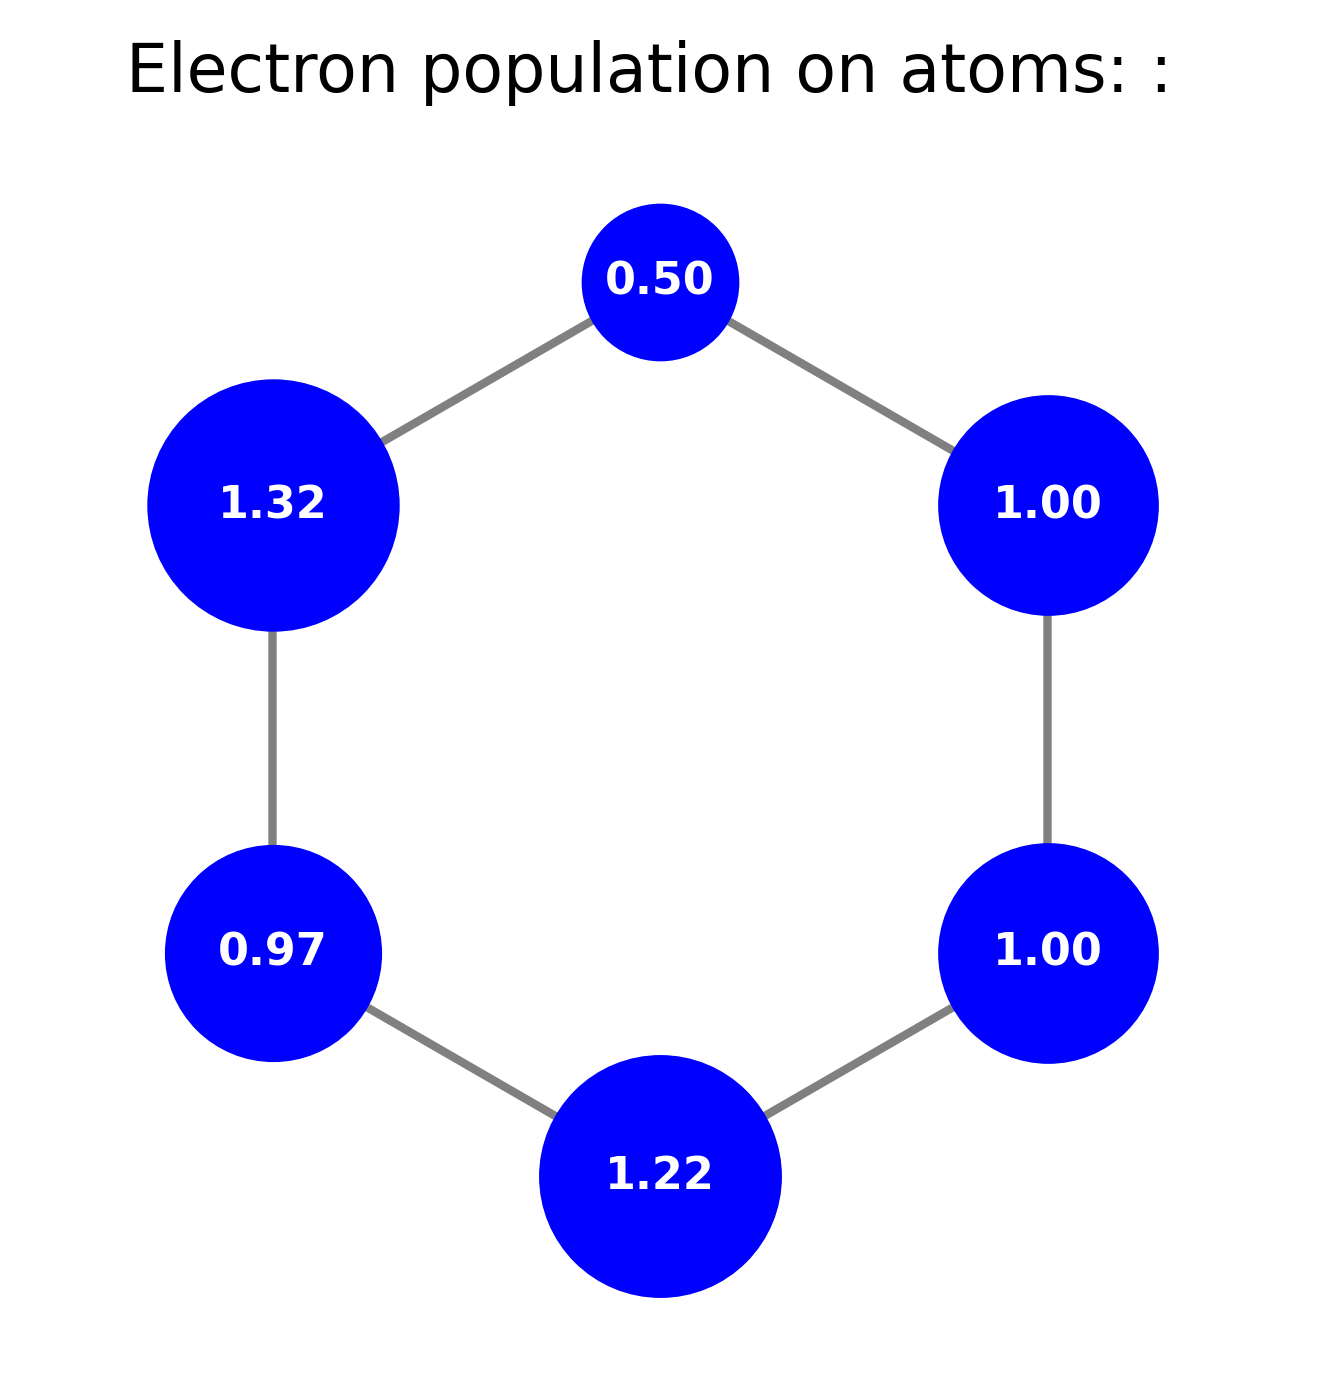

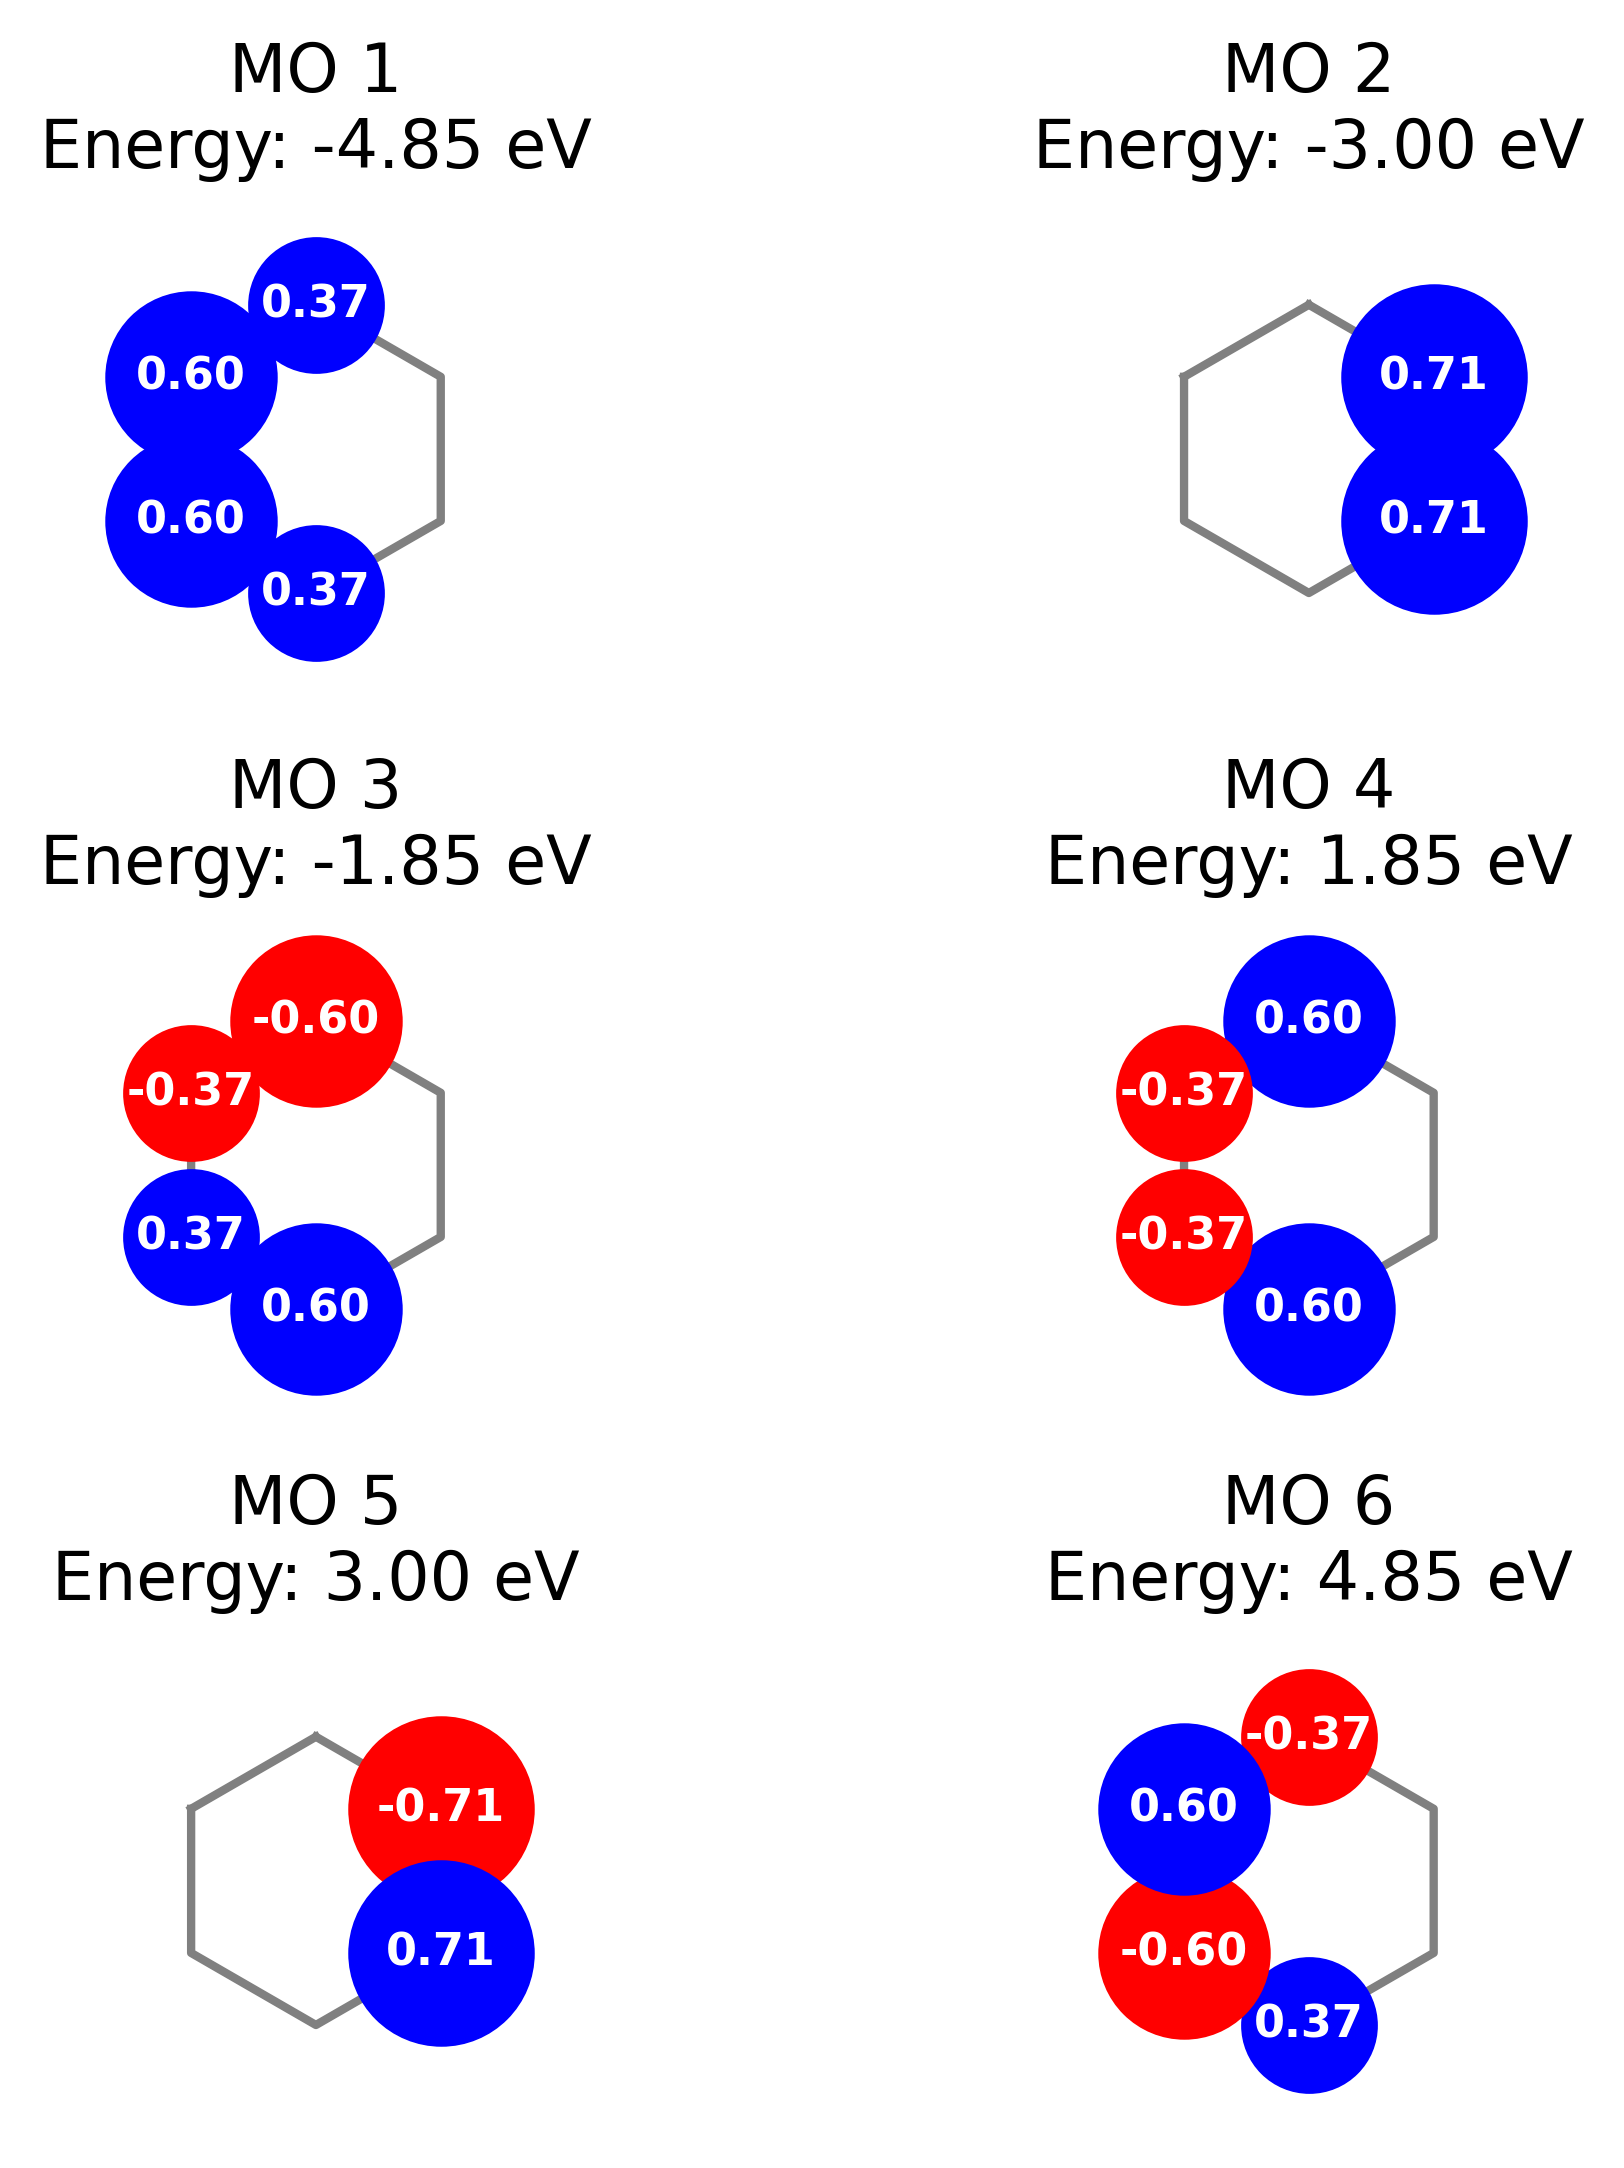

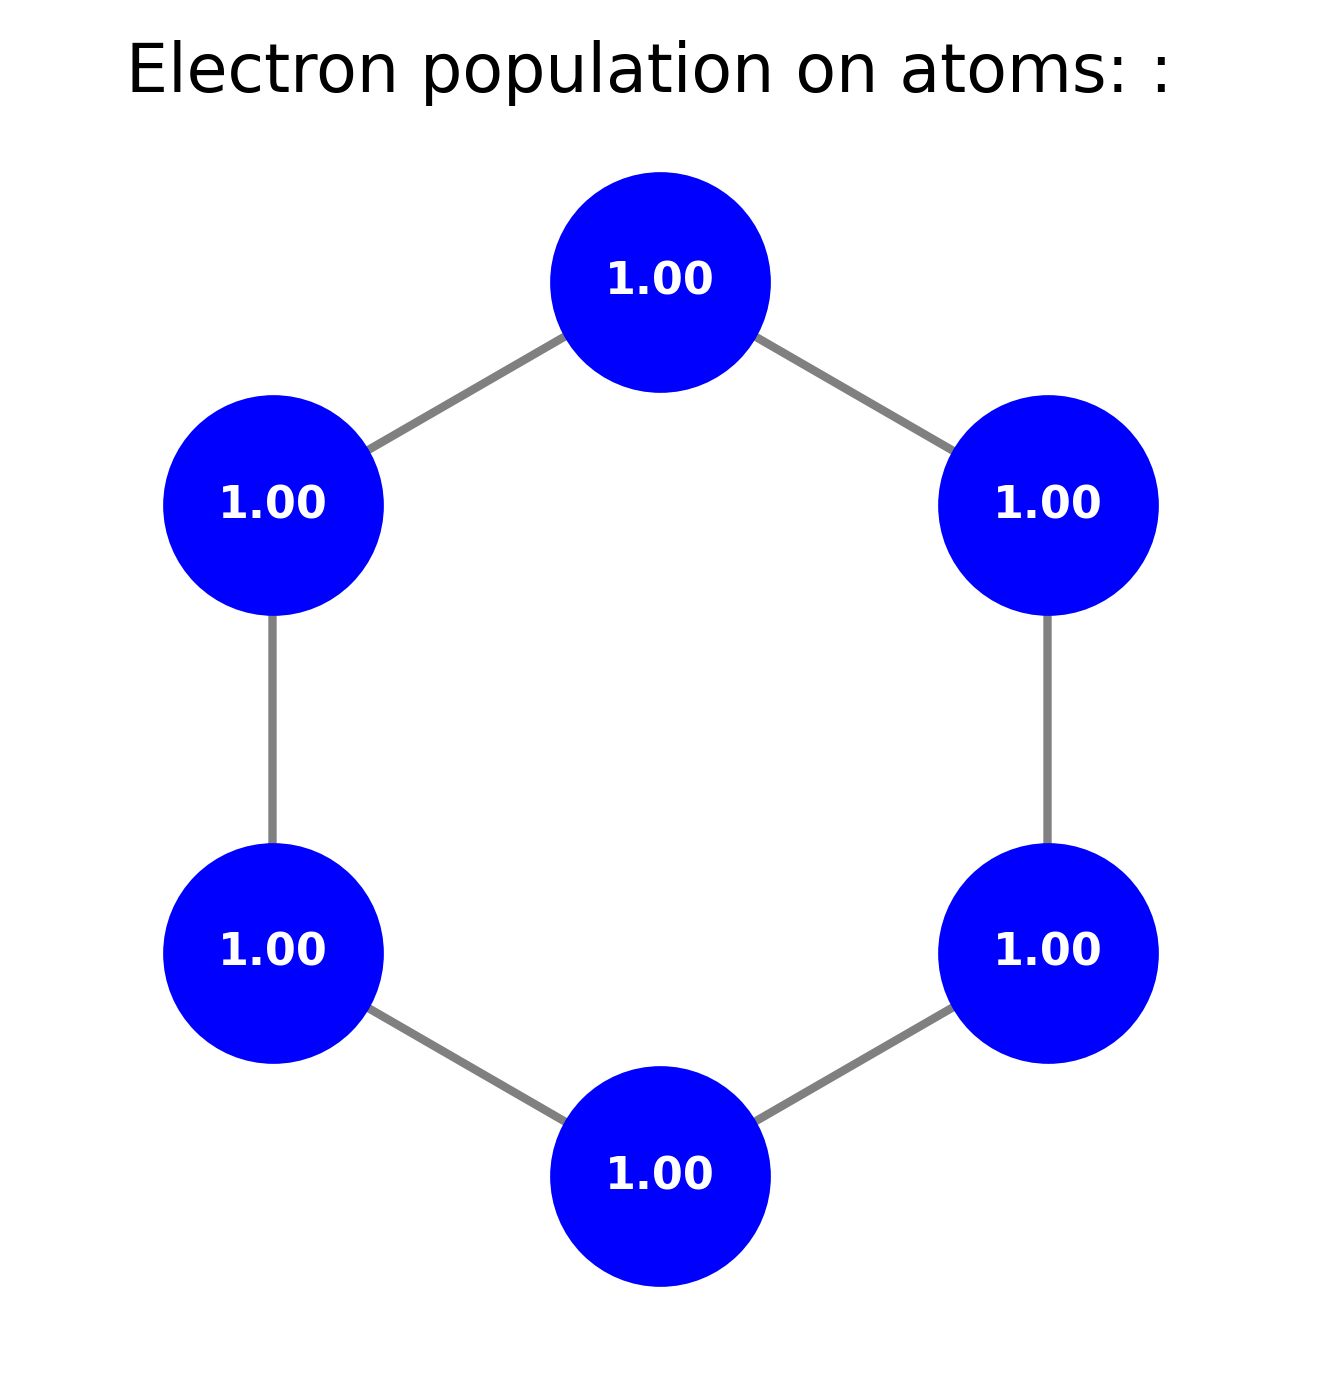

In [13]:
electronpopulation_1 = [0.004, 0.5, 1]
print(electronpopulation_1)
mu_betas = np.linspace(0, 3, 3).round(2)
print(mu_betas)
electron_population_betas = []
S_1_atom_betas = []
S_2_atoms_betas = []
energies_betas = []
potentials_betas = []
for mu_beta in mu_betas:
    electron_population = [[],[],[],[],[],[]]
    S_1_atom = []
    S_2_atoms = []
    energies = []
    potentials = [vind_optimale_mu(mu_beta,gewenste_populatie, mu_lower, mu_upper) for gewenste_populatie in electronpopulation_1]
    potentials_betas.append(potentials)
    for potential in potentials:
        benzene.huckel_matrix = H + potential* one_electron_operator_1 + mu_beta*beta_operator_1_2_and_3_4
        benzene.solve_huckel_matrix()
        eigenvalues = benzene.eigenvalues
        eigenvectors = benzene.eigenvectors
        pts.plot_MOs(eigenvalues, eigenvectors, coordinates, extra_bounds, fig_size=(6,6))
        D_huckel = pts.making_D(eigenvectors, 6)
        pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, "", "")
        for index, density in enumerate(np.diag(D_huckel)):
            electron_population[index].append(density)

        elec_to_place = 6
        i = 0
        energy = 0
        while elec_to_place >0:
            if elec_to_place > 1:
                elec_in_orbital = 2
            elif elec_to_place == 1:
                elec_in_orbital = 1
            else:
                elec_in_orbital = 0

            energy += elec_in_orbital*(eigenvalues[i]-potential*(eigenvectors.T[i] @ one_electron_operator_1 @ eigenvectors.T[i].T) - mu_beta*(eigenvectors.T[i] @ beta_operator_1_2_and_3_4 @ eigenvectors.T[i].T))
            elec_to_place -= elec_in_orbital
            i+=1
            
        energies.append(energy)

        occ_orbitals = eigenvectors.T[:3].round(6)
        S_ohm_1_atom= []
        S_ohm_2_atoms = []
        for i in range(6):
            atom_i = np.zeros((6,6))
            atom_i[i][i] = 1
            eigvals_i = np.linalg.eigvalsh(occ_orbitals @ atom_i @ occ_orbitals.T).round(6)
            S_ohm_i = 0
            for eigenvalue in eigvals_i:
                if (eigenvalue != 0): 
                    S_ohm_i -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
            S_ohm_1_atom.append(2*S_ohm_i)
            for j in range(i+1,6):
                atom_j = np.zeros((6,6))
                atom_j[j][j] = 1    
                atom_i_j = atom_i + atom_j
                eigvals_i_j = np.linalg.eigvalsh(occ_orbitals @ atom_i_j @ occ_orbitals.T).round(6)
                S_ohm_i_j = 0
                for eigenvalue in eigvals_i_j:
                    if (eigenvalue.round(2) != 0 and eigenvalue.round(2) != 1): 
                        S_ohm_i_j -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
                S_ohm_2_atoms.append(2*S_ohm_i_j)
        S_1_atom.append(S_ohm_1_atom)
        S_2_atoms.append(S_ohm_2_atoms)
    electron_population_betas.append(electron_population)
    S_1_atom_betas.append(S_1_atom)
    S_2_atoms_betas.append(S_2_atoms)
    energies_betas.append(energies)


0.030646
0.028852
0.029146
0.028852
0.030646
1.533574
0.246495
0.10134
0.273559
0.767461
2e-05
0.10134
0.767461
0.246495
1.533574
0.778124
0.006389
0.176844
0.006389
0.778124
1.052667
0.047721
0.204047
0.079892
0.938649
0.000226
0.204047
0.938649
0.047721
1.052667
0.970342
0.0
0.226532
0.0
0.970342
0.970342
0.0
0.226533
0.0
0.970342
0.0
0.226533
0.970342
0.0
0.970342
0.029117
0.028854
0.029316
0.028845
0.032296
2.223288
0.106123
0.039202
0.118412
0.252571
2.1e-05
0.042236
1.134616
0.530098
1.372138
0.279338
0.00371
0.262649
0.014912
1.233233
1.929478
0.023585
0.097885
0.039007
0.328548
0.000266
0.100372
1.480155
0.098758
0.68552
0.343271
0.0
0.343271
0.0
1.546303
1.873828
0.0
0.113126
-0.0
0.343271
0.0
0.113125
1.546298
0.0
0.583604
0.028854
0.028854
0.029406
0.028835
0.033475
2.772589
0.0
0.0
0.0
0.0
0.0
0.0
1.428184
0.856963
1.349419
0.0
0.0
0.314019
0.021903
1.552295
2.772589
0.0
0.0
0.0
0.0
0.0
0.0
1.867164
0.135748
0.520288
0.0
0.0
0.414532
0.0
1.946036
2.772589
0.0
0.0
0.0
0.0
0.

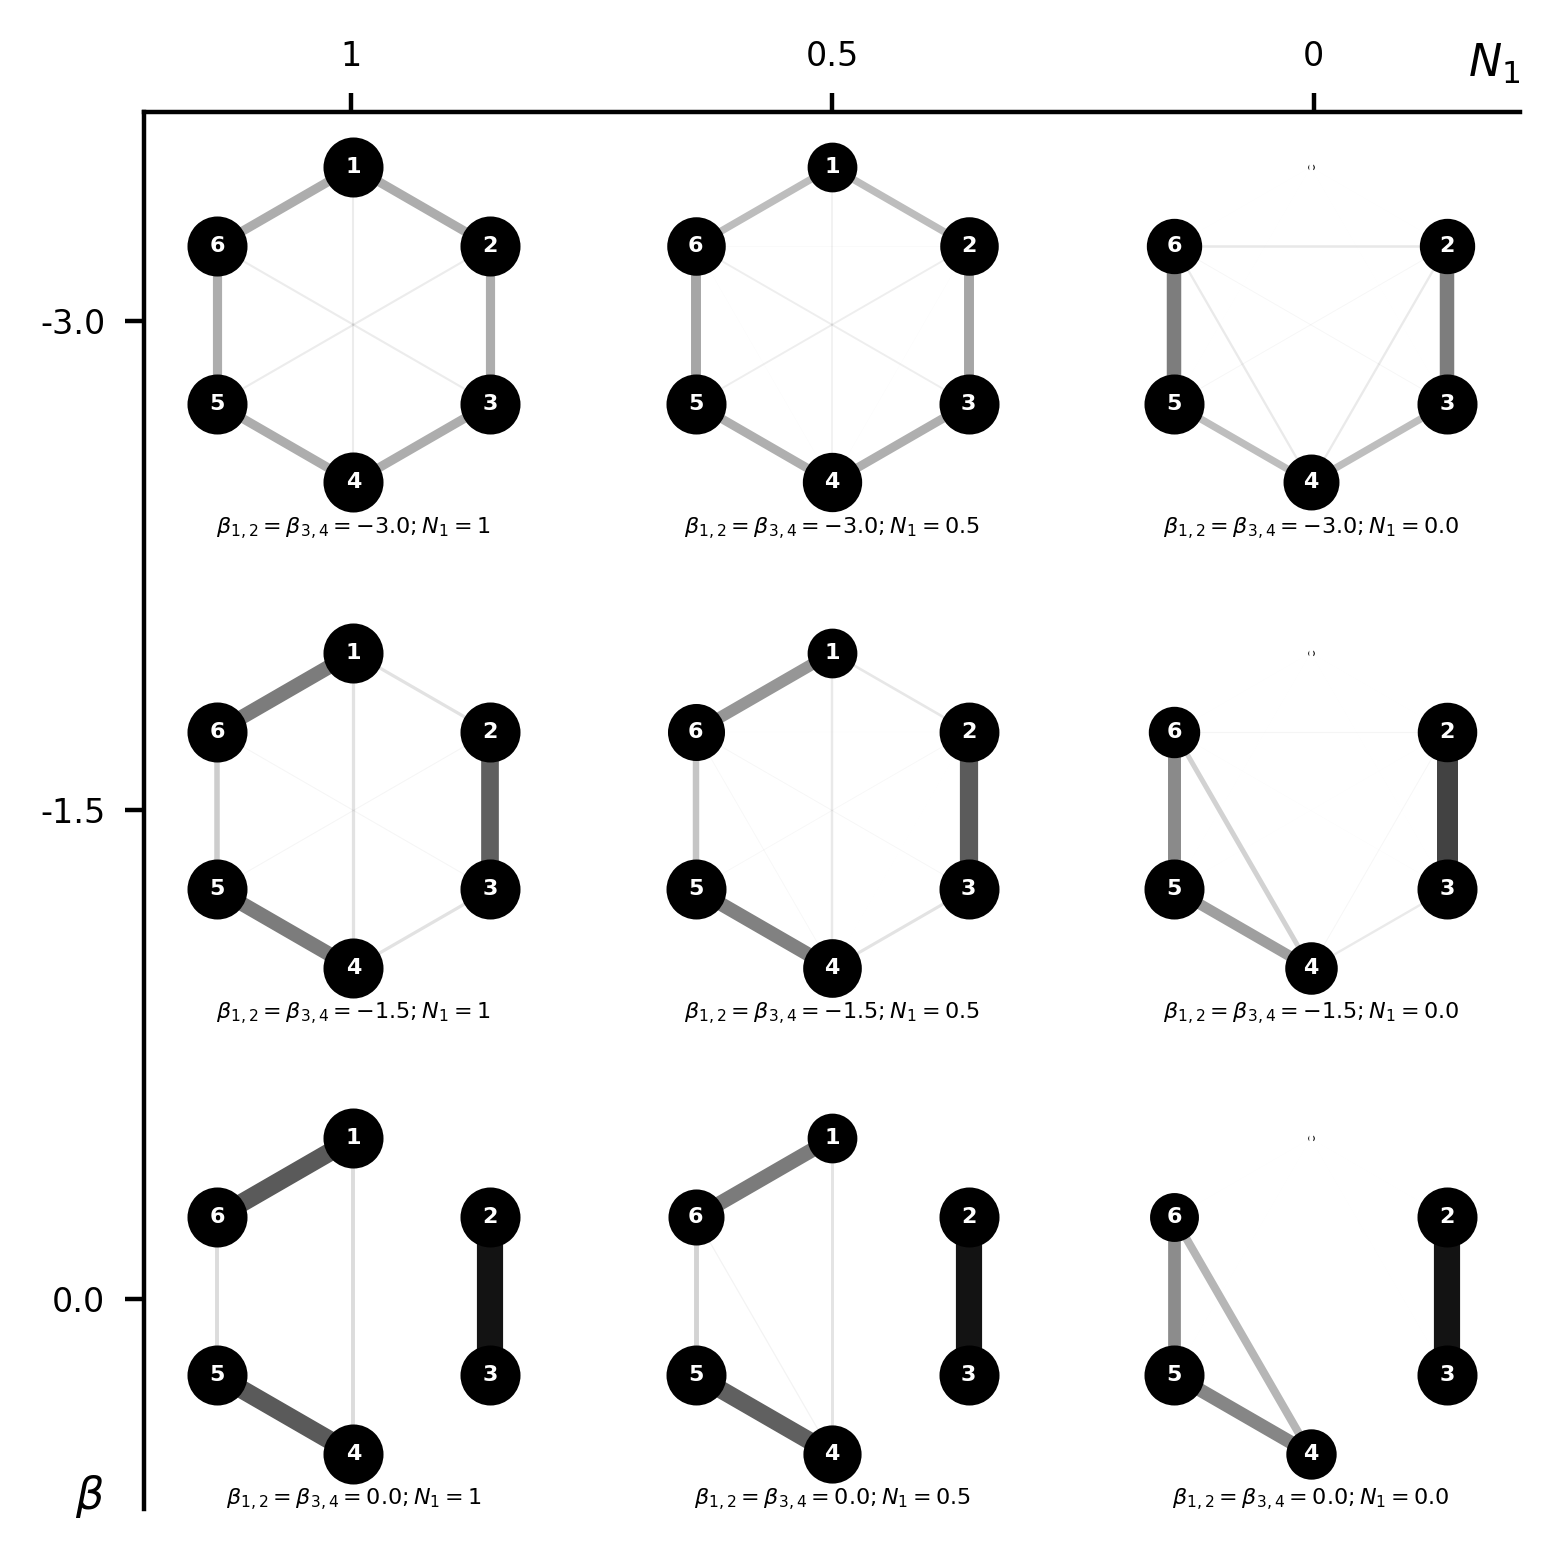

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4, 4), dpi=400)
plt.title('')
# Verplaats de x-as naar boven en de y-as naar links
plt.gca().xaxis.set_ticks_position('top')
plt.gca().yaxis.set_ticks_position('left')

# Verwijder de overbodige assen
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.xticks([0.15, 0.50, 0.85], ['1', '0.5', '0'], fontsize=6)
plt.yticks([0.15, 0.50, 0.85],['0.0', '-1.5', '-3.0'], fontsize=6)
plt.text(1, 1.05, r'$N_1$', fontsize=8, ha='right', va='top')
plt.text(-0.05, 0, r'$\beta$', fontsize=8)


x = coordinates[:, 0]
y = coordinates[:, 1]
# Variabelen definiëren (mu_betas, electronpopulation_1, electron_population_betas)
for i in range(3):
    for j in range(3):
        pos = i*3 + 2 - j
        ax = fig.add_subplot(3, 3, pos+1)
        # Maak een nieuwe subplot
        S_1_lijst = S_1_atom_betas[i][j]
        S_2_lijst = S_2_atoms_betas[i][j]
        k=0
        for atom1 in range(6):
            for atom2 in range(atom1+1,6):
                I = (S_1_lijst[atom1] + S_1_lijst[atom2] - S_2_lijst[k]).round(6)
                print(I)
                ax.plot([x[atom1],x[atom2]], [y[atom1],y[atom2]], linewidth = I*1.7,alpha = I/3, color = 'black')
                k +=1 
            ax.scatter(x[atom1], y[atom1], s = 50*S_1_lijst[atom1]**2, color = 'black')
            ax.text(x[atom1], y[atom1], f'{atom1+1}', ha='center', va='center', fontsize= 4, color='white', fontweight='bold')


        # Verplaats de spines (assenlijnen) naar de oorsprong
        beta = mu_betas[i] -3
        N_1 = round(electronpopulation_1[j], 2)
        r = (str(beta), str(N_1))
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.axis('off')
        ax.margins(0.3)
        ax.set_title(r'$\beta_{1,2} = \beta_{3,4} = {%s}; N_1 = %s}$' %r, x=0.5, y=-0.07, ha='center', fontsize=4)
        ax.axis('equal')


plt.tight_layout()

# Toon de plot
plt.show()


In [15]:
electronpopulation_1 = [0.004, 1]
print(electronpopulation_1)
mu_betas = [3]
print(mu_betas)
electron_population_betas = []
S_1_atom_betas = []
S_2_atoms_betas = []
energies_betas = []
potentials_betas = []
for mu_beta in mu_betas:
    electron_population = [[],[],[],[],[],[]]
    S_1_atom = []
    S_2_atoms = []
    energies = []
    potentials = [vind_optimale_mu(mu_beta,gewenste_populatie, mu_lower, mu_upper) for gewenste_populatie in electronpopulation_1]
    potentials_betas.append(potentials)
    for potential in potentials:
        benzene.huckel_matrix = H + potential* one_electron_operator_1 + mu_beta*beta_operator_1_2_and_3_4
        benzene.solve_huckel_matrix()
        eigenvalues = benzene.eigenvalues
        eigenvectors = benzene.eigenvectors
        D_huckel = pts.making_D(eigenvectors, 6)
        for index, density in enumerate(np.diag(D_huckel)):
            electron_population[index].append(density)

        elec_to_place = 6
        i = 0
        energy = 0
        while elec_to_place >0:
            if elec_to_place > 1:
                elec_in_orbital = 2
            elif elec_to_place == 1:
                elec_in_orbital = 1
            else:
                elec_in_orbital = 0

            energy += elec_in_orbital*(eigenvalues[i]-potential*(eigenvectors.T[i] @ one_electron_operator_1 @ eigenvectors.T[i].T) - mu_beta*(eigenvectors.T[i] @ beta_operator_1_2_and_3_4 @ eigenvectors.T[i].T))
            elec_to_place -= elec_in_orbital
            i+=1
            
        energies.append(energy)

        occ_orbitals = eigenvectors.T[:3].round(6)
        S_ohm_1_atom= []
        S_ohm_2_atoms = []
        for i in range(6):
            atom_i = np.zeros((6,6))
            atom_i[i][i] = 1
            eigvals_i = np.linalg.eigvalsh(occ_orbitals @ atom_i @ occ_orbitals.T).round(6)
            S_ohm_i = 0
            for eigenvalue in eigvals_i:
                if (eigenvalue != 0): 
                    S_ohm_i -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
            S_ohm_1_atom.append(2*S_ohm_i)
            for j in range(i+1,6):
                atom_j = np.zeros((6,6))
                atom_j[j][j] = 1    
                atom_i_j = atom_i + atom_j
                eigvals_i_j = np.linalg.eigvalsh(occ_orbitals @ atom_i_j @ occ_orbitals.T).round(6)
                S_ohm_i_j = 0
                for eigenvalue in eigvals_i_j:
                    if (eigenvalue.round(2) != 0 and eigenvalue.round(2) != 1): 
                        S_ohm_i_j -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
                S_ohm_2_atoms.append(2*S_ohm_i_j)
        S_1_atom.append(S_ohm_1_atom)
        S_2_atoms.append(S_ohm_2_atoms)
    electron_population_betas.append(electron_population)
    S_1_atom_betas.append(S_1_atom)
    S_2_atoms_betas.append(S_2_atoms)
    energies_betas.append(energies)


[0.004, 1]
[3]


0.028854
0.028854
0.029406
0.028835
0.033475
2.772589
0.0
0.0
0.0
0.0
0.0
0.0
1.428184
0.856963
1.349419
0.0
0.0
0.414532
0.0
1.946036
2.772589
0.0
0.0
0.0
0.0
0.0
0.0
1.946036
0.0
0.414532


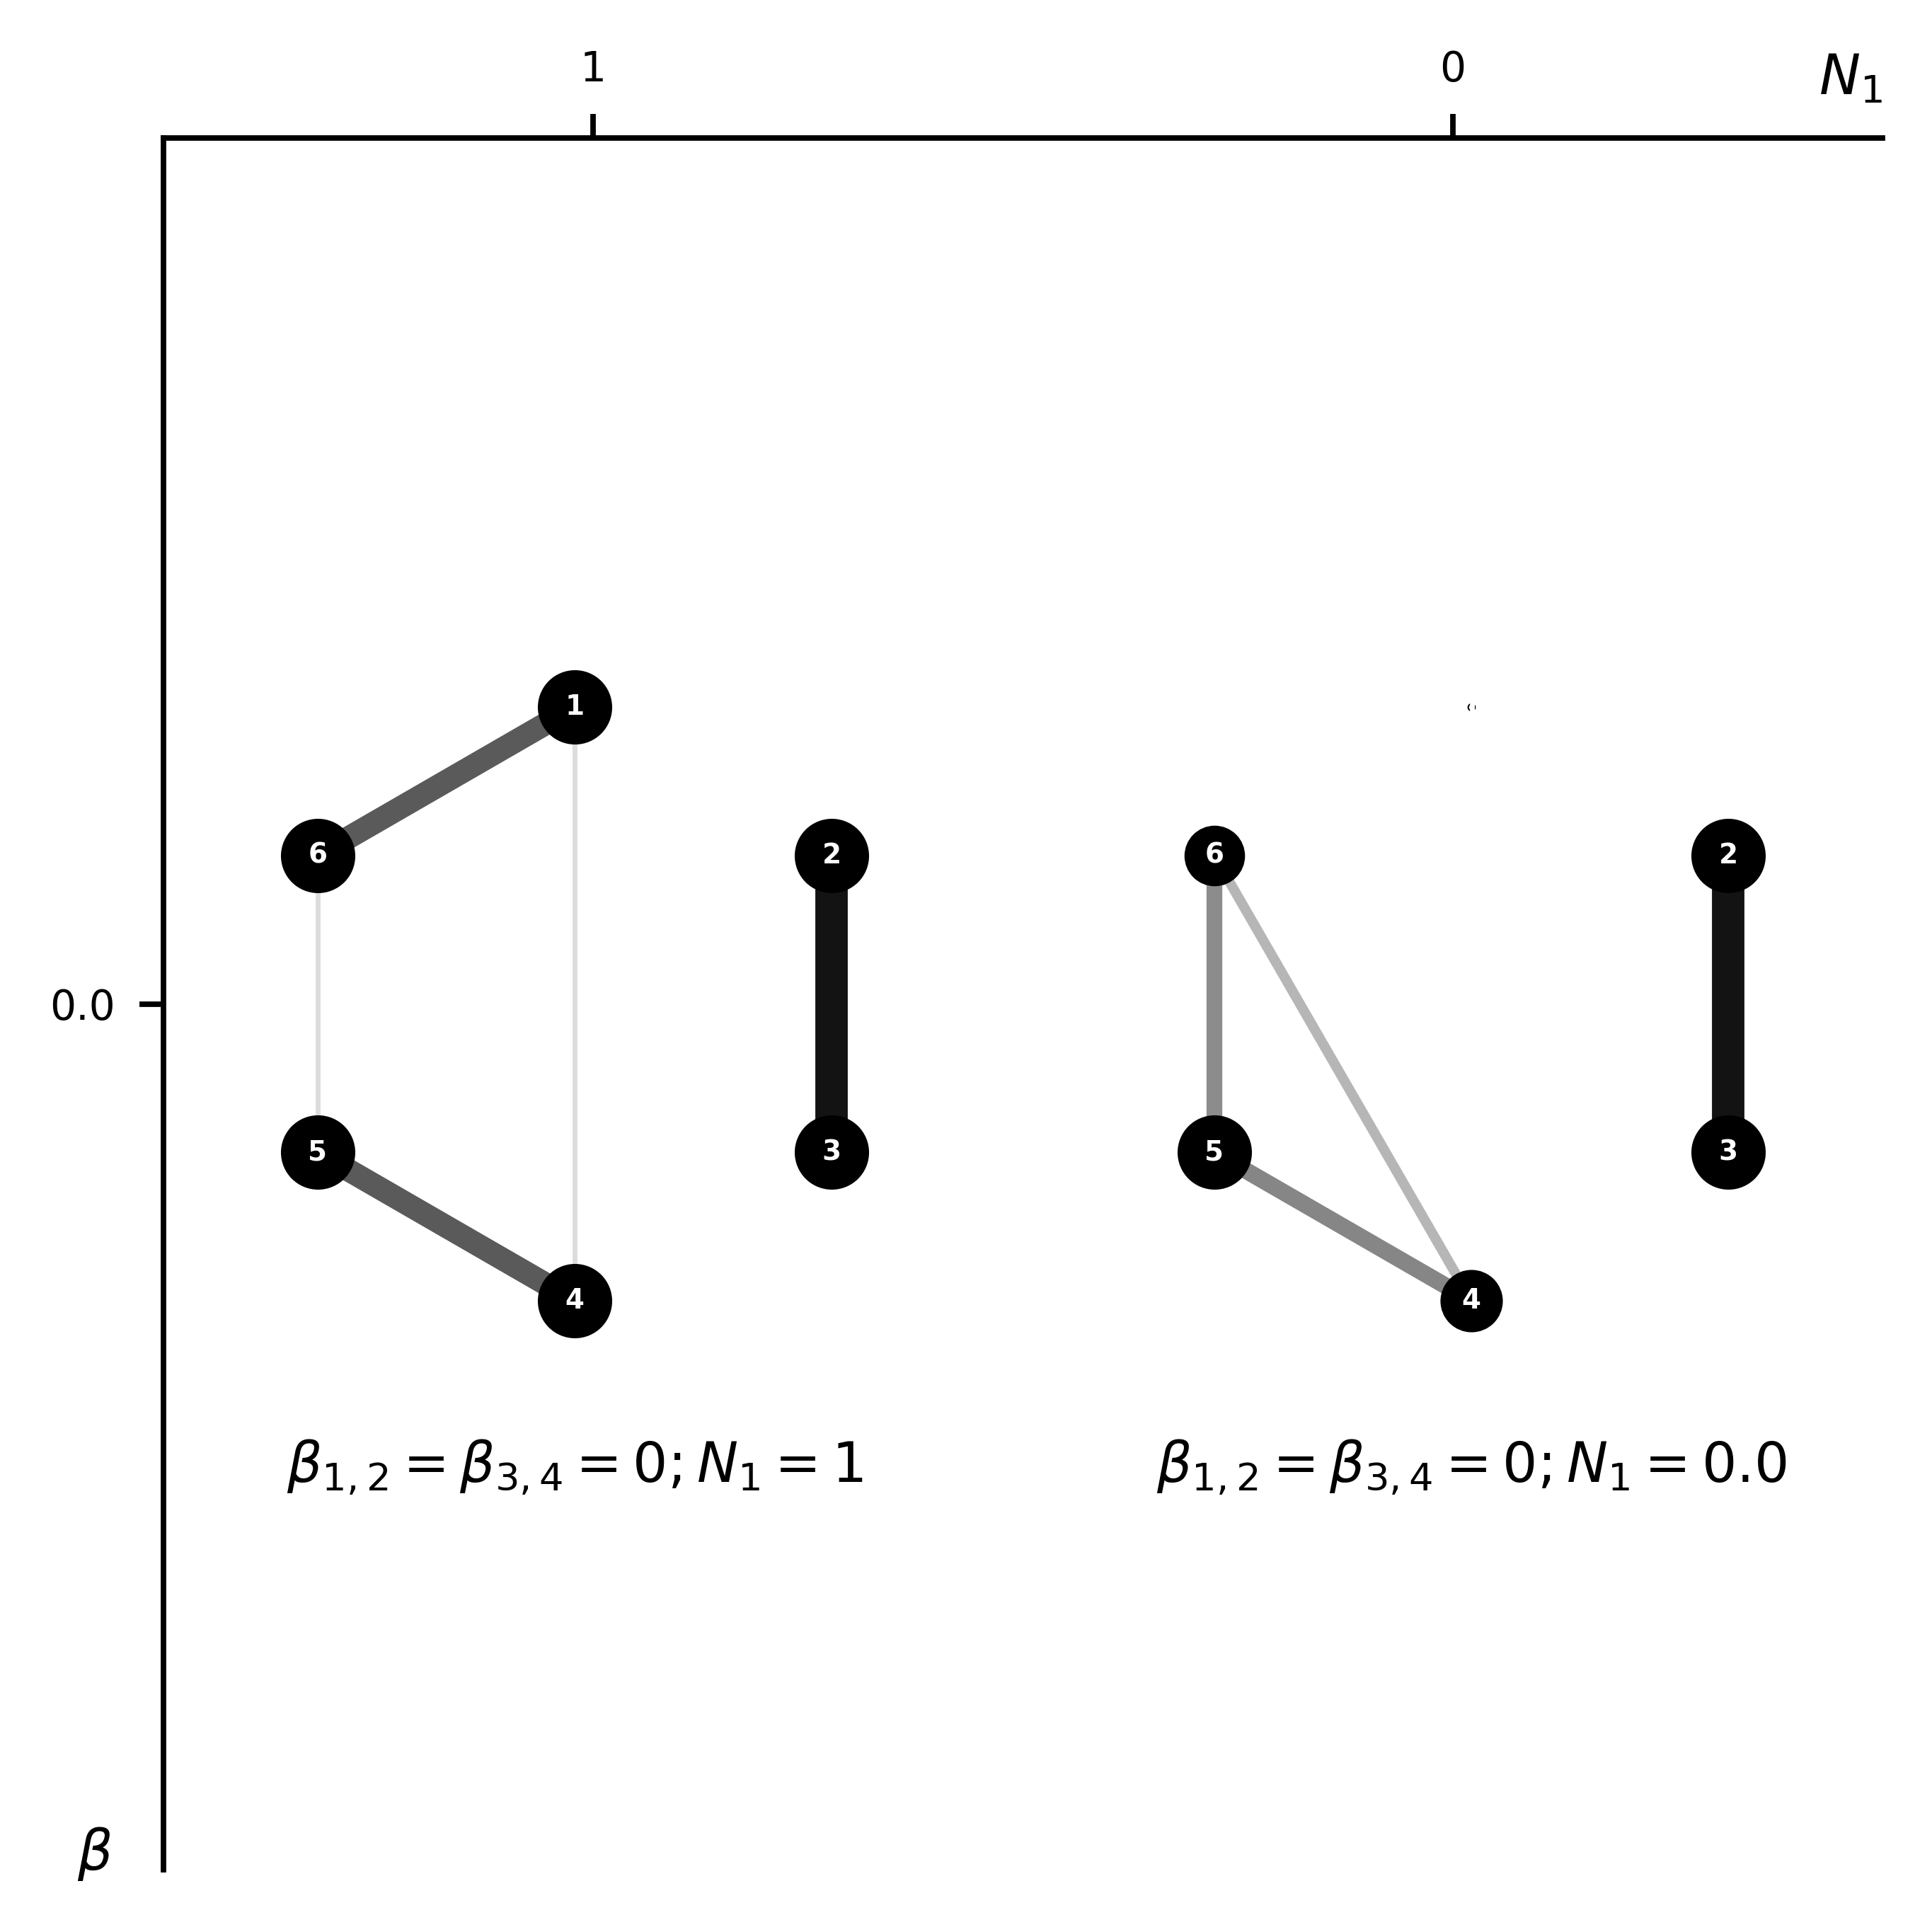

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4, 4), dpi=700)
plt.title('')
# Verplaats de x-as naar boven en de y-as naar links
plt.gca().xaxis.set_ticks_position('top')
plt.gca().yaxis.set_ticks_position('left')

# Verwijder de overbodige assen
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.xticks([0.25, 0.75], ['1', '0'], fontsize=6)
plt.yticks([0.5],['0.0'], fontsize=6)
plt.text(1, 1.05, r'$N_1$', fontsize=8, ha='right', va='top')
plt.text(-0.05, 0, r'$\beta$', fontsize=8)


x = coordinates[:, 0]
y = coordinates[:, 1]
# Variabelen definiëren (mu_betas, electronpopulation_1, electron_population_betas)
for j in range(2):
    for i in range(1):
        ax = fig.add_subplot(1, 2, 2-j)
        # Maak een nieuwe subplot
        S_1_lijst = S_1_atom_betas[i][j]
        S_2_lijst = S_2_atoms_betas[i][j]
        k=0
        for atom1 in range(6):
            for atom2 in range(atom1+1,6):
                I = (S_1_lijst[atom1] + S_1_lijst[atom2] - S_2_lijst[k]).round(6)
                print(I)
                ax.plot([x[atom1],x[atom2]], [y[atom1],y[atom2]], linewidth = I*1.7,alpha = I/3, color = 'black')
                k +=1 
            ax.scatter(x[atom1], y[atom1], s = 50*S_1_lijst[atom1]**2, color = 'black')
            ax.text(x[atom1], y[atom1], f'{atom1+1}', ha='center', va='center', fontsize= 4, color='white', fontweight='bold')


        # Verplaats de spines (assenlijnen) naar de oorsprong
        beta = mu_betas[i] -3
        N_1 = round(electronpopulation_1[j], 2)
        r = (str(beta), str(N_1))
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.axis('off')
        ax.margins(0.3)
        ax.set_title(r'$\beta_{1,2} = \beta_{3,4} = {%s}; N_1 = %s}$' %r, x=0.5, y=0.2, ha='center', fontsize=8)
        ax.axis('equal')


plt.tight_layout()

# Toon de plot
plt.show()
